# **JaguarGroup_DTI_01_FinalProject🐈‍⬛**

## **1.1. Business Understanding**
Olist is an e-commerce platform that connects various sellers with
buyers across Brazil. In a fiercely competitive market, understanding customers deeply
is key to increasing their retention and loyalty. With the increasing
competition, Olist needs to develop a more targeted marketing strategy, based on customer behavior and characteristics.
based on customer behavior and characteristics. Customer segmentation
using a clustering model can help Olist in identifying customer groups with different characteristics, enabling the implementation of marketing strategies.
customers with different characteristics, enabling the implementation of marketing strategies tailored to the needs and preferences of each segment.
tailored to the needs and preferences of each segment.

## **1.2. Problem Statement**
Today, Olist faces significant challenges in understanding and improving the diversity of their customer behavior. Data from 2016 to 2018 shows that 97% of Olist's customers made only one purchase and did not return, while only 3% were repeat buyers. This low retention rate has a significant impact on Olist's revenue and growth potential. Without proper segmentation, marketing efforts become less effective because not all customers respond in the same way to the strategies implemented. Therefore, Olist needs to develop a more personalized and relevant marketing strategy, which is based on a deep understanding of their customers, to increase retention rates and maximize revenue potential.

## **1.3. Objectives of the Project**

- Analyze and Understand Olist Customer Characteristics**:
  - Through LRFM (Length, Recency, Frequency, Monetary) approach.

- **Identify Customer Segments**:
  - Based on their shopping behavior using clustering techniques.

- **Develop a Segmented Marketing Strategy**:
  - Tailored to the characteristics of each customer segment to increase retention, loyalty, and revenue.


## **1.4. Analytical Approach**
1. **Data Collection & Preparation**:
   - Collected and cleaned data from the Brazilian E-Commerce Public Dataset related to customers, transactions, and shopping behavior.
   - Calculate LRFM (Length, Recency, Frequency, Monetary) values for each customer.

2. **LRFM Analysis**:
   - Measures four key dimensions of customer behavior:
     - **Length**: The duration of the customer's relationship with Olist.
     - **Recency**: Time since last purchase.
     - **Frequency**: Number of transactions made by the customer.
     - **Monetary**: Total spending of the customer.

3. **Clustering**:
   - Using clustering techniques (such as K-Means, DBSCAN, or Hierarchical Clustering) to group customers into segments based on their LRFM values.
   - Determine the optimal number of clusters and validate the clustering results.

4. **Segment Analysis & Strategy Development**:
   - Analyze each segment to understand their unique characteristics and needs.
   - Develop different marketing strategies for each segment, such as special offers, loyalty programs, or retargeting campaigns.

With this approach, Olist can be more effective in reaching customers with relevant and personalized strategies, which is expected to increase loyalty.

## **1.5. Evaluation Metrics**
* **Silhouette Score:** Measures how similar a data point is to its own cluster compared to other clusters. Higher scores indicate better-defined clusters.

```
s(i) = (b(i) - a(i)) / max(a(i), b(i))
```

* **Calinski-Harabasz Score:** Evaluates the ratio of between-cluster dispersion to within-cluster dispersion. Higher scores suggest denser and well-separated clusters.

```
CH = [B(k) / (k - 1)] / [W(k) / (n - k)]
```

* **Davies-Bouldin Index:** Measures the average similarity ratio of each cluster with its most similar cluster. Lower scores indicate better clustering as they suggest that clusters are compact and well-separated.

```
DB = (1/k) * Σ(max[(σi + σj) / dij])
```


## **1.5. Stakeholder**
In solving this problem, we as data scientists/data analysts play an important role in building data-driven segmentation models, while the marketing team uses the segmentation to develop and implement more effective marketing strategies. Close collaboration between the two teams ensured that the analytics results were translated into concrete actions that positively impacted the business.

# **2. Data Loading**

## **2.1. Import Libraries**

In [1]:
from IPython.core.magic import register_line_magic

@register_line_magic
def silent_pip(line):
    """IPython magic for silent pip installs. Suppresses the output."""
    cmd = f'pip install {line} > /dev/null 2>&1'
    get_ipython().system(cmd)


In [2]:
%silent_pip Levenshtein unidecode


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import calendar
import copy

from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
from unidecode import unidecode
from Levenshtein import distance as levenshtein_distance

from sklearn.preprocessing import RobustScaler

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')


In [4]:
# Display all columns in Pandas DataFrames.
pd.set_option('display.max_columns', None)


## **2.2. Load Datasets**

In [5]:
# Download the "Brazilian E-commerce" dataset from Kaggle.
!kaggle datasets download -d olistbr/brazilian-ecommerce


Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0
 87% 37.0M/42.6M [00:00<00:00, 94.2MB/s]
100% 42.6M/42.6M [00:00<00:00, 87.7MB/s]


In [6]:
# Extract the contents of the "brazilian-ecommerce.zip" file.
!unzip brazilian-ecommerce.zip


Archive:  brazilian-ecommerce.zip
  inflating: olist_customers_dataset.csv  
  inflating: olist_geolocation_dataset.csv  
  inflating: olist_order_items_dataset.csv  
  inflating: olist_order_payments_dataset.csv  
  inflating: olist_order_reviews_dataset.csv  
  inflating: olist_orders_dataset.csv  
  inflating: olist_products_dataset.csv  
  inflating: olist_sellers_dataset.csv  
  inflating: product_category_name_translation.csv  


In [7]:
# Remove the "brazilian-ecommerce.zip" file.
!rm brazilian-ecommerce.zip


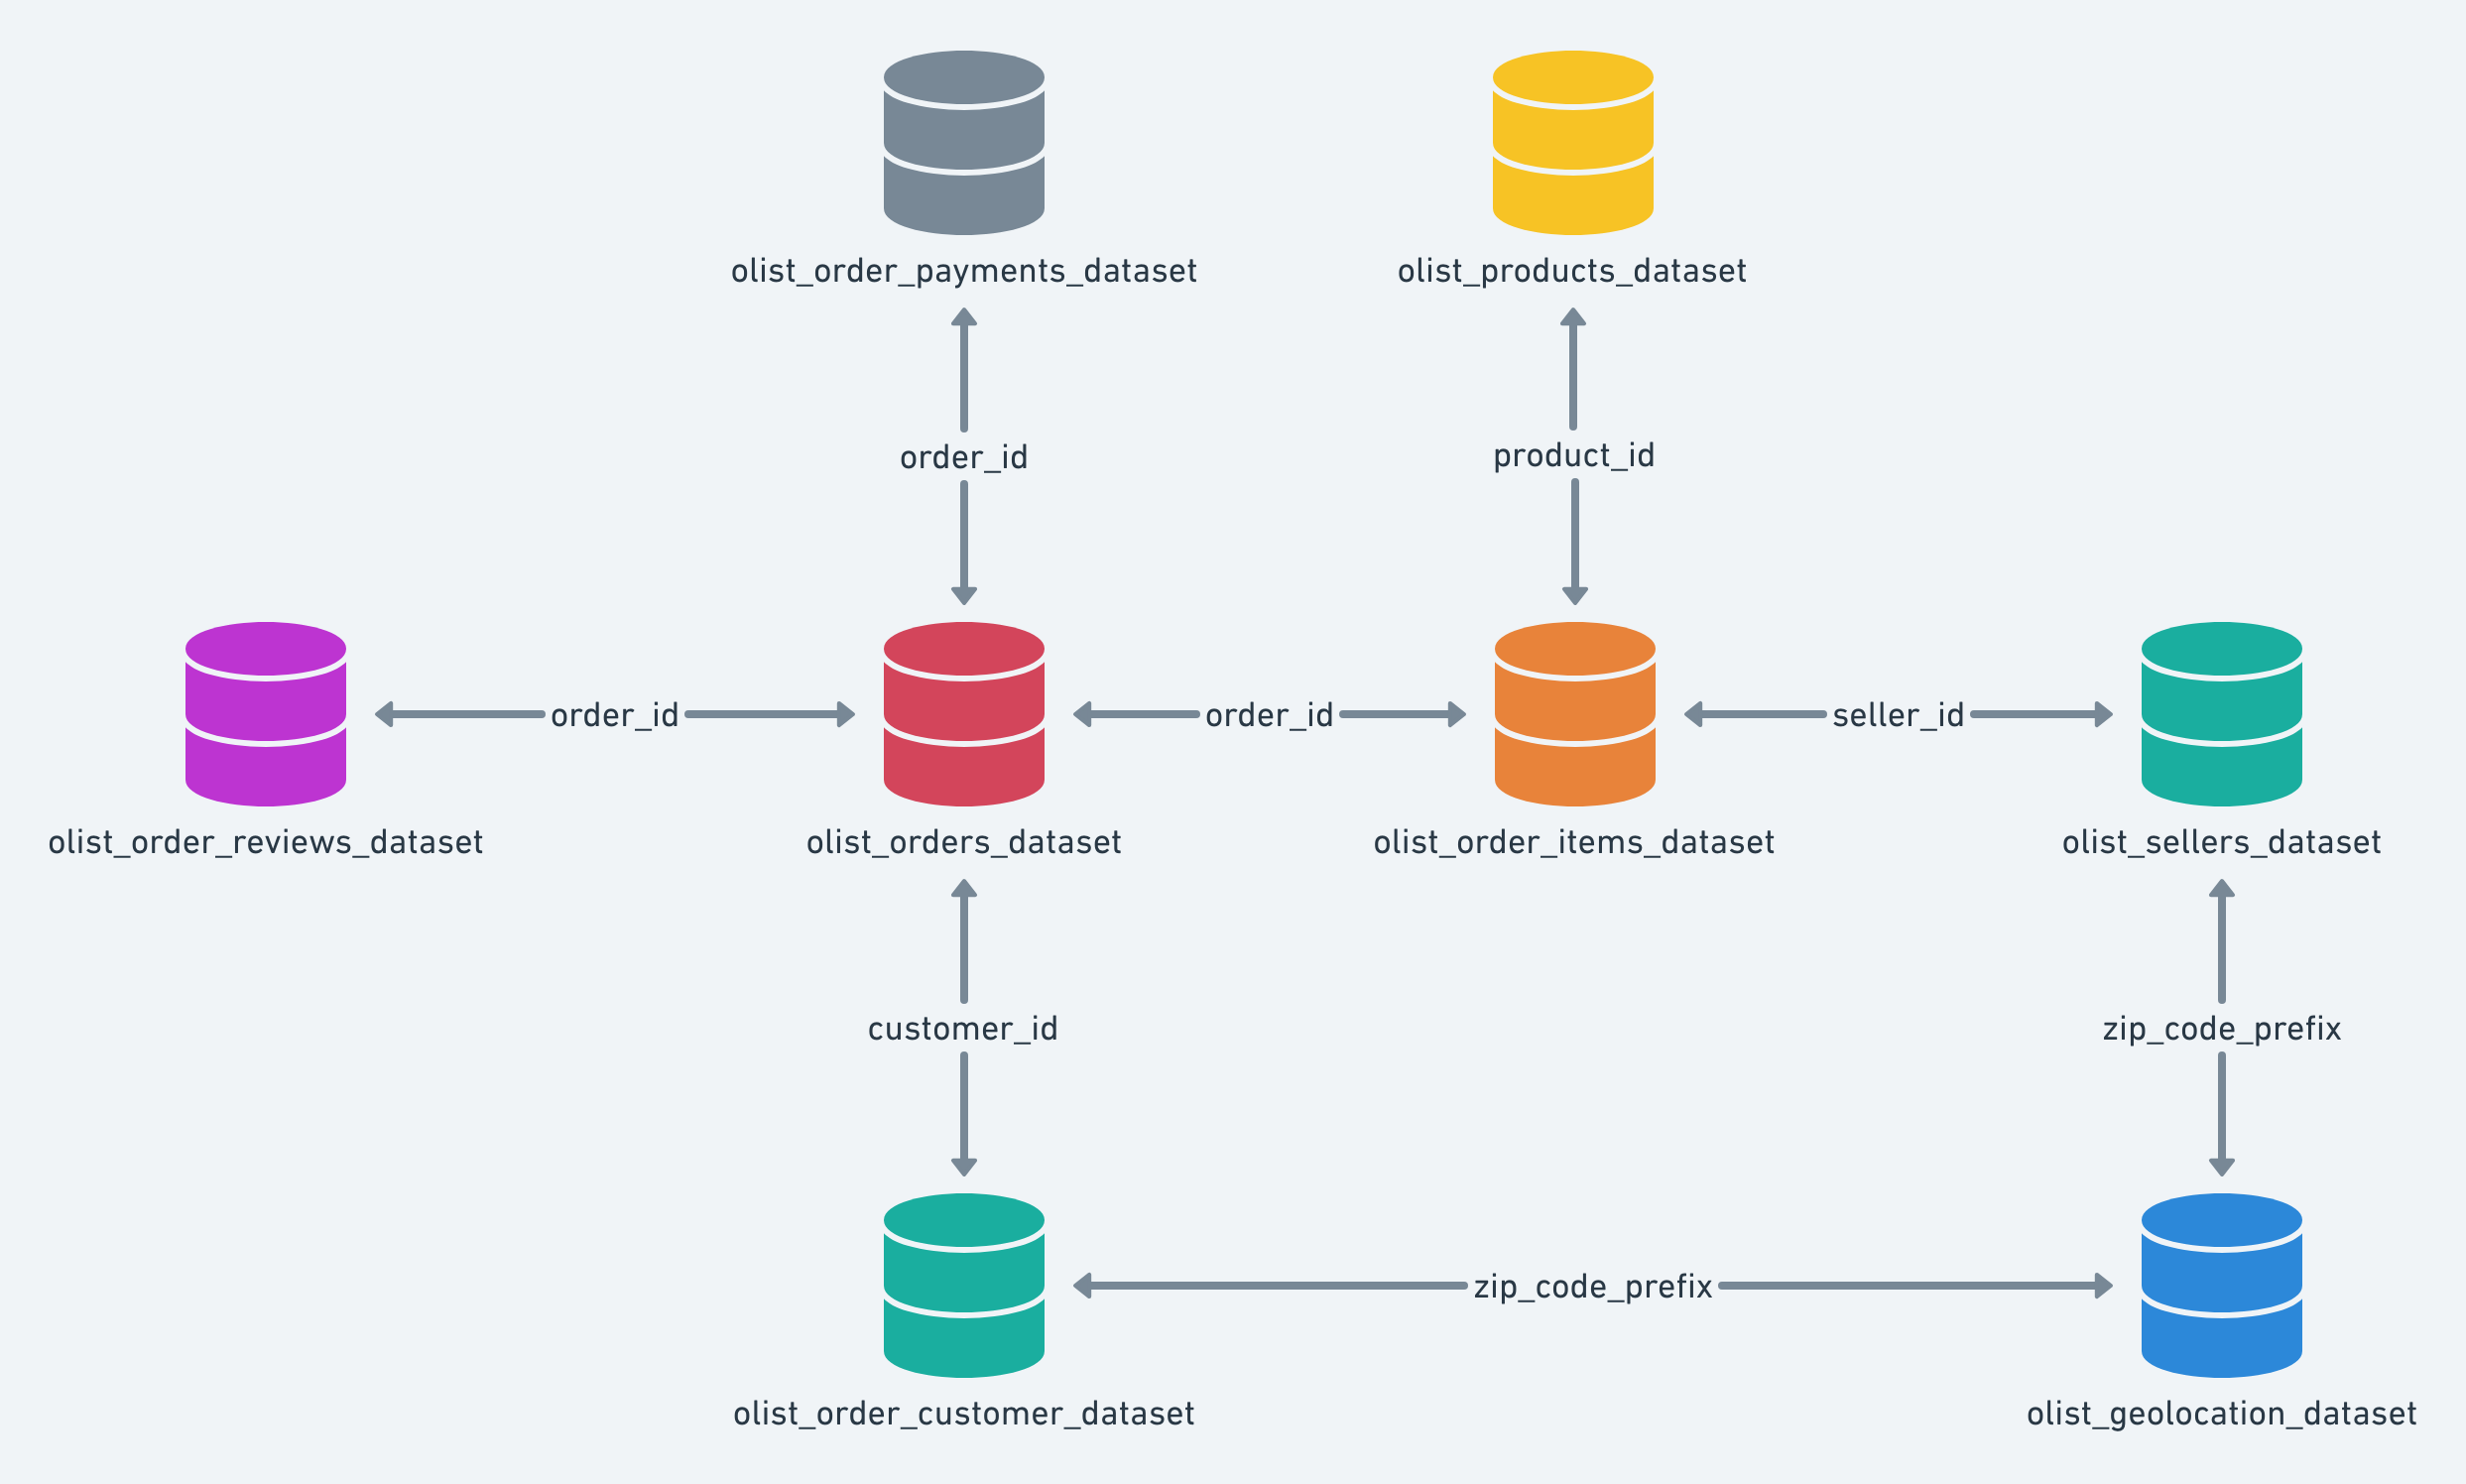

In [8]:
# Load the Olist e-commerce dataset into Pandas DataFrames.
customers_df = pd.read_csv('olist_customers_dataset.csv')
geolocation_df = pd.read_csv('olist_geolocation_dataset.csv')
order_items_df = pd.read_csv('olist_order_items_dataset.csv')
order_payments_df = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews_df = pd.read_csv('olist_order_reviews_dataset.csv')
orders_df = pd.read_csv('olist_orders_dataset.csv')
products_df = pd.read_csv('olist_products_dataset.csv')
sellers_df = pd.read_csv('olist_sellers_dataset.csv')
product_category_df = pd.read_csv('product_category_name_translation.csv')


In [9]:
# Create a list of all DataFrames for easier processing.
dfs = [
    customers_df,
    geolocation_df,
    order_items_df,
    order_payments_df,
    order_reviews_df,
    orders_df,
    products_df,
    sellers_df,
    product_category_df
]

# Corresponding list of DataFrame names for informative messages.
df_names = [
    'customers_df',
    'geolocation_df',
    'order_items_df',
    'order_payments_df',
    'order_reviews_df',
    'orders_df',
    'products_df',
    'sellers_df',
    'product_category_df'
]

# Iterate through each DataFrame and handle duplicates.
for i, df in enumerate(dfs):
    num_dups = df.duplicated().sum()

    if num_dups > 0:
        msg = f"Found {num_dups} duplicates in {df_names[i]}. Removing..."
        print(msg)
        df.drop_duplicates(inplace=True)
        df.reset_index(drop=True, inplace=True)
    else:
        print(f"No duplicates found in {df_names[i]}.")


No duplicates found in customers_df.
Found 261831 duplicates in geolocation_df. Removing...
No duplicates found in order_items_df.
No duplicates found in order_payments_df.
No duplicates found in order_reviews_df.
No duplicates found in orders_df.
No duplicates found in products_df.
No duplicates found in sellers_df.
No duplicates found in product_category_df.


In [10]:
# Download the "cities.py" script from Drive.
!gdown --id '1JLZGnLA2gCeu0NMKu_mwSLhzVCx-lkwt'


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1JLZGnLA2gCeu0NMKu_mwSLhzVCx-lkwt
From (redirected): https://drive.google.com/uc?id=1JLZGnLA2gCeu0NMKu_mwSLhzVCx-lkwt&confirm=t&uuid=ad6d9d4c-49b0-4394-8ba7-4699fe25caec
To: /content/cities.py
100% 3.34k/3.34k [00:00<00:00, 9.29MB/s]


In [11]:
# Execute the downloaded "cities.py" script.
!python cities.py


Fetching https://servicodados.ibge.gov.br/api/v1/localidades/municipios…
Sorting data…
Saving 5570 cities…
Saving 27 states…
Done!


In [12]:
# Load the reference cities data into a DataFrame.
ref_cities_df = pd.read_csv('cities.csv')
ref_states_df = pd.read_csv('states.csv')


## **2.3. Create Functions**

In [13]:
# @title **analyze_dataframe** {display-mode: "form"}
def analyze_dataframe(df):
    """
    Analyzes a pandas DataFrame and provides a summary of its columns.

    Args:
        df: The pandas DataFrame to analyze.

    Returns:
        None. Displays the first few rows of the DataFrame and a summary table.
    """

    # Initialize a dictionary to store summary statistics for each column.
    summary_data = {
        'Column': df.columns.values,
        'Type': df.dtypes.values,
        'Null': df.isna().sum().values,
        'Unique': df.nunique().values,
        'Unique Values': [df[i].unique() for i in df.columns],
        'Min': pd.Series(dtype='object'),
        'Max': pd.Series(dtype='object')
    }

    # Create a DataFrame from the summary data.
    summary = pd.DataFrame(summary_data, index=range(len(df.columns)))

    # Identify numeric columns.
    numeric_cols = df.select_dtypes(include='number').columns

    # Calculate and populate min/max values for numeric columns.
    for col in numeric_cols:
        summary.loc[summary['Column'] == col, 'Min'] = df[col].min()
        summary.loc[summary['Column'] == col, 'Max'] = df[col].max()

    # Display the first few rows of the DataFrame and the summary table.
    display(
        df[:1],
        df.shape,
        summary
    )


In [14]:
# @title **validate_and_correct_values** {display-mode: "form"}
def validate_and_correct_values(df, ref_df, df_col, ref_col):
    """
    Validates values in `df_col` against `ref_col`, and attempts to correct any
    discrepancies.

    Args:
        df: The DataFrame containing the values to be validated.
        ref_df: The reference DataFrame containing the valid values.
        df_col: The name of the column in `df` to validate.
        ref_col: The name of the column in `ref_df` to use for validation.

    Returns:
        None (modifies the original DataFrame `df` in-place).
    """

    # Normalize values for case/diacritic-insensitive comparison.
    normalized_df_values = set(
        df[df_col].astype(str).str.lower().apply(unidecode)
    )
    normalized_ref_df_values = set(
        ref_df[ref_col].astype(str).str.lower().apply(unidecode)
    )

    # Check if all values are present in the reference.
    all_values_present = normalized_df_values.issubset(
        normalized_ref_df_values
    )

    if all_values_present:
        print(f"All values from '{df_col}' are present in '{ref_col}'.")
    else:
        print(f"Some values from '{df_col}' are not present in '{ref_col}'.")
        print("Attempting correction...")

        # Identify incorrect values.
        incorrect_values = normalized_df_values - normalized_ref_df_values

        # Find closest matches for correction using Levenshtein distance.
        value_corrections = {}
        for value in incorrect_values:
            closest_match = min(
                normalized_ref_df_values,
                key=lambda x: levenshtein_distance(x, value),
            )
            value_corrections[value] = closest_match

        # Apply corrections to the original DataFrame.
        df[df_col] = (
            df[df_col]
            .astype(str)
            .str.lower()
            .apply(unidecode)
            .replace(value_corrections)
        )

        print("Correction process completed.")


In [15]:
# @title **create_bar_chart** {display-mode: "form"}
def create_bar_chart(series, axis, title, xlabel, ylabel, limit=10, ax=None):
    """
    Visualizes the values in a pandas Series on descending order using a bar chart.

    Args:
        series: The pandas Series to visualize.
        axis: The axis on which to plot the values ('x' or 'y')
        title: The title of the plot.
        xlabel: The label for the x-axis.
        ylabel: The label for the y-axis.
        limit: (Optional) The number of values to display.
        ax: (Optional) The matplotlib axes object to plot on.

    Returns:
        None
    """

    # Sort the series in descending order before applying the limit
    series = series.sort_values(ascending=False)

    # Handle cases where there are fewer unique values than the specified limit
    if limit is None or limit > len(series):
        limit = len(series)

    series = series.head(limit)

    # Convert index to strings for consistent handling
    series.index = series.index.astype(str)

    # Create a figure and axes if not provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(16, 6))

    if axis == 'x':
        sns.barplot(x=series.index, y=series.values, palette='viridis', ax=ax)
        ax.set_xticklabels(
            [label[:15] + ('...' if len(label) > 15 else '') for label in series.index],
            rotation=45
        )
        for i, value in enumerate(series.values):
            if value >= 1000000:
                simplified_value = f"{value/1000000:.1f}m"
            elif value >= 10000:
                simplified_value = f"{value/1000:.0f}k"
            elif value >= 1000:
                simplified_value = f"{value/1000:.1f}k"
            else:
                simplified_value = str(value)
            ax.text(i, value, simplified_value, ha='center', va='bottom')

    elif axis == 'y':
        sns.barplot(x=series.values, y=series.index, palette='viridis', ax=ax)
        ax.set_yticks(range(len(series)),
                        [label[:15] + ('...' if len(label) > 15 else '') for label in series.index])
        for i, value in enumerate(series.values):
            if value >= 1000000:
                simplified_value = f"{value/1000000:.1f}m"
            elif value >= 10000:
                simplified_value = f"{value/1000:.0f}k"
            elif value >= 1000:
                simplified_value = f"{value/1000:.1f}k"
            else:
                simplified_value = str(value)
            ax.text(value, i, simplified_value, ha='left', va='center')
    else:
        print(f"Error: Invalid axis '{axis}'. Please choose 'x' or 'y'.")
        return

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)



    # Adjust layout if plotting on a new figure
    if ax is None:
        plt.tight_layout()
        plt.show()


In [16]:
# @title **create_pie_chart** {display-mode: "form"}
def create_pie_chart(series, title, ax=None):
    """
    Visualizes the values in a pandas Series using a pie chart.

    Args:
        series: The pandas Series to visualize.
        title: The title of the plot.
        ax: (Optional) The axes object to plot on.

    Returns:
        None
    """

    # Sort the series in descending order
    series = series.sort_values(ascending=False)

    total_categories = len(series)

    # Handle different category count scenarios
    if total_categories <= 4:
        # No aggregation needed if 5 or fewer categories
        top_values = series
    else:
        # Aggregate categories beyond the top 4 into 'Others'
        other_count = series[3:].sum()
        top_values = series[:3]
        top_values['Others'] = other_count

    # If ax is not provided, create a new figure and axes
    if ax is None:
        fig, ax = plt.subplots(figsize=(16, 6))

    # Plot the pie chart with a contrasting color palette on the provided ax
    wedges, _, labels = ax.pie(top_values.values, labels=None,
                               autopct='%1.1f%%',
                               startangle=140, colors=sns.color_palette('Set2'))

    # Add legend
    ax.legend(wedges, top_values.index, loc="best")

    # Equal aspect ratio ensures that pie is drawn as a circle
    ax.axis('equal')

    # Set title
    ax.set_title(title)

    # Adjust layout if plotting on a new figure
    if ax is None:
        plt.tight_layout()
        plt.show()


In [17]:
# @title **create_waterfall_chart** {display-mode: "form"}
def create_waterfall_chart(series, title, xlabel, ylabel, swap_colors=False, ax=None):
    """
    Visualizes the values in a pandas Series using a waterfall chart.

    Args:
        series: The pandas Series to visualize.
        title: The title of the plot.
        xlabel: The label for the x-axis.
        ylabel: The label for the y-axis.
        swap_colors: If True, swap the colors for positive and negative changes (optional).
        ax: The subplot axes to plot on (optional).
    """

    if ax is None:
        fig, ax = plt.subplots(figsize=(16, 6))

    # Convert PeriodIndex to DatetimeIndex if needed
    if isinstance(series.index, pd.PeriodIndex):
        series.index = series.index.to_timestamp()

    # Create a new Series with an empty series point at the start
    first_date = series.index[0] - pd.DateOffset(months=1)
    new_series = pd.concat([pd.Series({first_date: 0}), series])
    new_series.index = pd.to_datetime(new_series.index)

    # Calculate the changes between consecutive series points (including the new one)
    changes = new_series.diff()

    # Create a blank array to store the baseline for each bar
    blanks = np.zeros(len(new_series))

    # Calculate the 25% and 75% quartiles of the time range
    q25_time = series.index[int(0.25 * len(series))]
    q75_time = series.index[int(0.75 * len(series))]

    # Initialize variables to store the lowest and highest points within the range
    lowest_point = None
    highest_point = None
    lowest_point_index = None
    highest_point_index = None

    # Plot the waterfall chart
    for i, change in enumerate(changes):
        # Check for finite values before plotting
        if np.isfinite(change) and np.isfinite(blanks[i]):
            # Set color based on positive or negative change, with optional swap
            if swap_colors:
                color = 'red' if change >= 0 else 'green'
            else:
                color = 'green' if change >= 0 else 'red'
            ax.bar(new_series.index[i], change, bottom=blanks[i], width=20, color=color)

            # Update the baseline for the next bar, only if not the last element
            if i + 1 < len(blanks):
                blanks[i + 1] = blanks[i] + change

            # Add series labels on the bars, check to avoid going out of bounds
            if i < len(new_series):
                # Change label to 'k' if value >= 10000
                if abs(change) >= 10000:
                    label = f"+{change/1000:.0f}k" if change >= 0 else f"{change/1000:.0f}k"
                elif abs(change) >= 1000:
                    label = f"+{change/1000:.1f}k" if change >= 0 else f"{change/1000:.1f}k"
                else:
                    label = f"+{change:.0f}" if change >= 0 else f"{change:.0f}"

                # Adjust label position based on change direction and bar height
                va = 'bottom' if change >= 0 else 'top'
                y_offset = 0.1 + abs(change) * 0.01
                label_y = blanks[i] + change + y_offset if change >= 0 else blanks[i] + change - y_offset
                ax.text(new_series.index[i], label_y, label, ha='center', va=va, color='black')

                # Adjust vertical line starting point based on change
                line_start = blanks[i] if change >= 0 else blanks[i] + change

                # Add vertical line from bar to x-axis, thicker
                ax.plot([new_series.index[i], new_series.index[i]], [0, line_start], color='gray', linestyle='-', linewidth=1)

                # Check if the current point is within the 25% - 75% time range
                if q25_time <= new_series.index[i] <= q75_time:
                    # Update lowest and highest points if necessary
                    current_point = new_series.values[i]  # Get the actual data point value

                    if lowest_point is None or current_point < lowest_point:
                        lowest_point = current_point
                        lowest_point_index = i
                    if highest_point is None or current_point > highest_point:
                        highest_point = current_point
                        highest_point_index = i

                else:
                    pass

    # Shade the areas behind the bars for the lowest and highest points only once, full height
    lowest_color = 'red' if not swap_colors else 'green'
    highest_color = 'green' if not swap_colors else 'red'

    if lowest_point is not None:
        ax.axvspan(new_series.index[lowest_point_index] - pd.Timedelta(days=10), new_series.index[lowest_point_index] + pd.Timedelta(days=10),
                   ymin=0, ymax=1, color=lowest_color, alpha=0.3)

    if highest_point is not None:
        ax.axvspan(new_series.index[highest_point_index] - pd.Timedelta(days=10), new_series.index[highest_point_index] + pd.Timedelta(days=10),
                   ymin=0, ymax=1, color=highest_color, alpha=0.3)

    # Add line plot of the original series
    ax.plot(series.index, series.values, color='blue', linestyle='-')

    # Add labels, title
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title, y=1.05)

    # Rotate x-axis labels for better readability
    plt.setp(ax.get_xticklabels(), rotation=45)

    # Set the x-axis ticks to show all labels
    ax.set_xticks(series.index)
    ax.tick_params(axis='x', pad=10)

    # Skip x-axis labels for every 2 label
    for label in ax.get_xticklabels():
        if label.get_text():
            # Convert label text to datetime
            date = pd.to_datetime(label.get_text())

            # Check if the month is even and hide the label if so
            if date.month % 2 == 0:
                label.set_visible(False)

    # Add legend for lowest and highest points with white background
    legend_elements = [Patch(facecolor=highest_color, alpha=0.3, edgecolor='black', label='Highest IQR Time Period'),
                       Patch(facecolor=lowest_color, alpha=0.3, edgecolor='black', label='Lowest IQR Time Period')]
    ax.legend(handles=legend_elements, loc='best')

    # Show the plot with gridlines
    ax.grid(True)

    if ax is None:
        plt.tight_layout()
        plt.show()


In [18]:
# @title **create_time_chart** {display-mode: "form"}
def create_time_chart(series, axis, title, xlabel, ylabel, period, ax=None):
    """
    Visualizes the values in a pandas Series on time order using a bar chart.

    Args:
        series: The pandas Series to visualize.
        axis: The axis on which to plot the values ('x' or 'y')
        title: The title of the plot.
        xlabel: The label for the x-axis.
        ylabel: The label for the y-axis.
        period: The time period represented by the data ('7d' or '24h').
        ax: (Optional) The matplotlib axes object to plot on.

    Returns:
        None
    """

    # Convert index for consistent handling
    series.index = series.index.astype(int).astype(str)

    # Create a figure and axes if not provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(16, 6))

    # Normalize the values to be between 0 and 1
    normalized_values = (series.values - series.values.min()) / (series.values.max() - series.values.min())

    # Get the 'viridis' colormap
    cmap = plt.get_cmap('viridis')

    # Invert the normalized values to reverse the color gradient
    inverted_normalized_values = 1 - normalized_values

    # Create a list of colors from the colormap, using the inverted normalized values
    colors = [cmap(value) for value in inverted_normalized_values]

    if axis == 'x':
        sns.barplot(x=series.index, y=series.values, palette=colors, ax=ax)

        # Apply x-axis labels only if period is '7d'
        if period == '7d':
            ax.set_xticklabels(
                [calendar.day_name[int(label) % 7] for label in series.index],
                rotation=45
            )

        for i, value in enumerate(series.values):
            simplified_value = f"{value/1000:.1f}k" if value >= 1000 else str(value)
            ax.text(i, value, simplified_value, ha='center', va='bottom')

    elif axis == 'y':
        sns.barplot(x=series.values, y=series.index, palette=colors, ax=ax)

        # Apply y-axis labels only if period is '7d'
        if period == '7d':
            ax.set_yticklabels(
                [calendar.day_name[int(label) % 7] for label in series.index]
            )
        else:
            ax.set_yticklabels(
                [label[:15] + ('...' if len(label) > 15 else '') for label in series.index]
            )

        for i, value in enumerate(series.values):
            simplified_value = f"{value/1000:.1f}k" if value >= 1000 else str(value)
            ax.text(value, i, simplified_value, ha='left', va='center')

    else:
        print(f"Error: Invalid axis '{axis}'. Please choose 'x' or 'y'.")
        return

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    # Adjust layout if plotting on a new figure
    if ax is None:
        plt.tight_layout()
        plt.show()


In [19]:
# @title **create_date_chart** {display-mode: "form"}
def create_date_chart(series, title, xlabel, ylabel, swap_colors=False, ax=None):
    """
    Visualizes the values in a pandas Series on date order using a bar chart.

    Args:
        series: The pandas Series to visualize.
        title: The title of the plot.
        xlabel: The label for the x-axis.
        ylabel: The label for the y-axis.
        swap_colors: If True, swap the colors for positive and negative changes (optional).
        ax: The subplot axes to plot on (optional).
    """

    if ax is None:
        fig, ax = plt.subplots(figsize=(16, 6))

    # Convert PeriodIndex to DatetimeIndex if needed
    if isinstance(series.index, pd.PeriodIndex):
        series.index = series.index.to_timestamp()

    # Get the maximum absolute value in the series for normalization
    max_abs_val = max(abs(series))

    # Define a custom bright red-to-vibrant green colormap
    colors = [(1, 0, 0), (0, 0.8, 0)]
    cmap_name = 'bright_red_to_vibrant_green'
    cm_red_to_green = LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

    # Plot the bar chart
    for i, value in enumerate(series):
        # Check for finite values before plotting
        if np.isfinite(value):
            # Normalize the value between 0 and 1
            norm_val = abs(value) / max_abs_val

            # Adjust norm_val if swap_colors is True
            if swap_colors:
                if value >= 0:
                    norm_val = 0.5 + norm_val / 2  # Range 0.5 to 1
                else:
                    norm_val = 0.5 - norm_val / 2  # Range 0 to 0.5

            # Get color from the custom colormap
            color = cm_red_to_green(norm_val)

            ax.bar(series.index[i], value, width=20, color=color)

            # Add value labels on the bars
            if abs(value) >= 10000:
                label = f"{value/1000:.0f}k" if value >= 0 else f"{value/1000:.0f}k"
            else:
                label = f"{value:.1f}" if value >= 0 else f"{value:.1f}"

            # Adjust label position based on value direction and bar height
            va = 'bottom' if value >= 0 else 'top'
            y_offset = 0.1 + abs(value) * 0.01
            label_y = value + y_offset if value >= 0 else value - y_offset
            ax.text(series.index[i], label_y, label, ha='center', va=va, color='black')

    # Add labels, title, and legend with adjusted vertical positioning
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title, y=1.05)

    # Rotate x-axis labels for better readability
    plt.setp(ax.get_xticklabels(), rotation=45)

    # Set the x-axis ticks to show all labels
    ax.set_xticks(series.index)
    ax.tick_params(axis='x', pad=10)

    # Skip x-axis labels for every 2 label
    for label in ax.get_xticklabels():
        if label.get_text():
            # Convert label text to datetime
            date = pd.to_datetime(label.get_text())

            # Check if the month is even and hide the label if so
            if date.month % 2 == 0:
                label.set_visible(False)

    # Show the plot with gridlines
    ax.grid(True)

    if ax is None:
        plt.tight_layout()
        plt.show()


In [20]:
# @title **create_density_chart** {display-mode: "form"}
def create_density_chart(dfs, col, labels, title, ax=None):
    """
    Visualizes the values in a pandas Dataframes using a density chart.

    Args:
        dfs: A list of pandas DataFrames.
        col: The column to plot.
        labels: A list representing the labels for each dataframe in the plot.
        title: The title of the plot.
        xlabel: The label for the x-axis.
        ylabel: The label for the y-axis.
        ax: (Optional) The axes object to plot on.

    Returns:
        None
    """

    # If ax is not provided, create a new figure and axes
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    # Iterate through dfs and plot their densities
    for df, label in zip(dfs, labels):
        sns.kdeplot(df[col], label=label, fill=True, ax=ax)

    # Set labels and title
    ax.set_xlabel(col)
    ax.set_ylabel('Density')
    ax.set_title(title)

    # Add legend
    ax.legend()

    # Adjust layout if plotting on a new figure
    if ax is None:
        plt.tight_layout()
        plt.show()


In [21]:
# @title **create_boxplot_chart** {display-mode: "form"}
def create_boxplot_chart(dfs, col, labels, title, ax=None):
    """
    Visualizes the values in pandas Dataframes using boxplots.

    Args:
        dfs: A list of pandas DataFrames.
        col: The column to plot.
        labels: A list representing the labels for each dataframe in the plot.
        title: The title of the plot.
        ax: (Optional) The axes object to plot on.

    Returns:
        None
    """

    # If ax is not provided, create a new figure and axes
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    # Extract data for boxplots
    data = [df[col].dropna() for df in dfs]

    # Get default color palette from seaborn
    palette = sns.color_palette()

    # Reverse the order of data to invert the plot
    data = data[::-1]

    # Create stacked boxplots with colors
    boxplots = ax.boxplot(data, labels=labels, vert=False, patch_artist=True)

    # Set colors for each boxplot, following the original order of labels
    for patch, color in zip(boxplots['boxes'], palette):
        patch.set_facecolor(color)

    # Set labels and title
    ax.set_xlabel(col)
    ax.set_title(title)

    # Adjust layout if plotting on a new figure
    if ax is None:
        plt.tight_layout()
        plt.show()


# **3. Data Cleaning**

## **3.1. customers**

| Columns | Description |
| --- | --- |
| **customer_id** | Unique identifier for each customer. |
| **customer_unique_id** | Unique identifier for each customer (anonymized). |
| **customer_zip_code_prefix** | Zip code prefix of the customer's address. |
| **customer_city** | City where the customer is located. |
| **customer_state** | State where the customer is located. |

In [22]:
# Analyze the 'customers_df' DataFrame before cleaning.
analyze_dataframe(customers_df)


customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   

   customer_zip_code_prefix customer_city customer_state  
0                     14409        franca             SP

(99441, 5)

Column    Type  Null  Unique  \
0               customer_id  object     0   99441   
1        customer_unique_id  object     0   96096   
2  customer_zip_code_prefix   int64     0   14994   
3             customer_city  object     0    4119   
4            customer_state  object     0      27   

                                       Unique Values   Min    Max  
0  [06b8999e2fba1a1fbc88172c00ba8bc7, 18955e83d33...   NaN    NaN  
1  [861eff4711a542e4b93843c6dd7febb0, 290c77bc529...   NaN    NaN  
2  [14409, 9790, 1151, 8775, 13056, 89254, 4534, ...  1003  99990  
3  [franca, sao bernardo do campo, sao paulo, mog...   NaN    NaN  
4  [SP, SC, MG, PR, RJ, RS, PA, GO, ES, BA, MA, M...   NaN    NaN

**Summary**

This dataframe provides customer-related information focusing on their location and identity. It includes:

* **Unique identifiers:** Both a raw `customer_id` and an anonymized `customer_unique_id` are present for tracking individual customers while potentially preserving privacy.
* **Location details:** The `customer_zip_code_prefix`, `customer_city`, and `customer_state` columns offer insights into the geographical distribution of the customer base.

This data can be leveraged for various analyses like understanding customer demographics, regional sales patterns, or optimizing logistics based on customer locations.

**Treatment**

In [23]:
# Rename the 'customer_zip_code_prefix' column to 'zip_code_prefix'.
customers_df.rename(
    columns={'customer_zip_code_prefix': 'zip_code_prefix'},
    inplace=True
)


- The `customer_zip_code_prefix` column was renamed to `zip_code_prefix` to streamline the process of combining this dataset with other dataframes based on zip code prefixes.

In [24]:
# Analyze the 'ref_cities_df' DataFrame.
analyze_dataframe(ref_cities_df)


code             name state
0  5200050  Abadia de Goiás    GO

(5570, 3)

Column    Type  Null  Unique  \
0   code   int64     0    5570   
1   name  object     0    5297   
2  state  object     0      27   

                                       Unique Values      Min      Max  
0  [5200050, 3100104, 5200100, 1500107, 3100203, ...  1100015  5300108  
1  [Abadia de Goiás, Abadia dos Dourados, Abadiân...      NaN      NaN  
2  [GO, MG, PA, CE, BA, PR, SC, PE, TO, RN, PI, R...      NaN      NaN

In [25]:
# Validate and correct 'customer_city' in 'customers_df'
validate_and_correct_values(
    customers_df, ref_cities_df,
    'customer_city', 'name'
)


Some values from 'customer_city' are not present in 'name'.
Attempting correction...
Correction process completed.


In [26]:
# Analyze the 'ref_states_df' DataFrame.
analyze_dataframe(ref_states_df)


code abbr  name
0    12   AC  Acre

(27, 3)

Column    Type  Null  Unique  \
0   code   int64     0      27   
1   abbr  object     0      27   
2   name  object     0      27   

                                       Unique Values  Min  Max  
0  [12, 27, 16, 13, 29, 23, 53, 32, 52, 21, 51, 5...   11   53  
1  [AC, AL, AP, AM, BA, CE, DF, ES, GO, MA, MT, M...  NaN  NaN  
2  [Acre, Alagoas, Amapá, Amazonas, Bahia, Ceará,...  NaN  NaN

In [27]:
# Merge 'customers_df' and 'ref_states_df' on 'customer_state' and 'abbr'
customers_df = customers_df.merge(ref_states_df, left_on='customer_state', right_on='abbr', how='left')

# Drop the original 'customer_state' and 'abbr' columns
customers_df.drop(['customer_state', 'abbr'], axis=1, inplace=True)

# Rename the 'name' column to 'customer_state'
customers_df.rename(columns={'name': 'customer_state'}, inplace=True)


In [28]:
# Validate and correct 'customer_state' in 'customers_df'
validate_and_correct_values(
    customers_df, ref_states_df,
    'customer_state', 'name'
)


All values from 'customer_state' are present in 'name'.


- The `validate_and_correct_values` function was applied to ensure data integrity. It successfully:
    - Identified and rectified inconsistencies in the `customer_city` column of the `customers_df` dataframe by cross-referencing it with the `name` column in the `ref_cities_df` dataframe. Discrepancies were resolved using the Levenshtein distance algorithm to pinpoint the closest matching city name.
    - Confirmed that all values within the `customer_state` column of the `customers_df` dataframe were present and accurate when compared against the `abbr` column in the `ref_states_df` dataframe.


In [29]:
# Analyze the 'customers_df' DataFrame after cleaning.
analyze_dataframe(customers_df)


customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   

   zip_code_prefix customer_city  code customer_state  
0            14409        franca    35      São Paulo

(99441, 6)

Column    Type  Null  Unique  \
0         customer_id  object     0   99441   
1  customer_unique_id  object     0   96096   
2     zip_code_prefix   int64     0   14994   
3       customer_city  object     0    3932   
4                code   int64     0      27   
5      customer_state  object     0      27   

                                       Unique Values   Min    Max  
0  [06b8999e2fba1a1fbc88172c00ba8bc7, 18955e83d33...   NaN    NaN  
1  [861eff4711a542e4b93843c6dd7febb0, 290c77bc529...   NaN    NaN  
2  [14409, 9790, 1151, 8775, 13056, 89254, 4534, ...  1003  99990  
3  [franca, sao bernardo do campo, sao paulo, mog...   NaN    NaN  
4  [35, 42, 31, 41, 33, 43, 15, 52, 32, 29, 21, 5...    11     53  
5  [São Paulo, Santa Catarina, Minas Gerais, Para...   NaN    NaN

## **3.2. geolocation**

| Columns | Description |
| --- | --- |
| **geolocation_zip_code_prefix** | Zip code prefix for the location. |
| **geolocation_lat** | Latitude of the location. |
| **geolocation_lng** | Longitude of the location. |
| **geolocation_city** | City of the location. |
| **geolocation_state** | State of the location. |

In [30]:
# Analyze the 'geolocation_df' DataFrame before cleaning.
analyze_dataframe(geolocation_df)


geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   

  geolocation_city geolocation_state  
0        sao paulo                SP

(738332, 5)

Column     Type  Null  Unique  \
0  geolocation_zip_code_prefix    int64     0   19015   
1              geolocation_lat  float64     0  717360   
2              geolocation_lng  float64     0  717613   
3             geolocation_city   object     0    8011   
4            geolocation_state   object     0      27   

                                       Unique Values         Min         Max  
0  [1037, 1046, 1041, 1035, 1012, 1047, 1013, 102...        1001       99990  
1  [-23.54562128115268, -23.54608112703553, -23.5...  -36.605374   45.065933  
2  [-46.63929204800168, -46.64482029837157, -46.6... -101.466766  121.105394  
3  [sao paulo, são paulo, sao bernardo do campo, ...         NaN         NaN  
4  [SP, RN, AC, RJ, ES, MG, BA, SE, PE, AL, PB, C...         NaN         NaN

**Summary**

This dataframe contains geographical data linked to specific locations using zip code prefixes. It includes:

* **Location identifiers:** The `geolocation_zip_code_prefix` serves as the primary key, associating other geographical attributes with specific regions.
* **Spatial coordinates:** Latitude (`geolocation_lat`) and longitude (`geolocation_lng`) provide precise location points, enabling mapping and distance calculations.
* **Administrative details:** The `geolocation_city` and `geolocation_state` offer contextual information about the location's administrative divisions.

This dataset can be utilized for various spatial analyses such as visualizing location distributions, calculating distances between points, or understanding regional trends based on geolocation.

**Treatment**


In [31]:
# Rename the 'geolocation_zip_code_prefix' column to 'zip_code_prefix'.
geolocation_df.rename(
    columns={'geolocation_zip_code_prefix': 'zip_code_prefix'},
    inplace=True
)

- **Renaming:** The column `geolocation_zip_code_prefix` was renamed to `zip_code_prefix` to streamline its usage as a primary key when joining with `customers_df` and `sellers_df`.


In [32]:
# Drop the 'geolocation_city' and 'geolocation_state' columns.
geolocation_df.drop(
    columns=['geolocation_city','geolocation_state'],
    inplace=True
)


- **Dropping redundant columns:** The columns `geolocation_city` and `geolocation_state` were removed to avoid redundancy, as this information is already present in the `customers_df` and `sellers_df` datasets.


In [33]:
# Remove duplicate rows based on 'zip_code_prefix'.
geolocation_df = (
    geolocation_df
    .drop_duplicates(subset=['zip_code_prefix'])
    .reset_index(drop=True)
)


- **Removing duplicates:** Duplicate rows based on the `zip_code_prefix` were eliminated to ensure data integrity and prevent potential issues during subsequent joins or analyses.

In [34]:
# Analyze the 'geolocation_df' DataFrame after cleaning.
analyze_dataframe(geolocation_df)


zip_code_prefix  geolocation_lat  geolocation_lng
0             1037       -23.545621       -46.639292

(19015, 3)

Column     Type  Null  Unique  \
0  zip_code_prefix    int64     0   19015   
1  geolocation_lat  float64     0   18987   
2  geolocation_lng  float64     0   18988   

                                       Unique Values        Min         Max  
0  [1037, 1046, 1041, 1035, 1012, 1047, 1013, 102...       1001       99990  
1  [-23.54562128115268, -23.54608112703553, -23.5... -36.605374   42.184003  
2  [-46.63929204800168, -46.64482029837157, -46.6... -72.927296  121.105394

## **3.3. order_items**

| Columns | Description |
| --- | --- |
| **order_id** | Unique identifier for the order. |
| **order_item_id** | Unique identifier for each item within an order. |
| **product_id** | Unique identifier for the product being ordered. |
| **seller_id** | Unique identifier for the seller who listed the product. |
| **shipping_limit_date** | Date and time when the seller has to ship the product. |
| **price** | Price of the product. |
| **freight_value** | Shipping fee for the product. |

In [35]:
# Analyze the 'order_items_df' DataFrame before cleaning.
analyze_dataframe(order_items_df)


order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   

   shipping_limit_date  price  freight_value  
0  2017-09-19 09:45:35   58.9          13.29

(112650, 7)

Column     Type  Null  Unique  \
0             order_id   object     0   98666   
1        order_item_id    int64     0      21   
2           product_id   object     0   32951   
3            seller_id   object     0    3095   
4  shipping_limit_date   object     0   93318   
5                price  float64     0    5968   
6        freight_value  float64     0    6999   

                                       Unique Values   Min     Max  
0  [00010242fe8c5a6d1ba2dd792cb16214, 00018f77f2f...   NaN     NaN  
1  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...     1      21  
2  [4244733e06e7ecb4970a6e2683c13e61, e5f2d52b802...   NaN     NaN  
3  [48436dade18ac8b2bce089ec2a041202, dd7ddc04e1b...   NaN     NaN  
4  [2017-09-19 09:45:35, 2017-05-03 11:05:13, 201...   NaN     NaN  
5  [58.9, 239.9, 199.0, 12.99, 199.9, 21.9, 19.9,...  0.85  6735.0  
6  [13.29, 19.93, 17.87, 12.79, 18.14, 12.69, 11....   0.0  409.68

**Summary**

This dataframe captures transactional details of orders, connecting products, sellers, and shipping information. It includes:

* **Order identifiers:** The `order_id` and `order_item_id` provide a hierarchical structure to track individual orders and the items within them.
* **Product and seller links:** The `product_id` and `seller_id` establish relationships between ordered products and the sellers responsible for them.
* **Shipping and pricing:** The `shipping_limit_date` sets the deadline for sellers to dispatch orders, while `price` and `freight_value` detail the product cost and associated shipping fee.

This data can be used for various analyses such as tracking order fulfillment, calculating revenue and shipping costs, or understanding product and seller performance.


**Treatment**


In [36]:
# Convert 'shipping_limit_date' column to datetime.
order_items_df['shipping_limit_date'] = pd.to_datetime(
    order_items_df['shipping_limit_date']
)


- **Converting Date Columns to Datetime:** Specific columns containing date-related information were converted to the datetime data type, enabling time-based operations and analysis.

In [37]:
# Analyze the 'order_items_df' DataFrame after cleaning.
analyze_dataframe(order_items_df)


order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   

  shipping_limit_date  price  freight_value  
0 2017-09-19 09:45:35   58.9          13.29

(112650, 7)

Column            Type  Null  Unique  \
0             order_id          object     0   98666   
1        order_item_id           int64     0      21   
2           product_id          object     0   32951   
3            seller_id          object     0    3095   
4  shipping_limit_date  datetime64[ns]     0   93318   
5                price         float64     0    5968   
6        freight_value         float64     0    6999   

                                       Unique Values   Min     Max  
0  [00010242fe8c5a6d1ba2dd792cb16214, 00018f77f2f...   NaN     NaN  
1  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...     1      21  
2  [4244733e06e7ecb4970a6e2683c13e61, e5f2d52b802...   NaN     NaN  
3  [48436dade18ac8b2bce089ec2a041202, dd7ddc04e1b...   NaN     NaN  
4  [2017-09-19 09:45:35, 2017-05-03 11:05:13, 201...   NaN     NaN  
5  [58.9, 239.9, 199.0, 12.99, 199.9, 21.9, 19.9,...  0.85  6735.0  
6  [13.29, 19.93, 17.87, 12.79, 18.14, 12.69, 11....   0.0  409.68

## **3.4. order_payments**

|Columns|Description|
|---|---|
|**order_id**|Unique identifier for the order.|
|**payment_sequential**|Index number for each payment made for an order.|
|**payment_type**|Type of payment used for the order (e.g., credit card, debit card, voucher).|
|**payment_installments**|Number of installments in which the payment was made.|
|**payment_value**|Value of the payment made.|

In [38]:
# Analyze the 'order_payments_df' DataFrame before cleaning.
analyze_dataframe(order_payments_df)


order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33

(103886, 5)

Column     Type  Null  Unique  \
0              order_id   object     0   99440   
1    payment_sequential    int64     0      29   
2          payment_type   object     0       5   
3  payment_installments    int64     0      24   
4         payment_value  float64     0   29077   

                                       Unique Values  Min       Max  
0  [b81ef226f3fe1789b1e8b2acac839d17, a9810da8291...  NaN       NaN  
1  [1, 2, 4, 5, 3, 8, 6, 7, 10, 11, 17, 19, 27, 1...    1        29  
2  [credit_card, boleto, voucher, debit_card, not...  NaN       NaN  
3  [8, 1, 2, 3, 6, 5, 4, 10, 7, 12, 9, 13, 15, 24...    0        24  
4  [99.33, 24.39, 65.71, 107.78, 128.45, 96.12, 8...  0.0  13664.08

**Summary**

This dataframe focuses on the payment aspect of orders, providing details about how customers paid for their purchases. It includes:

* **Order identifier:** The `order_id` links payment information to specific orders in the transactional dataset.
* **Payment sequence:** The `payment_sequential` tracks the order of multiple payments made for a single order, if applicable.
* **Payment method:** The `payment_type` categorizes payments based on the used method, allowing analysis of payment preferences and trends.
* **Installment details:** The `payment_installments` records the number of installments used for payments, revealing insights into customer financing behavior.
* **Payment amount:** The `payment_value` captures the monetary value of each payment made.

This dataset enables exploration of payment patterns, such as preferred payment methods, installment usage, and average payment values, which can be valuable for financial analysis and customer behavior understanding.


**Treatment**


In [39]:
# Count occurrences of each unique value in 'payment_type'.
order_payments_df['payment_type'].value_counts()


payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [40]:
# Filter out rows where 'payment_type' is 'not_defined'.
order_payments_df = order_payments_df[order_payments_df['payment_type'] != 'not_defined']


- **Filtering:** Removes rows with 'not_defined' payment type, ensuring cleaner data for further analysis.

In [41]:
# Analyze the 'order_payments_df' DataFrame after cleaning.
analyze_dataframe(order_payments_df)


order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33

(103883, 5)

Column     Type  Null  Unique  \
0              order_id   object     0   99437   
1    payment_sequential    int64     0      29   
2          payment_type   object     0       4   
3  payment_installments    int64     0      24   
4         payment_value  float64     0   29077   

                                       Unique Values  Min       Max  
0  [b81ef226f3fe1789b1e8b2acac839d17, a9810da8291...  NaN       NaN  
1  [1, 2, 4, 5, 3, 8, 6, 7, 10, 11, 17, 19, 27, 1...    1        29  
2         [credit_card, boleto, voucher, debit_card]  NaN       NaN  
3  [8, 1, 2, 3, 6, 5, 4, 10, 7, 12, 9, 13, 15, 24...    0        24  
4  [99.33, 24.39, 65.71, 107.78, 128.45, 96.12, 8...  0.0  13664.08

## **3.5. order_reviews**

|Columns|Description|
|---|---|
|**review_id**|Unique identifier for each review.|
|**order_id**|Unique identifier for the order that the review is associated with.|
|**review_score**|Numerical score (1-5) given by the customer for the product.|
|**review_comment_title**|Title of the review comment.|
|**review_comment_message**|Text of the review comment.|
|**review_creation_date**|Date and time when the review was created.|
|**review_answer_timestamp**|Date and time when the seller responded to the review (if applicable).|

In [42]:
# Analyze the 'order_reviews_df' DataFrame before cleaning.
analyze_dataframe(order_reviews_df)


review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   

   review_score review_comment_title review_comment_message  \
0             4                  NaN                    NaN   

  review_creation_date review_answer_timestamp  
0  2018-01-18 00:00:00     2018-01-18 21:46:59

(99224, 7)

Column    Type   Null  Unique  \
0                review_id  object      0   98410   
1                 order_id  object      0   98673   
2             review_score   int64      0       5   
3     review_comment_title  object  87656    4527   
4   review_comment_message  object  58247   36159   
5     review_creation_date  object      0     636   
6  review_answer_timestamp  object      0   98248   

                                       Unique Values  Min  Max  
0  [7bc2406110b926393aa56f80a40eba40, 80e641a11e5...  NaN  NaN  
1  [73fc7af87114b39712e6da79b0a377eb, a548910a1c6...  NaN  NaN  
2                                    [4, 5, 1, 3, 2]    1    5  
3  [nan, recomendo, Super recomendo, Não chegou m...  NaN  NaN  
4  [nan, Recebi bem antes do prazo estipulado., P...  NaN  NaN  
5  [2018-01-18 00:00:00, 2018-03-10 00:00:00, 201...  NaN  NaN  
6  [2018-01-18 21:46:59, 2018-03-11 03:05:13, 201...  NaN  NaN

**Summary**

This dataframe captures customer feedback and seller responses related to orders. It includes:

* **Review identification:** The `review_id` uniquely identifies each review, while the `order_id` links reviews to their corresponding orders.
* **Review content:** The `review_score` quantifies customer satisfaction, and the `review_comment_title` and `review_comment_message` offer qualitative insights into customer experiences.
* **Time stamps:** The `review_creation_date` and `review_answer_timestamp` record when reviews were given and when sellers responded, enabling analysis of response times and review trends over time.

This data can be used for sentiment analysis, understanding customer satisfaction levels, identifying areas for improvement, and evaluating seller responsiveness to feedback.


**Treatment**

In [43]:
# Convert specified columns to datetime format.
date_columns = [
    'review_creation_date',
    'review_answer_timestamp',
]

for col in date_columns:
    order_reviews_df[col] = pd.to_datetime(order_reviews_df[col])


- **Converting Date Columns to Datetime:** Specific columns containing date-related information were converted to the datetime data type, enabling time-based operations and analysis.

In [44]:
# Calculates the time taken to answer each review.
order_reviews_df['days_review_answered'] = (
    order_reviews_df['review_answer_timestamp'] -
    order_reviews_df['review_creation_date']
).dt.days


- **Calculating Review Response Time:** The difference between the time a review was answered and the time it was created is calculated and stored in a new column 'days_review_answered', expressed in days. This enables analysis of how long it takes for reviews to be addressed.


In [45]:
# Drop specified columns from 'order_reviews_df'.
order_reviews_df.drop(
    columns=[
        'review_id',
        'review_comment_title',
        'review_comment_message',
    ],
    inplace=True
)


- The columns `review_id`, `review_comment_title`, and `review_comment_message`, and were dropped from the `order_reviews_df` dataframe. This decision was made because only a subset of the data (40,977 out of 99,224 products) had values in the `review_comment_message` column, making it less representative for comprehensive text analysis.


In [46]:
# Analyze the 'order_reviews_df' DataFrame after cleaning.
analyze_dataframe(order_reviews_df)


order_id  review_score review_creation_date  \
0  73fc7af87114b39712e6da79b0a377eb             4           2018-01-18   

  review_answer_timestamp  days_review_answered  
0     2018-01-18 21:46:59                     0

(99224, 5)

Column            Type  Null  Unique  \
0                 order_id          object     0   98673   
1             review_score           int64     0       5   
2     review_creation_date  datetime64[ns]     0     636   
3  review_answer_timestamp  datetime64[ns]     0   98248   
4     days_review_answered           int64     0     214   

                                       Unique Values  Min  Max  
0  [73fc7af87114b39712e6da79b0a377eb, a548910a1c6...  NaN  NaN  
1                                    [4, 5, 1, 3, 2]    1    5  
2  [2018-01-18 00:00:00, 2018-03-10 00:00:00, 201...  NaN  NaN  
3  [2018-01-18 21:46:59, 2018-03-11 03:05:13, 201...  NaN  NaN  
4  [0, 1, 3, 2, 4, 18, 38, 8, 9, 24, 7, 10, 5, 14...    0  518

## **3.6. orders**

| Columns | Description |
| --- | --- |
| **order_id** | Unique identifier for each order. |
| **customer_id** | Unique identifier for the customer who placed the order. |
| **order_status** | Current status of the order (e.g., delivered, shipped, canceled). |
| **order_purchase_timestamp** | Date and time when the order was placed. |
| **order_approved_at** | Date and time when the payment for the order was approved. |
| **order_delivered_carrier_date** | Date and time when the order was handed over to the carrier. |
| **order_delivered_customer_date** | Date and time when the order was delivered to the customer. |
| **order_estimated_delivery_date** | Estimated date when the order is expected to be delivered. |

In [47]:
# Analyze the 'orders_df' DataFrame before cleaning.
analyze_dataframe(orders_df)


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00

(99441, 8)

Column    Type  Null  Unique  \
0                       order_id  object     0   99441   
1                    customer_id  object     0   99441   
2                   order_status  object     0       8   
3       order_purchase_timestamp  object     0   98875   
4              order_approved_at  object   160   90733   
5   order_delivered_carrier_date  object  1783   81018   
6  order_delivered_customer_date  object  2965   95664   
7  order_estimated_delivery_date  object     0     459   

                                       Unique Values  Min  Max  
0  [e481f51cbdc54678b7cc49136f2d6af7, 53cdb2fc8bc...  NaN  NaN  
1  [9ef432eb6251297304e76186b10a928d, b0830fb4747...  NaN  NaN  
2  [delivered, invoiced, shipped, processing, una...  NaN  NaN  
3  [2017-10-02 10:56:33, 2018-07-24 20:41:37, 201...  NaN  NaN  
4  [2017-10-02 11:07:15, 2018-07-26 03:24:27, 201...  NaN  NaN  
5  [2017-10-04 19:55:00, 2018-07-26 14:31:00, 201...  NaN  NaN  
6  [2017-10-10 21:25:13, 2018-08-07 15:27:45, 201...  NaN  NaN  
7  [2017-10-18 00:00:00, 2018-08-13 00:00:00, 201...  NaN  NaN

**Summary**

This dataframe tracks the lifecycle of orders, from placement to delivery, including customer associations and status updates. It encompasses:

* **Order identification:** The `order_id` serves as the unique key to identify individual orders.
* **Customer link:** The `customer_id` connects each order to the customer who placed it, enabling customer-centric analysis.
* **Order status and timeline:** The `order_status` provides the current state of the order, while timestamps like `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, and `order_delivered_customer_date` capture key milestones in the order's journey.
* **Delivery expectation:** The `order_estimated_delivery_date` sets the anticipated delivery timeframe, facilitating comparisons with actual delivery dates.

This dataset is valuable for monitoring order progress, analyzing delivery performance, identifying bottlenecks, and understanding customer behavior in relation to order placement and fulfillment.


**Treatment**

In [48]:
# Convert specified columns to datetime format.
date_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in date_columns:
    orders_df[col] = pd.to_datetime(orders_df[col])


- **Converting Date Columns to Datetime:** Specific columns containing date-related information were converted to the datetime data type, enabling time-based operations and analysis.

In [49]:
# Calculate the 'shipping_limit_date' for each order.
shipping_limit_dates = (
    order_items_df
    .groupby('order_id')['shipping_limit_date']
    .min()
    .reset_index()
)

# Merge 'shipping_limit_dates' into 'orders_df'.
orders_df = pd.merge(
    orders_df, shipping_limit_dates, on='order_id', how='left'
)



- **Determining and Integrating Earliest Shipping Dates:** Identifies the earliest 'shipping_limit_date' for each order by grouping the data by 'order_id' and selecting the minimum 'shipping_limit_date' within each group. These calculated earliest shipping dates are then merged into the main 'orders_df' dataframe, associating each order with its corresponding shipping limit, facilitating further analysis involving shipping deadlines and potential delays.


In [50]:
# Flag orders that were shipped or delivered late
orders_df['is_late_shipped'] = ((
    orders_df['order_delivered_carrier_date'] -
    orders_df['shipping_limit_date']) > pd.Timedelta(days=0)
).astype(int)

orders_df['is_late_delivered'] = ((
    orders_df['order_delivered_customer_date'] -
    orders_df['order_estimated_delivery_date']) > pd.Timedelta(days=0)
).astype(int)

orders_df.drop(columns=['shipping_limit_date'], inplace=True)


- **Flagging Late Shipments and Deliveries:** Calculates whether each order's carrier shipment date and customer delivery date occurred after their respective deadlines (shipping limit and estimated delivery date). This information is added to the dataset as new columns, enabling analysis of shipment and delivery timeliness and identification of potential problem areas.


In [51]:
# Analyze the 'orders_df' DataFrame after cleaning.
analyze_dataframe(orders_df)


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   

  order_estimated_delivery_date  is_late_shipped  is_late_delivered  
0                    2017-10-18                0                  0

(99441, 10)

Column            Type  Null  Unique  \
0                       order_id          object     0   99441   
1                    customer_id          object     0   99441   
2                   order_status          object     0       8   
3       order_purchase_timestamp  datetime64[ns]     0   98875   
4              order_approved_at  datetime64[ns]   160   90733   
5   order_delivered_carrier_date  datetime64[ns]  1783   81018   
6  order_delivered_customer_date  datetime64[ns]  2965   95664   
7  order_estimated_delivery_date  datetime64[ns]     0     459   
8                is_late_shipped           int64     0       2   
9              is_late_delivered           int64     0       2   

                                       Unique Values  Min  Max  
0  [e481f51cbdc54678b7cc49136f2d6af7, 53cdb2fc8bc...  NaN  NaN  
1  [9ef432eb6251297304e76186b10a928d, b0830fb4747...  NaN  NaN  
2  [delivered, invoiced, shipped, processing, una...  NaN  NaN  
3  [2017-10-02 10:56:33, 2018-07-24 20:41:37, 201...  NaN  NaN  
4  [2017-10-02 11:07:15, 2018-07-26 03:24:27, 201...  NaN  NaN  
5  [2017-10-04 19:55:00, 2018-07-26 14:31:00, 201...  NaN  NaN  
6  [2017-10-10 21:25:13, 2018-08-07 15:27:45, 201...  NaN  NaN  
7  [2017-10-18 00:00:00, 2018-08-13 00:00:00, 201...  NaN  NaN  
8                                             [0, 1]    0    1  
9                                             [0, 1]    0    1

- **Missing Delivery Dates:** The 2965 missing values in `order_delivered_customer_date` result from filtering out non-delivered orders. This is anticipated since this column is specifically meant for delivered orders, ensuring data accuracy. We retain these missing values as they are informative, indicating orders yet to be delivered. Imputing values here would distort the data and hinder analysis based on delivery status.


In [52]:
# Count occurrences 'delivered' 'order_status'.
(orders_df['order_status'] == 'delivered').value_counts()


order_status
True     96478
False     2963
Name: count, dtype: int64

In [53]:
# Count occurrences of each unique value in 'order_status'.
orders_df['order_status'].value_counts()


order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

## **3.7. products**

| Columns | Description |
| --- | --- |
| **product_id** | Unique identifier for each product. |
| **product_category_name** | Name of the category that the product belongs to. |
| **product_name_lenght** | Number of characters in the product name. |
| **product_description_lenght** | Number of characters in the product description. |
| **product_photos_qty** | Number of photos for the product. |
| **product_weight_g** | Weight of the product in grams. |
| **product_length_cm** | Length of the product in centimeters. |
| **product_height_cm** | Height of the product in centimeters. |
| **product_width_cm** | Width of the product in centimeters. |

In [54]:
# Analyze the 'products_df' DataFrame before cleaning.
analyze_dataframe(products_df)


product_id product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5            perfumaria   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0

(32951, 9)

Column     Type  Null  Unique  \
0                  product_id   object     0   32951   
1       product_category_name   object   610      73   
2         product_name_lenght  float64   610      66   
3  product_description_lenght  float64   610    2960   
4          product_photos_qty  float64   610      19   
5            product_weight_g  float64     2    2204   
6           product_length_cm  float64     2      99   
7           product_height_cm  float64     2     102   
8            product_width_cm  float64     2      95   

                                       Unique Values  Min      Max  
0  [1e9e8ef04dbcff4541ed26657ea517e5, 3aa071139cb...  NaN      NaN  
1  [perfumaria, artes, esporte_lazer, bebes, util...  NaN      NaN  
2  [40.0, 44.0, 46.0, 27.0, 37.0, 60.0, 56.0, 57....  5.0     76.0  
3  [287.0, 276.0, 250.0, 261.0, 402.0, 745.0, 127...  4.0   3992.0  
4  [1.0, 4.0, 2.0, 3.0, 5.0, 9.0, 6.0, nan, 7.0, ...  1.0     20.0  
5  [225.0, 1000.0, 154.0, 371.0, 625.0, 200.0, 18...  0.0  40425.0  
6  [16.0, 30.0, 18.0, 26.0, 20.0, 38.0, 70.0, 40....  7.0    105.0  
7  [10.0, 18.0, 9.0, 4.0, 17.0, 5.0, 24.0, 8.0, 1...  2.0    105.0  
8  [14.0, 20.0, 15.0, 26.0, 13.0, 11.0, 44.0, 40....  6.0    118.0

**Summary**

This dataframe provides detailed attributes about products, encompassing categorization, textual descriptions, visual representation, and physical dimensions. Key features include:

* **Product identification & categorization:** The `product_id` uniquely identifies each product, while `product_category_name` classifies products into relevant categories for easier organization and analysis.
* **Textual content metrics:** `product_name_lenght` and `product_description_lenght` quantify the extent of product names and descriptions, offering potential insights into information richness and marketing strategies.
* **Visual representation:** The `product_photos_qty` indicates the number of photos associated with each product, reflecting the level of visual detail provided to customers.
* **Physical dimensions:** `product_weight_g`, `product_length_cm`, `product_height_cm`, and `product_width_cm` capture the weight and dimensions of products, aiding in logistics, packaging, and inventory management considerations.

This dataset facilitates various analyses such as understanding product variety across categories, examining the relationship between textual descriptions and sales, assessing the impact of visual content on customer engagement, and optimizing shipping and storage based on product dimensions.


**Treatment**

In [55]:
# Fill null values in numerical columns with 0
numerical_columns = [
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm'
]

for col in numerical_columns:
  products_df[col].fillna(0, inplace=True)


- **Filling Missing Numerical Data:** Identifies columns containing numerical information about products (e.g., product dimensions, weight). Replaces any null or missing values in these columns with 0. This ensures that the dataset is complete and ready for further analysis or modeling, preventing errors that might arise from missing data.


In [56]:
# Calculate product volume based on dimensions.
products_df['product_volume_cm3'] = (
    products_df['product_length_cm'] *
    products_df['product_height_cm'] *
    products_df['product_width_cm']
)


- **Volume Calculation:** A new column, `product_volume_cm3`, was calculated by multiplying the `product_length_cm`, `product_height_cm`, and `product_width_cm` columns. This provides a consolidated metric for the overall size of each product.


In [57]:
# Drop individual dimension columns after calculating volume.
products_df.drop(
    columns=[
        'product_length_cm',
        'product_height_cm',
        'product_width_cm'
    ],
    inplace=True
)


- **Dimension Removal:** The original dimension columns (`product_length_cm`, `product_height_cm`, and `product_width_cm`) were dropped after the volume calculation, simplifying the dataframe and focusing on the derived volume metric.


In [58]:
# Analyze the 'products_df' DataFrame after cleaning.
analyze_dataframe(products_df)


product_id product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5            perfumaria   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   

   product_weight_g  product_volume_cm3  
0             225.0              2240.0

(32951, 7)

Column     Type  Null  Unique  \
0                  product_id   object     0   32951   
1       product_category_name   object   610      73   
2         product_name_lenght  float64     0      67   
3  product_description_lenght  float64     0    2961   
4          product_photos_qty  float64     0      20   
5            product_weight_g  float64     0    2204   
6          product_volume_cm3  float64     0    4526   

                                       Unique Values  Min       Max  
0  [1e9e8ef04dbcff4541ed26657ea517e5, 3aa071139cb...  NaN       NaN  
1  [perfumaria, artes, esporte_lazer, bebes, util...  NaN       NaN  
2  [40.0, 44.0, 46.0, 27.0, 37.0, 60.0, 56.0, 57....  0.0      76.0  
3  [287.0, 276.0, 250.0, 261.0, 402.0, 745.0, 127...  0.0    3992.0  
4  [1.0, 4.0, 2.0, 3.0, 5.0, 9.0, 6.0, 0.0, 7.0, ...  0.0      20.0  
5  [225.0, 1000.0, 154.0, 371.0, 625.0, 200.0, 18...  0.0   40425.0  
6  [2240.0, 10800.0, 2430.0, 2704.0, 4420.0, 2090...  0.0  296208.0

- **Missing Product Categories:** The 610 missing values in `product_category_name` will be addressed subsequently by leveraging the information available in the `product_category_df` DataFrame. This approach ensures accurate categorization based on related product data, enhancing the dataset's quality for future analysis.


## **3.8. sellers**

|Columns|Description|
|---|---|
|**seller_id**|Unique identifier for each seller.|
|**seller_zip_code_prefix**|Zip code prefix for the seller's location.|
|**seller_city**|City where the seller is located.|
|**seller_state**|State where the seller is located.|

In [59]:
# Analyze the 'sellers_df' DataFrame before cleaning.
analyze_dataframe(sellers_df)


seller_id  seller_zip_code_prefix seller_city  \
0  3442f8959a84dea7ee197c632cb2df15                   13023    campinas   

  seller_state  
0           SP

(3095, 4)

Column    Type  Null  Unique  \
0               seller_id  object     0    3095   
1  seller_zip_code_prefix   int64     0    2246   
2             seller_city  object     0     611   
3            seller_state  object     0      23   

                                       Unique Values   Min    Max  
0  [3442f8959a84dea7ee197c632cb2df15, d1b65fc7deb...   NaN    NaN  
1  [13023, 13844, 20031, 4195, 12914, 20920, 5532...  1001  99730  
2  [campinas, mogi guacu, rio de janeiro, sao pau...   NaN    NaN  
3  [SP, RJ, PE, PR, GO, SC, BA, DF, RS, MG, RN, M...   NaN    NaN

**Summary**

This dataframe provides location-based information about sellers. It includes:

* **Seller identification:** The `seller_id` acts as the unique key to identify individual sellers within the platform.
* **Location details:** The `seller_zip_code_prefix`, `seller_city`, and `seller_state` columns specify the geographical location of each seller.

This data can be used to understand seller distribution, analyze regional sales patterns, or optimize logistics related to seller locations.

**Treatment**

In [60]:
# Rename the 'customer_zip_code_prefix' column to 'zip_code_prefix'.
sellers_df.rename(
    columns={'seller_zip_code_prefix': 'zip_code_prefix'},
    inplace=True
)


- The `seller_zip_code_prefix` column was renamed to `zip_code_prefix`. This change establishes uniformity in column naming and paves the way for effortless merging with other dataframes, notably the `geolocation_df`, which also employ zip code prefixes as a pivotal identifier.


In [61]:
# Validate and correct 'seller_city' in 'sellers_df'.
validate_and_correct_values(
    sellers_df, ref_cities_df,
    'seller_city', 'name'
)


Some values from 'seller_city' are not present in 'name'.
Attempting correction...
Correction process completed.


In [62]:
# Validate and correct 'seller_state' in 'sellers_df'.
validate_and_correct_values(
    sellers_df, ref_states_df,
    'seller_state', 'abbr'
)


All values from 'seller_state' are present in 'abbr'.


- The `validate_and_correct_values` function was utilized to uphold data quality. It successfully:
    - Pinpointed and rectified discrepancies within the `seller_city` column of the `sellers_df` dataframe by referencing the `name` column in the `ref_cities_df` dataframe. The Levenshtein distance algorithm was instrumental in resolving inconsistencies by identifying the most closely matching city name.
    - Verified the accuracy and completeness of all values within the `seller_state` column of the `sellers_df` dataframe by comparing them against the `abbr` column in the `ref_states_df` dataframe.


In [63]:
# Analyze the 'sellers_df' DataFrame after cleaning.
analyze_dataframe(sellers_df)


seller_id  zip_code_prefix seller_city seller_state
0  3442f8959a84dea7ee197c632cb2df15            13023    campinas           SP

(3095, 4)

Column    Type  Null  Unique  \
0        seller_id  object     0    3095   
1  zip_code_prefix   int64     0    2246   
2      seller_city  object     0     564   
3     seller_state  object     0      23   

                                       Unique Values   Min    Max  
0  [3442f8959a84dea7ee197c632cb2df15, d1b65fc7deb...   NaN    NaN  
1  [13023, 13844, 20031, 4195, 12914, 20920, 5532...  1001  99730  
2  [campinas, mogi guacu, rio de janeiro, sao pau...   NaN    NaN  
3  [SP, RJ, PE, PR, GO, SC, BA, DF, RS, MG, RN, M...   NaN    NaN

## **3.9. product_category**

| Columns | Description |
| --- | --- |
| **product_category_name** | Name of the product category in Portuguese. |
| **product_category_name_english** | Name of the product category in English.
 |

In [64]:
# Analyze the 'product_category_df' DataFrame before cleaning.
analyze_dataframe(product_category_df)


product_category_name product_category_name_english
0          beleza_saude                 health_beauty

(71, 2)

Column    Type  Null  Unique  \
0          product_category_name  object     0      71   
1  product_category_name_english  object     0      71   

                                       Unique Values  Min  Max  
0  [beleza_saude, informatica_acessorios, automot...  NaN  NaN  
1  [health_beauty, computers_accessories, auto, b...  NaN  NaN

**Summary**

This dataframe serves as a translation table, mapping product category names from Portuguese to English. It comprises:

* **Portuguese category:** The `product_category_name` column contains the original product category names in Portuguese.
* **English equivalent:** The `product_category_name_english` column provides the corresponding English translations for each Portuguese category.

This table is essential for standardizing product categorization and enabling analysis or reporting across different language contexts.

**Treatment**

In [65]:
# Extract unique categories from both DataFrames.
product = products_df['product_category_name'].unique()
product_category = product_category_df['product_category_name'].unique()

# Find categories in 'products_df' but not in 'product_category_df'.
missing_categories = set(product) - set(product_category)

if missing_categories:
    print("Missing categories:")
    for category in missing_categories:
        print(category)
else:
    print("All categories present.")


Missing categories:
nan
pc_gamer
portateis_cozinha_e_preparadores_de_alimentos


- **Missing Category Identification:** Compares the unique product categories in the `products_df` and `product_category_df` dataframes. It identifies and prints any categories present in `products_df` but absent in `product_category_df`, highlighting potential gaps in the translation table.


In [66]:
# New categories to add to 'product_category_df'.
new_categories = [
    {'product_category_name': 'portateis_cozinha_e_preparadores_de_alimentos',
     'product_category_name_english': 'portable_kitchen_food_preparers'},
    {'product_category_name': 'pc_gamer',
     'product_category_name_english': 'pc_gamer'},
    {'product_category_name': np.nan,
     'product_category_name_english': 'others'},
]

# Add new categories to the DataFrame.
product_category_df = pd.concat(
    [product_category_df, pd.DataFrame(new_categories)],
    ignore_index=True
)


- **Proactive Category Management:** The `product_category_df` translation table is being expanded by incorporating two new product categories ('portateis_cozinha_e_preparadores_de_alimentos' and 'pc_gamer') along with their English translations. This ensures the table remains up-to-date and adaptable to handle any new categories encountered in the `products_df`. Additionally, an 'others' category with a `np.nan` placeholder for the Portuguese translation is included to serve as a fallback for any unmatched product categories.


In [67]:
# Merge 'products_df' with 'product_category_df' to get English category names.
products_df = pd.merge(
    products_df,
    product_category_df,
    on='product_category_name',
    how='left'
)

# Drop the original Portuguese category name column.
products_df.drop('product_category_name', axis=1, inplace=True)

# Rename the English category name column for consistency.
products_df.rename(
    columns={'product_category_name_english': 'product_category_name'},
    inplace=True
)


- **Data Merging and Cleanup:**
    - The `products_df` and `product_category_df` are merged based on the common `product_category_name` column.
    - The original Portuguese `product_category_name` column is removed from `products_df`.
    - The `product_category_name_english` column is renamed to `product_category_name` for consistency.

In [68]:
# Analyze the 'product_category_df' DataFrame after cleaning.
analyze_dataframe(product_category_df)


product_category_name product_category_name_english
0          beleza_saude                 health_beauty

(74, 2)

Column    Type  Null  Unique  \
0          product_category_name  object     1      73   
1  product_category_name_english  object     0      74   

                                       Unique Values  Min  Max  
0  [beleza_saude, informatica_acessorios, automot...  NaN  NaN  
1  [health_beauty, computers_accessories, auto, b...  NaN  NaN

In [69]:
# Analyze the 'product_df' DataFrame after cleaning.
analyze_dataframe(products_df)


product_id  product_name_lenght  \
0  1e9e8ef04dbcff4541ed26657ea517e5                 40.0   

   product_description_lenght  product_photos_qty  product_weight_g  \
0                       287.0                 1.0             225.0   

   product_volume_cm3 product_category_name  
0              2240.0             perfumery

(32951, 7)

Column     Type  Null  Unique  \
0                  product_id   object     0   32951   
1         product_name_lenght  float64     0      67   
2  product_description_lenght  float64     0    2961   
3          product_photos_qty  float64     0      20   
4            product_weight_g  float64     0    2204   
5          product_volume_cm3  float64     0    4526   
6       product_category_name   object     0      74   

                                       Unique Values  Min       Max  
0  [1e9e8ef04dbcff4541ed26657ea517e5, 3aa071139cb...  NaN       NaN  
1  [40.0, 44.0, 46.0, 27.0, 37.0, 60.0, 56.0, 57....  0.0      76.0  
2  [287.0, 276.0, 250.0, 261.0, 402.0, 745.0, 127...  0.0    3992.0  
3  [1.0, 4.0, 2.0, 3.0, 5.0, 9.0, 6.0, 0.0, 7.0, ...  0.0      20.0  
4  [225.0, 1000.0, 154.0, 371.0, 625.0, 200.0, 18...  0.0   40425.0  
5  [2240.0, 10800.0, 2430.0, 2704.0, 4420.0, 2090...  0.0  296208.0  
6  [perfumery, art, sports_leisure, baby, housewa...  NaN       NaN

## **Summary**

The data cleaning process involved several key steps to enhance the quality and usability of the datasets. The primary focus was on handling missing values, standardizing column names, ensuring data integrity through validation and correction, and converting data types for further analysis. The summary of the cleaning process, organized by DataFrame, is as follows:

1.  **customers_df**

    *   The `customer_zip_code_prefix` column was renamed to `zip_code_prefix` for consistency and easier merging with other DataFrames.
    *   The `customer_city` column was validated and corrected against the `ref_cities_df` DataFrame using the Levenshtein distance algorithm to identify the closest matching city names.
    *   The `customer_state` column was validated against the `ref_states_df` DataFrame to ensure accuracy and completeness.

2.  **geolocation_df**

    *   The `geolocation_zip_code_prefix` column was renamed to `zip_code_prefix` for consistency.
    *   The `geolocation_city` and `geolocation_state` columns were dropped to avoid redundancy, as this information is already present in other DataFrames.
    *   Duplicate rows based on the `zip_code_prefix` were removed to ensure data integrity.

3.  **order_items_df**

    *   The `shipping_limit_date` column was converted to datetime format for time-based operations and analysis.

4.  **order_payments_df**

    *   Rows where the `payment_type` was 'not_defined' were filtered out to ensure cleaner data.

5.  **order_reviews_df**

    *   The `review_creation_date` and `review_answer_timestamp` columns were converted to datetime format.
    *   The `days_to_answer_review` column was calculated to quantify the time taken to respond to customer reviews.
    *   Several columns (`review_id`, `review_comment_title`, and `review_comment_message`) were dropped because only a subset of the data had values in column, making it less representative for comprehensive text analysis.

6.  **orders_df**

    *   Several date-related columns (`order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, and `order_estimated_delivery_date`) were converted to datetime format.
    *   The earliest `shipping_limit_date` for each order was calculated from the `order_items_df` DataFrame and merged into `orders_df`.
    *   Flags were created to indicate late shipments (`is_late_shipped`) and deliveries (`is_late_delivered`).
    *   Non-delivered orders were filtered out, resulting in missing values in the `order_delivered_customer_date` column, which were retained as they are informative, indicating orders yet to be delivered.

7.  **products_df**

    *   Null values in numerical columns were replaced with 0.
    *   The `product_volume_cm3` column was calculated by multiplying the product dimensions (`product_length_cm`, `product_height_cm`, and `product_width_cm`).
    *   The individual dimension columns were dropped after calculating the volume.
    *   The DataFrame was merged with `product_category_df` to get English category names, and the original Portuguese category name column was dropped.
    *   The `product_category_name_english` column was renamed to `product_category_name` for consistency.

8.  **sellers_df**

    *   The `seller_zip_code_prefix` column was renamed to `zip_code_prefix`.
    *   The `seller_city` column was validated and corrected against the `ref_cities_df` DataFrame.
    *   The `seller_state` column was validated against the `ref_states_df` DataFrame.

9.  **product_category_df**

    *   Missing categories were identified by comparing with the `products_df` DataFrame.
    *   New categories ('portateis_cozinha_e_preparadores_de_alimentos' and 'pc_gamer') along with their English translations were added.
    *   An 'others' category was included to handle unmatched product categories.

# **4. Exploratory Data Analysis**

In this section, we delve into understanding the characteristics of our customers by examining how they are distributed and grouped based on various features. This exploration will help us gain insights into customer behavior, preferences, and distinct segments within our dataset.

**1. Price vs. Payment Value**

* **Price:** This refers to the listed price of a product as set by the seller. It can be found within the `order_items` table.
* **Payment Value:** This represents the total amount paid by the customer, which includes not only the product price but also any additional fees or discounts that may apply. This information is located in the `order_payments` table.
* **Key Difference:** The crucial distinction lies in the comprehensiveness of `payment_value`. It encompasses the full cost incurred by the customer, making it a broader metric than `price`.
* **When to Use:**
    * `Price`: When conducting analysis on product pricing strategies or profit margins, `price` is the relevant metric.
    * `Payment Value`: To gain insights into Olist's overall revenue or understand customer spending patterns, `payment_value` provides the necessary information.

**2. Payment Sequential vs Payment Installments**

* **Payment Sequential:** This field, found in the `order_payments` table, indicates the sequence of a given payment within an order. If an order has multiple payments, they will be numbered sequentially (1, 2, 3, etc.). For example, if an order has three payments, the `payment_sequential` values would be 1, 2, and 3.
* **Payment Installments:** Also present in the `order_payments` table, this field shows the number of installments used for a particular payment. It reflects how the customer chose to spread out their payment for the order. For example, if a customer chooses to pay in 3 installments, the `payment_installments` value would be 3.

Understanding these fields can provide insights into customer payment behavior, such as the prevalence of installment plans and how payments are structured for orders with multiple payment entries.

**3. Olist's Revenue Model**

* **10% Commission:** Olist's primary revenue stream is derived from a 10% commission on the product price for each successful order. It is essential to note that this commission excludes any shipping costs.
* **Key Points:**
    * This commission structure constitutes Olist's main source of revenue.
    * Shipping costs are not factored into the commission calculation.
    * The commission is only earned upon successful delivery of the order.

This revenue model effectively aligns Olist's interests with those of both sellers and customers, as it incentivizes the platform to facilitate successful transactions.

**Note:** While this is the primary revenue model identified within the dataset, it is possible that Olist may have additional revenue streams that are not explicitly documented.

**4. Does Olist Earn Revenue from Freight Value?**

No, Olist doesn't earn direct revenue from `freight_value`. It's the shipping cost paid by customers, passed on to carriers. While Olist might have deals with carriers or offer shipping subsidies, impacting their strategy, `freight_value` itself isn't a direct revenue source based on the dataset.


## **4.1. Customers**

### **4.1.2. Length, Frequency, Recency, and Monetary**

Length, Recency, Frequency, and Monetary (LRFM) metrics will be explored to gain a deeper understanding of customer behavior within the Olist e-commerce dataset.

* **Length (L)**: Represents the duration of a customer's relationship with Olist. It will be calculated as the time elapsed between their first and last purchase.
* **Recency (R)**: Measures how recently a customer has made a purchase from Olist. It will be calculated as the time elapsed since their last purchase.
* **Frequency (F)**: Indicates how often a customer makes purchases on Olist. It will be typically measured by the total number of orders placed within a specific timeframe.
* **Monetary Value (M)**: Represents the total amount of money a customer has spent on purchases from Olist.

By analyzing these LRFM metrics, the aim is to uncover patterns and insights that will inform subsequent customer segmentation and targeted marketing strategies.


In [70]:
#
eda_df = customers_df.merge(
    orders_df, on='customer_id', how='inner').merge(
    order_payments_df, on='order_id', how='inner'
)


- **Data Preparation for LRFM Analysis:** To facilitate the calculation of LRFM metrics, relevant dataframes from the Olist dataset (`customers_df`, `orders_df`, and `order_payments_df`) are being merged into a consolidated dataframe (`eda_df`). This ensures that all necessary information, such as customer IDs, order IDs, order purchase timestamps, and payment values, is readily available for further analysis.


In [71]:
#
lrfm_df = eda_df[['customer_unique_id', 'order_id', 'order_purchase_timestamp', 'payment_value']]


- **Column Selection for LRFM Analysis:** In preparation for LRFM metric calculations, key columns (`customer_unique_id`, `order_id`, `order_purchase_timestamp`, and `payment_value`) are extracted from the `eda_df` dataframe and stored in a new dataframe called `lrfm_df`. This streamlines the analysis by focusing only on the columns directly relevant to the LRFM calculations.

In [72]:
# Calculate Length
length_df = lrfm_df.groupby('customer_unique_id')['order_purchase_timestamp'].min().reset_index()
length_df.columns = ['customer_unique_id', 'FirstPurchaseDate']
length_df['Length'] = (length_df['FirstPurchaseDate'].max() - length_df['FirstPurchaseDate']).dt.days
length_df.drop('FirstPurchaseDate', axis=1, inplace=True)

# Calculate Recency
recency_df = lrfm_df.groupby('customer_unique_id')['order_purchase_timestamp'].max().reset_index()
recency_df.columns = ['customer_unique_id', 'LastPurchaseDate']
recency_df['Recency'] = (recency_df['LastPurchaseDate'].max() - recency_df['LastPurchaseDate']).dt.days
recency_df.drop('LastPurchaseDate', axis=1, inplace=True)

# Calculate Frequency
frequency_df = lrfm_df.groupby('customer_unique_id')['order_id'].nunique().reset_index()
frequency_df.columns = ['customer_unique_id', 'Frequency']

# Calculate Monetary Value
monetary_df = lrfm_df.groupby('customer_unique_id')['payment_value'].sum().reset_index()
monetary_df.columns = ['customer_unique_id', 'Monetary']


- **LRFM Metric Calculation:** Calculates the Length, Recency, and Frequency metrics for each customer in the Olist dataset.

    * **Length:**  The `length_df` calculates the length of the customer relationship by finding the difference in days between the first and last purchase dates for each customer.
    * **Recency:** The `recency_df` calculates recency by finding the difference in days between the last purchase date of each customer and the maximum purchase date in the dataset.
    * **Frequency:** The `frequency_df` calculates the frequency of purchases by counting the unique number of orders for each customer.
    * **Monetary Value:** The `monetary_df` calculates the total monetary value of purchases for each customer.


In [73]:
#
ac_lrfm_df = length_df.merge(
    recency_df, on='customer_unique_id', how='inner').merge(
    frequency_df, on='customer_unique_id', how='inner').merge(
    monetary_df, on='customer_unique_id', how='inner'
)


- **Merging LRFM Metrics into a Single Dataframe:** The calculated LRFM metrics (Length, Recency, Frequency, and Monetary Value) are merged into a single dataframe (`ac_lrfm_df`) using the `customer_unique_id` as the key. This consolidated dataframe will be used for further analysis and customer segmentation.



In [74]:
#
otc_lrfm_df = ac_lrfm_df[ac_lrfm_df['Frequency'] == 1]
rc_lrfm_df = ac_lrfm_df[ac_lrfm_df['Frequency'] != 1]

#
dfs = [ac_lrfm_df, otc_lrfm_df, rc_lrfm_df]
labels = ['All Customers', 'One-Time Customers', 'Repeat Customers']

#
ac_df = eda_df.copy().merge(ac_lrfm_df, on='customer_unique_id', how='inner')
otc_df = eda_df.copy().merge(otc_lrfm_df, on='customer_unique_id', how='inner')
rc_df = eda_df.copy().merge(rc_lrfm_df, on='customer_unique_id', how='inner')


- **Customer Segmentation:**  Segmenting customers into three groups based on their purchase frequency using the `Frequency` column in the `ac_lrfm_df` dataframe.

    * `ac_lrfm_df`: This dataframe contains customers who have made at least one purchase (all customers).
    * `otc_lrfm_df`:  This dataframe contains customers who have made only one purchase (one-time customers).
    * `rc_lrfm_df`:  This dataframe contains customers who have made more than one purchase (repeat customers).

- **Lists for Iteration:** The `dfs` and `labels` lists are created to facilitate further analysis and visualization, to easily iterate over the segmented dataframes and their corresponding labels.

- **Merging Dataframes:** Merges each segmented dataframe (`ac_lrfm_df`, `otc_lrfm_df`, `rc_lrfm_df`) with the main customer dataframe (`ac_df`) using an inner join on the `customer_unique_id` column. This ensures that the resulting dataframes (`ac_df`, `otc_df`, `rc_df`) contain additional information from `ac_df` for each customer segment, enabling more comprehensive analysis.


#### **Lenght**

The distribution of customer length, or the duration of customer relationships, will be visualized using both density plots and box plots. This will provide insights into the typical length of customer relationships, identify any outliers, and compare the length distribution between all customers, one-time customers, and repeat customers.


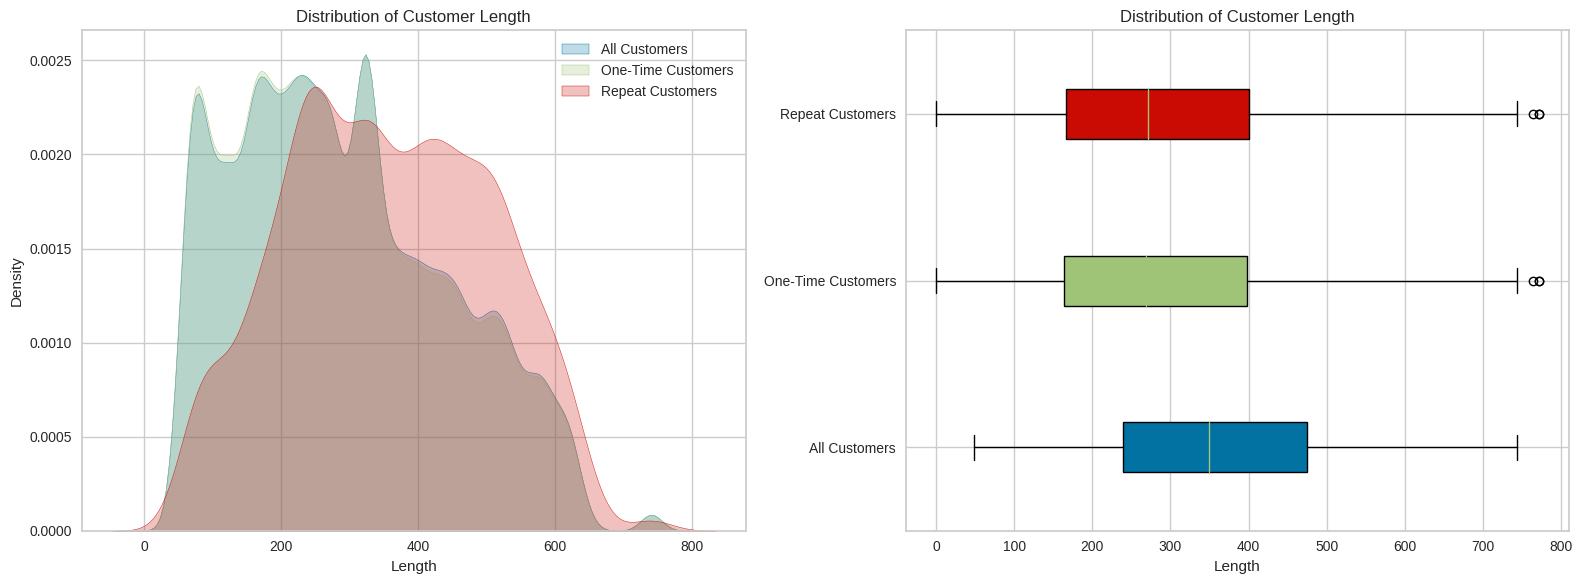

In [75]:
#
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#
create_density_chart(
    dfs,
    'Length',
    labels,
    'Distribution of Customer Length',
     ax=axes[0]
)

#
create_boxplot_chart(
    dfs,
    'Length',
    labels,
    'Distribution of Customer Length',
    ax=axes[1]
)

#
plt.tight_layout()


In [76]:
#
pd.concat([df['Length'].describe() for df in dfs], axis=1, keys=labels).astype(int).T


count  mean  std  min  25%  50%  75%  max
All Customers       96093   290  153    0  166  272  400  772
One-Time Customers  93097   288  153    0  164  269  398  772
Repeat Customers     2996   355  148   49  239  350  474  744

**Interpretation of Length Distribution**

* The majority of customers have a relatively short length, indicating a significant portion of one-time or infrequent buyers.
* The median length for all customers and one-time customers is similar, around 270 days, while repeat customers exhibit a notably higher median length of 350 days.
* The longer length for repeat customers suggests that they tend to maintain a relationship with the business for a more extended period.
* The presence of outliers with very high length values indicates a small group of customers who have been associated with the business for a considerably long time.


#### **Recency**

The distribution of customer recency, or how recently customers made their last purchase, will be visualized using density plots and box plots. This will help understand how recently customers have interacted with the business, identify any patterns in purchase recency, and compare the recency distribution across different customer segments.


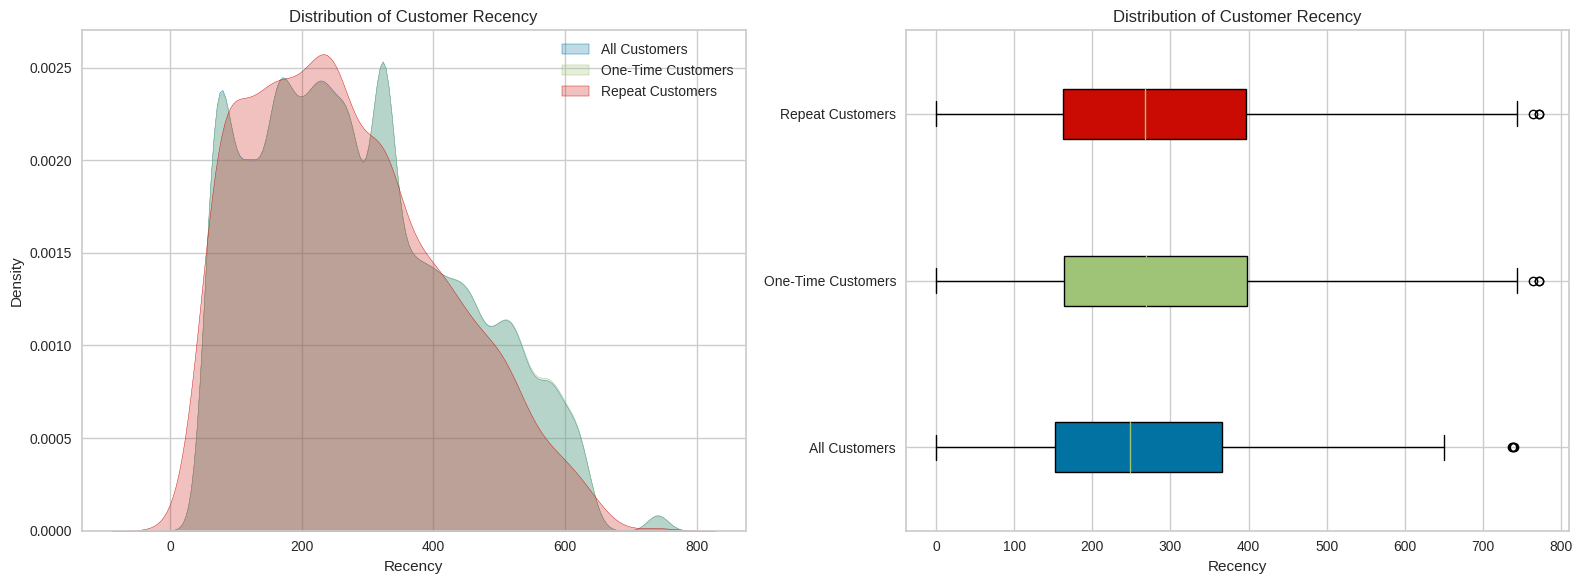

In [77]:
#
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#
create_density_chart(
    dfs,
    'Recency',
    labels,
    'Distribution of Customer Recency',
    ax=axes[0]
)

#
create_boxplot_chart(
    dfs,
    'Recency',
    labels,
    'Distribution of Customer Recency',
    ax=axes[1]
)

#
plt.tight_layout()


In [78]:
#
pd.concat([df['Recency'].describe() for df in dfs], axis=1, keys=labels).astype(int).T


count  mean  std  min  25%  50%  75%  max
All Customers       96093   287  153    0  163  268  397  772
One-Time Customers  93097   288  153    0  164  269  398  772
Repeat Customers     2996   268  145    0  152  248  366  740

**Interpretation of Recency Distribution**

* The recency distribution for all customers and one-time customers is very similar, with a median recency of around 268 days.
* Repeat customers, however, show a lower median recency of 248 days, suggesting they tend to make purchases more recently compared to other groups.
* The presence of outliers with high recency values indicates a segment of customers who haven't made a purchase in a long time, potentially representing churned or inactive customers.


#### **Frequency**

The distribution of customer frequency, or how often customers make purchases, will be visualized using density plots and box plots. This will reveal the typical purchase frequency among customers, identify any variations in frequency across customer segments, and highlight any outliers.


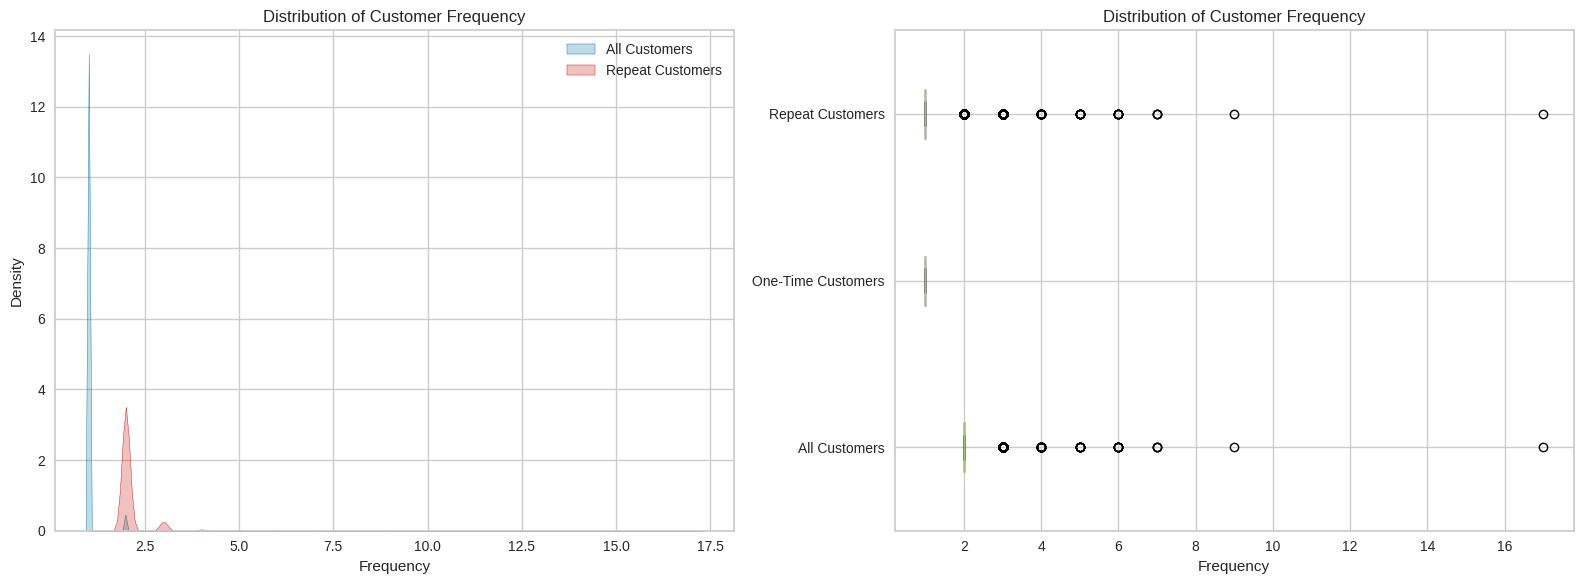

In [79]:
#
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#
create_density_chart(
    dfs,
    'Frequency',
    labels,
    'Distribution of Customer Frequency',
    ax=axes[0]
)

#
create_boxplot_chart(
    dfs,
    'Frequency',
    labels,
    'Distribution of Customer Frequency',
    ax=axes[1]
)

#
plt.tight_layout()


In [80]:
#
pd.concat([df['Frequency'].describe() for df in dfs], axis=1, keys=labels).round(2).T


count  mean   std  min  25%  50%  75%   max
All Customers       96093.0  1.03  0.21  1.0  1.0  1.0  1.0  17.0
One-Time Customers  93097.0  1.00  0.00  1.0  1.0  1.0  1.0   1.0
Repeat Customers     2996.0  2.12  0.52  2.0  2.0  2.0  2.0  17.0

**Interpretation of Frequency Distribution**

* As expected, the majority of customers in the 'All Customers' and 'One-Time Customers' groups have a frequency of 1, indicating they've made only one purchase.
* The 'Repeat Customers' group shows a higher median frequency of 2, confirming that these customers make multiple purchases.
* The presence of outliers with high-frequency values suggests a small but valuable segment of customers who make frequent purchases.


#### **Monetary**

The distribution of customer monetary value, or the total amount spent by customers, will be visualized using density plots and box plots. This will provide insights into the spending behavior of customers, identify any significant variations in spending across customer segments, and highlight any high-value customers.


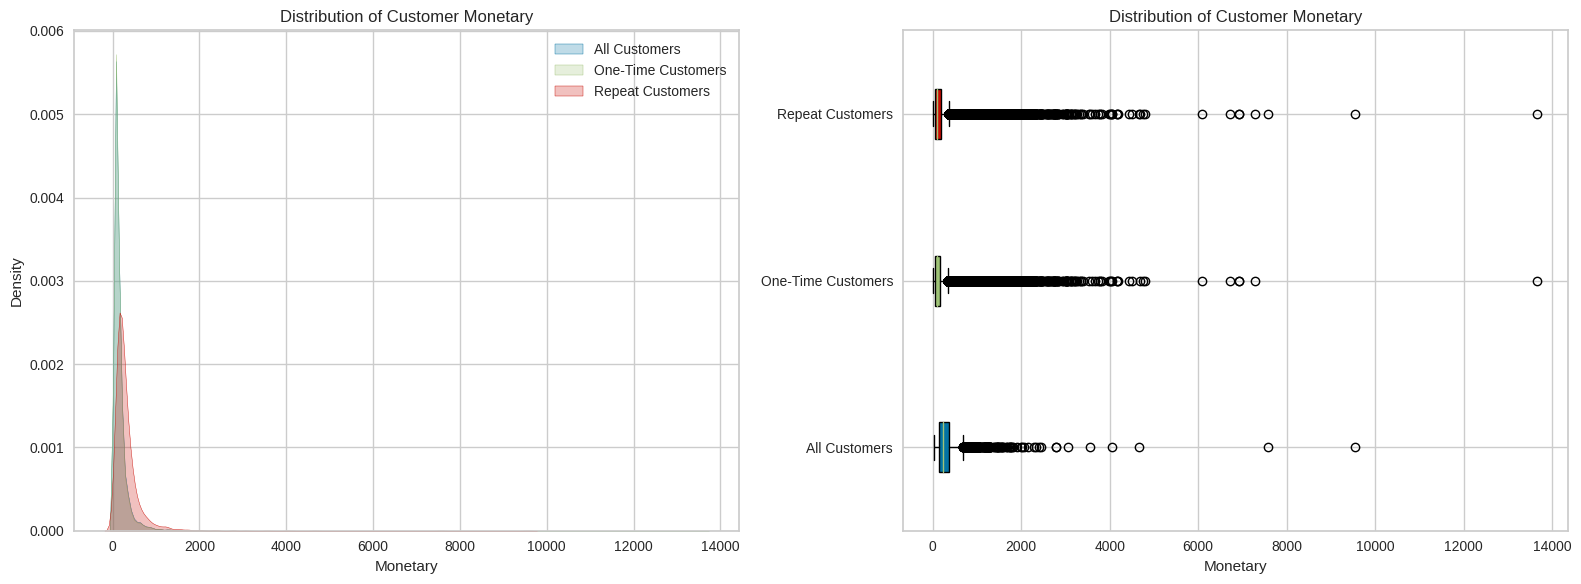

In [81]:
#
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#
create_density_chart(
    dfs,
    'Monetary',
    labels,
    'Distribution of Customer Monetary',
    ax=axes[0]
)

#
create_boxplot_chart(
    dfs,
    'Monetary',
    labels,
    'Distribution of Customer Monetary',
    ax=axes[1]
)

#
plt.tight_layout()


In [82]:
#
pd.concat([df['Monetary'].describe() for df in dfs], axis=1, keys=labels).astype(int).T


count  mean  std  min  25%  50%  75%    max
All Customers       96093   166  231    9   63  108  183  13664
One-Time Customers  93097   161  223    9   62  105  177  13664
Repeat Customers     2996   315  369   34  146  225  362   9553

**Interpretation of Monetary Value Distribution**

* The distribution of monetary value is right-skewed, indicating that most customers have lower spending amounts, while a smaller group of customers contributes significantly to the overall revenue.
* Repeat customers exhibit a higher median monetary value compared to all customers and one-time customers, suggesting they tend to spend more over time.
* The presence of outliers with very high monetary values highlights a small but crucial segment of high-value customers who make substantial purchases.



#### **Summary**

**Observations from LRFM Analysis**

* The majority of customers are one-time buyers, highlighting the need for strategies to encourage repeat purchases.
* Repeat customers tend to have longer relationships with the business, make more recent purchases, and contribute more in terms of monetary value.
* The presence of outliers in length, recency, and monetary value distributions suggests the existence of distinct customer segments with varying levels of engagement and spending behavior.

These insights from the LRFM analysis can be leveraged to develop targeted marketing campaigns, loyalty programs, and customer retention initiatives to enhance customer lifetime value and overall business performance.

### **4.1.3. Active Customers**

In [83]:
#
print(f'Number of All Customers: {ac_df["customer_unique_id"].nunique()} ({round(ac_df["customer_unique_id"].nunique() / customers_df["customer_unique_id"].nunique() * 100, 2)}%)')
print(f'Number of One-Time Customers: {otc_df["customer_unique_id"].nunique()} ({round(otc_df["customer_unique_id"].nunique() / customers_df["customer_unique_id"].nunique() * 100, 2)}%)')
print(f'Number of Repeat Customers: {rc_df["customer_unique_id"].nunique()} ({round(rc_df["customer_unique_id"].nunique() / customers_df["customer_unique_id"].nunique() * 100, 2)}%)')

Number of All Customers: 96093 (100.0%)
Number of One-Time Customers: 93097 (96.88%)
Number of Repeat Customers: 2996 (3.12%)


**A waterfall chart** is a data visualization tool used to display how an initial value is incrementally affected by a series of positive and negative values, leading to a final value. It is particularly useful for understanding how various factors contribute to changes in a metric over time or through a process.

**Key Features**:  
**Initial Value**: Represents the starting point or baseline.  
**Intermediate Steps**: Bars or columns show the incremental positive or negative changes that affect the initial value.  
**Final Value**: The end result after all incremental changes have been accounted for.

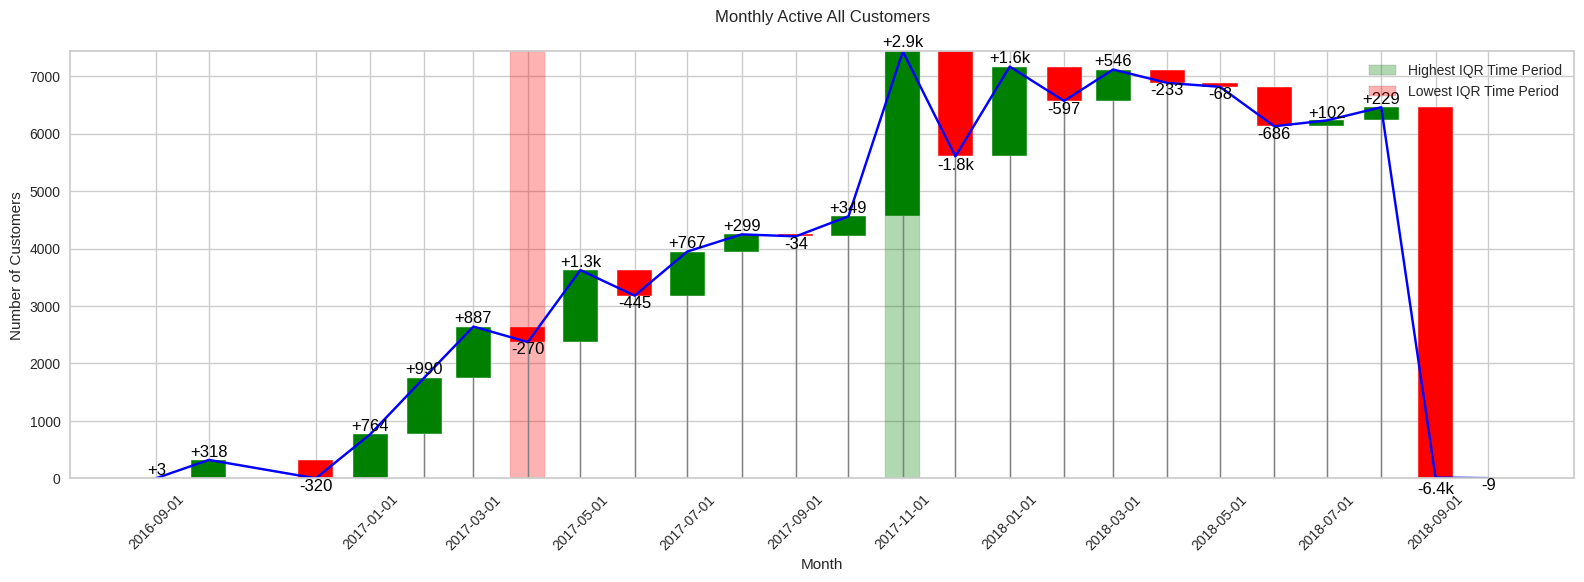

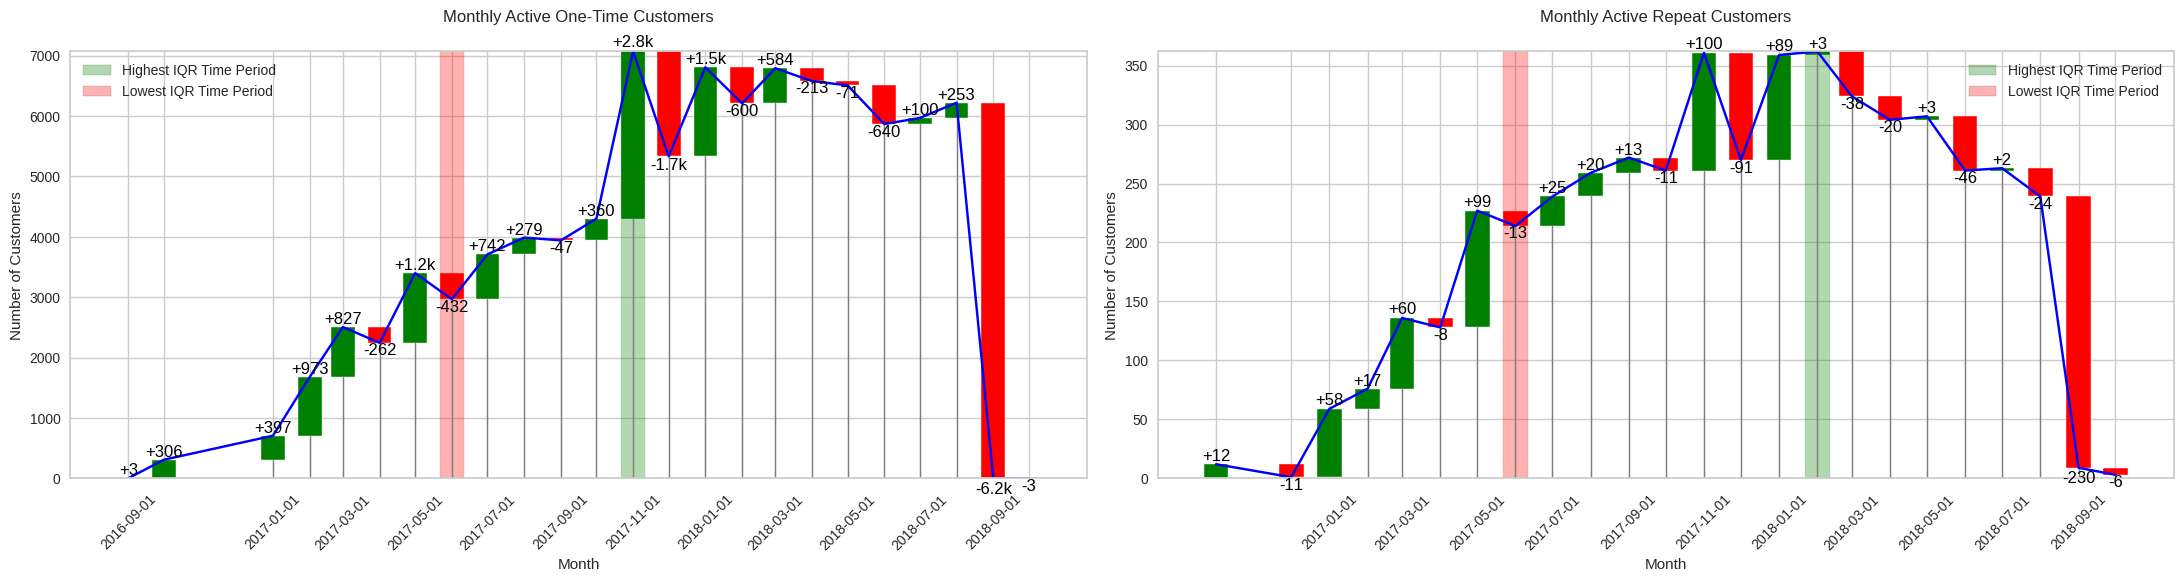

In [84]:
#
create_waterfall_chart(
    ac_df.groupby(
        ac_df['order_purchase_timestamp'].dt.to_period('M')
    )['customer_unique_id'].nunique(),
    title='Monthly Active All Customers',
    xlabel='Month',
    ylabel='Number of Customers'
)

#
plt.tight_layout()

#
fig, axes = plt.subplots(1, 2, figsize=(22, 6))

#
create_waterfall_chart(
    otc_df.groupby(
        otc_df['order_purchase_timestamp'].dt.to_period('M')
    )['customer_unique_id'].nunique(),
    title='Monthly Active One-Time Customers',
    xlabel='Month',
    ylabel='Number of Customers',
    ax=axes[0]
)

#
create_waterfall_chart(
    rc_df.groupby(
        rc_df['order_purchase_timestamp'].dt.to_period('M')
    )['customer_unique_id'].nunique(),
    title='Monthly Active Repeat Customers',
    xlabel='Month',
    ylabel='Number of Customers',
    ax=axes[1]
)

#
plt.tight_layout()


- From the waterfall chart above, for all customer categories (All customers, One-Time, and Repeat), the Monthly Active Users (MAU) showed the highest increase in November 2017.

- Overall, the MAU curves for One-Time purchases and Repeat purchases appear similar to the curve for all customers. This suggests that the distribution of data captures similar MAU patterns across these categories.

- Repeat purchases peaked in January 2018 and then consistently declined throughout the year 2018.

In [85]:
print(f'Average monthly active all customers: {ac_df.groupby(ac_df["order_purchase_timestamp"].dt.to_period("M"))["customer_unique_id"].nunique().mean().astype(int)}')
print(f'Average monthly active one-time customers: {otc_df.groupby(otc_df["order_purchase_timestamp"].dt.to_period("M"))["customer_unique_id"].nunique().mean().astype(int)}')
print(f'Average monthly active repeat customers: {rc_df.groupby(rc_df["order_purchase_timestamp"].dt.to_period("M"))["customer_unique_id"].nunique().mean().astype(int)}')

Average monthly active all customers: 3921
Average monthly active one-time customers: 3879
Average monthly active repeat customers: 206


### **4.1.4. Location**

We aim to visualize the distribution of data by location using a bar chart. This will help us identify the variations and trends across different locations, allowing for a clearer comparison of customer activity and engagement geographically.

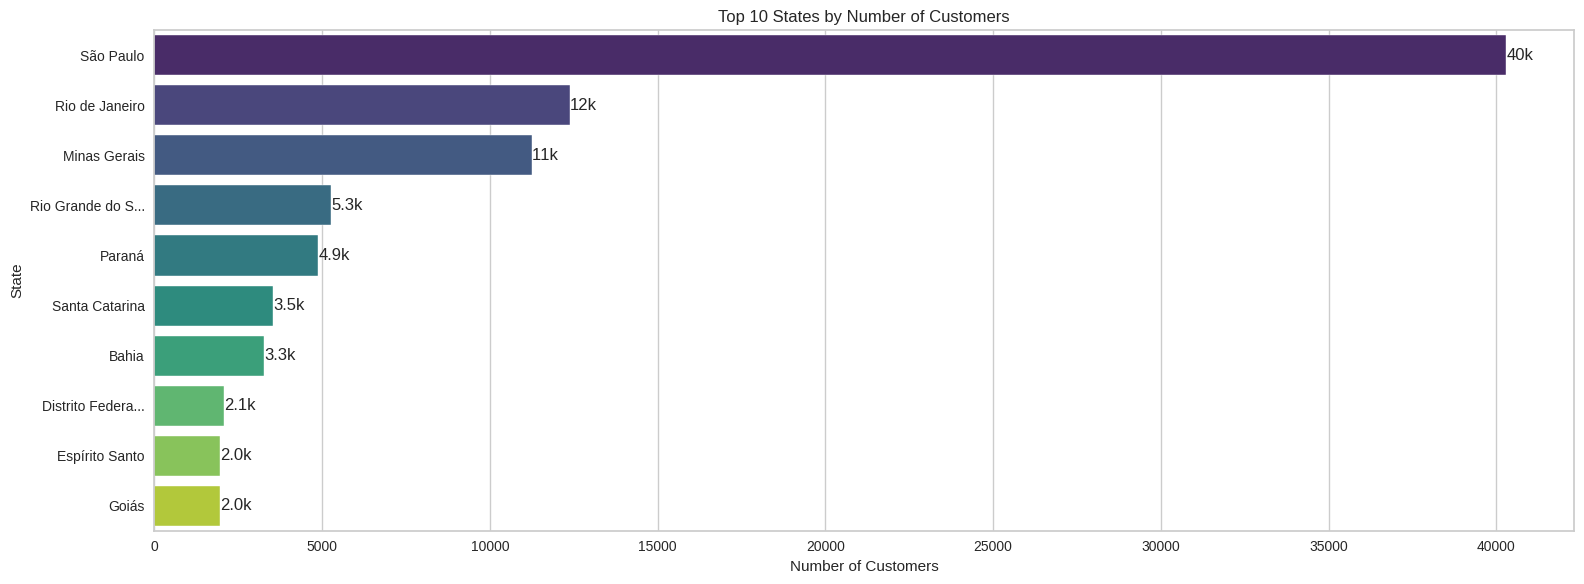

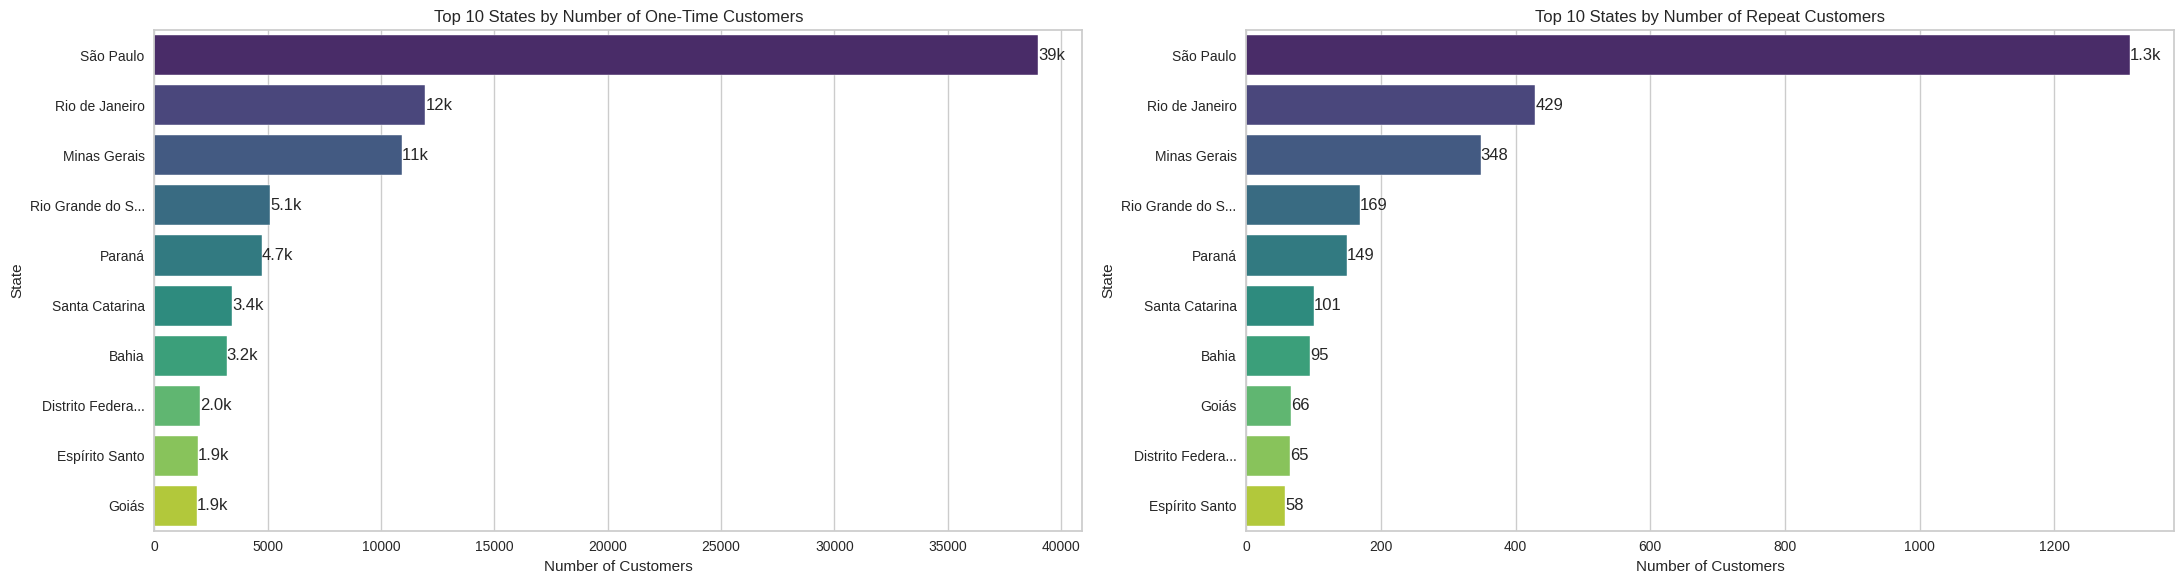

In [86]:
#
create_bar_chart(
    ac_df.groupby(
        ac_df['customer_state']
    )['customer_unique_id'].nunique(),
    'y',
    'Top 10 States by Number of Customers',
    'Number of Customers',
    'State',
    limit=10,
)

#
plt.tight_layout()

#
fig, axes = plt.subplots(1, 2, figsize=(22, 6))

#
create_bar_chart(
    otc_df.groupby(
        otc_df['customer_state']
    )['customer_unique_id'].nunique(),
    'y',
    'Top 10 States by Number of One-Time Customers',
    'Number of Customers',
    'State',
    limit=10,
    ax=axes[0]
)

#
create_bar_chart(
    rc_df.groupby(
        rc_df['customer_state']
    )['customer_unique_id'].nunique(),
    'y',
    'Top 10 States by Number of Repeat Customers',
    'Number of Customers',
    'State',
    limit=10,
    ax=axes[1]
)

#
plt.tight_layout()



- Based on the bar chart showing the top states by number of customers, *São Paulo (SP) dominates all others around 41.6%*, both in terms of overall customer numbers and purchases (one-time and repeat). This may indicate that São Paulo has a higher economic level, leading to a larger customer base.

- Other states follow a similar ranking pattern, except for one-time purchases, where Distrito Federal (DF) is more dominant compared to repeat customers.

- Rio de Janeiro and Minas Gerais are the top 2 and 3 states, respectively, with one-time purchases comprising approximately 93% of their total purchases, overshadowing repeat purchases.

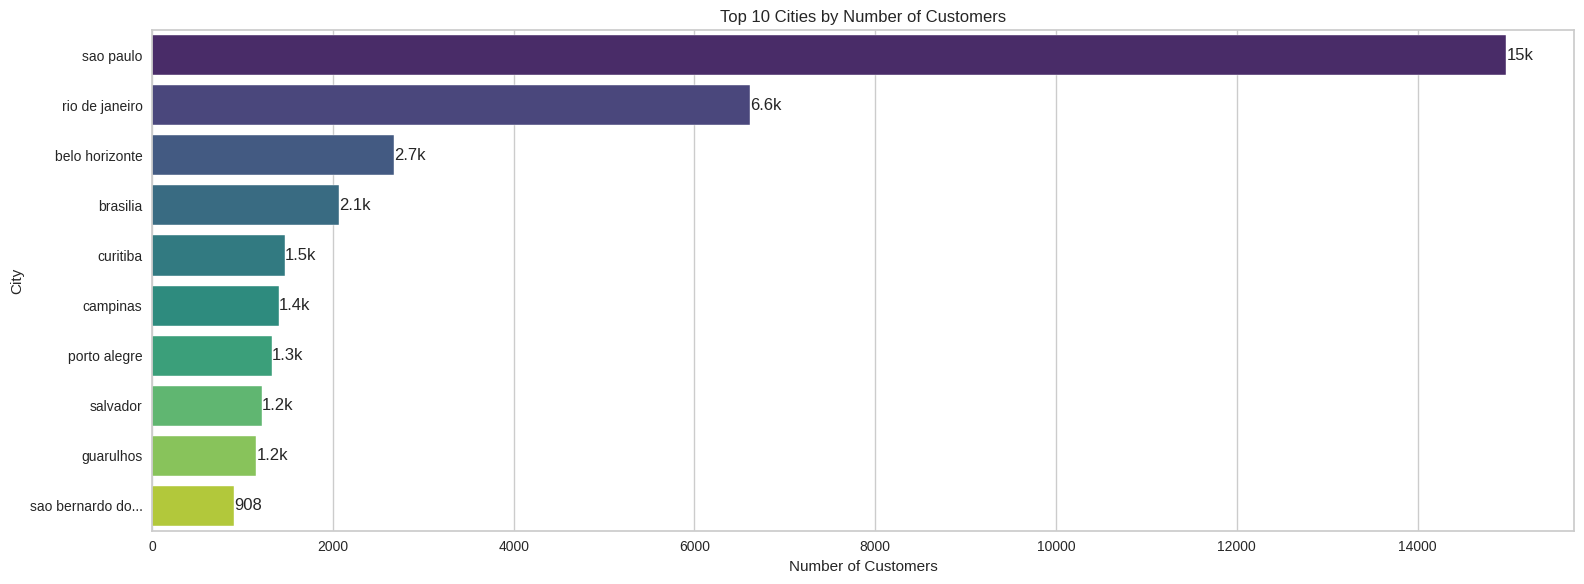

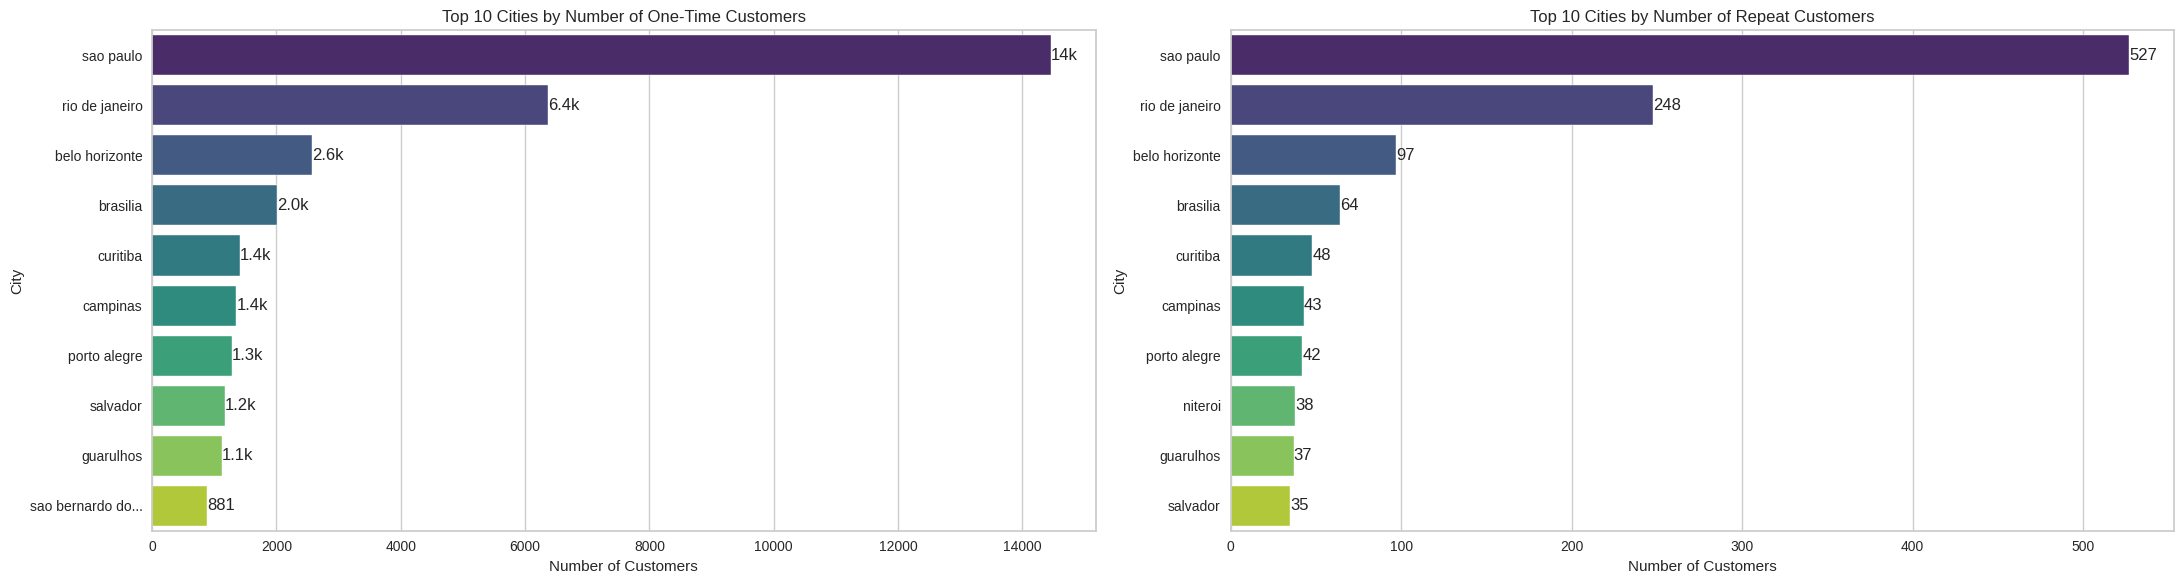

In [87]:
#
create_bar_chart(
    ac_df.groupby(
        ac_df['customer_city']
    )['customer_unique_id'].nunique(),
    'y',
    'Top 10 Cities by Number of Customers',
    'Number of Customers',
    'City',
    limit=10,
)

#
plt.tight_layout()

#
fig, axes = plt.subplots(1, 2, figsize=(22, 6))

#
create_bar_chart(
    otc_df.groupby(
        otc_df['customer_city']
    )['customer_unique_id'].nunique(),
    'y',
    'Top 10 Cities by Number of One-Time Customers',
    'Number of Customers',
    'City',
    limit=10,
    ax=axes[0]
)

#
create_bar_chart(
    rc_df.groupby(
        rc_df['customer_city']
        )['customer_unique_id'].nunique(),
    'y',
    'Top 10 Cities by Number of Repeat Customers',
    'Number of Customers',
    'City',
    limit=10,
    ax=axes[1]
)

#
plt.tight_layout()



- Among the top 10 cities by the number of customers, São Paulo consistently ranks first for both all customers and one-time purchase customers, with approximately 15,000 customers, accounting for about 15.6%.

- For repeat customers, Salvador appears in the top 10 but has only 35 customers, suggesting that cities ranked 11th and below will have even fewer customers. This stark contrast highlights that one-time purchase customers are significantly more prevalent than repeat purchase customers.

## **4.2. Orders**

In [88]:
#
ac_orders_df = ac_df.merge(
    order_items_df, on='order_id', how='left').merge(
    products_df, on='product_id', how='left'
)

#
otc_orders_df = otc_df.merge(
    order_items_df, on='order_id', how='left').merge(
    products_df, on='product_id', how='left'
)

#
rc_orders_df = rc_df.merge(
    order_items_df, on='order_id', how='left').merge(
    products_df, on='product_id', how='left'
)


We want to analyze the total number of orders to gain insights into overall customer purchasing behavior. This will help us understand trends and volumes across different periods or categories, providing a clearer picture of order patterns.

In [89]:
print(f'Number of All Customers Sales: {ac_orders_df["order_id"].nunique()}')
print(f'Number of One-Time Customers Sales: {otc_orders_df["order_id"].nunique()}')
print(f'Number of Repeat Customers Sales: {rc_orders_df["order_id"].nunique()}')

Number of All Customers Sales: 99437
Number of One-Time Customers Sales: 93097
Number of Repeat Customers Sales: 6340


In [90]:
print(f"All customers total revenue: R${(ac_orders_df['price'].sum() * 0.1).astype(int)}")
print(f"One-time customers total revenue: R${(otc_orders_df['price'].sum() * 0.1).astype(int)}")
print(f"Repeat customers total revenue: R${(rc_orders_df['price'].sum() * 0.1).astype(int)}")

All customers total revenue: R$1420911
One-time customers total revenue: R$1339027
Repeat customers total revenue: R$81884


In [91]:
print(f"All customers average order value: R${(ac_orders_df['price'].sum() * 0.1 / ac_orders_df['order_id'].nunique()).astype(int)}")
print(f"One-time customers average order value: R${(otc_orders_df['price'].sum() * 0.1 / otc_orders_df['order_id'].nunique()).astype(int)}")
print(f"Repeat customers average order value: R${(rc_orders_df['price'].sum() * 0.1 / rc_orders_df['order_id'].nunique()).astype(int)}")

All customers average order value: R$14
One-time customers average order value: R$14
Repeat customers average order value: R$12


In [92]:
print(f"All customers average revenue per month: R${(ac_orders_df['price'].sum() * 0.1 / ac_orders_df['order_purchase_timestamp'].dt.to_period('M').nunique()).astype(int)}")
print(f"One-time customers average revenue per month: R${(otc_orders_df['price'].sum() * 0.1 / otc_orders_df['order_purchase_timestamp'].dt.to_period('M').nunique()).astype(int)}")
print(f"Repeat customers average revenue per month: R${(rc_orders_df['price'].sum() * 0.1 / rc_orders_df['order_purchase_timestamp'].dt.to_period('M').nunique()).astype(int)}")

All customers average revenue per month: R$56836
One-time customers average revenue per month: R$55792
Repeat customers average revenue per month: R$3411


- We plan to create a waterfall chart to visualize the total sales. This chart will help us track the incremental changes in sales over time or across different categories, highlighting how various factors contribute to the overall sales performance.

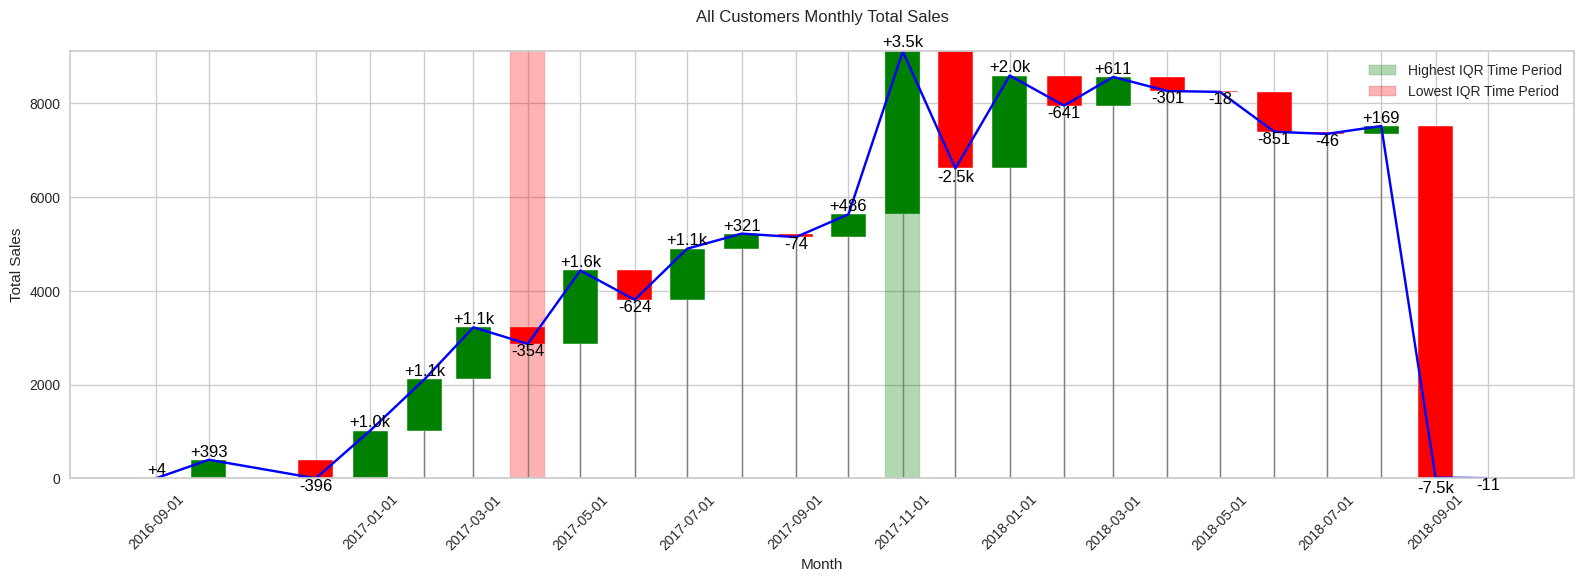

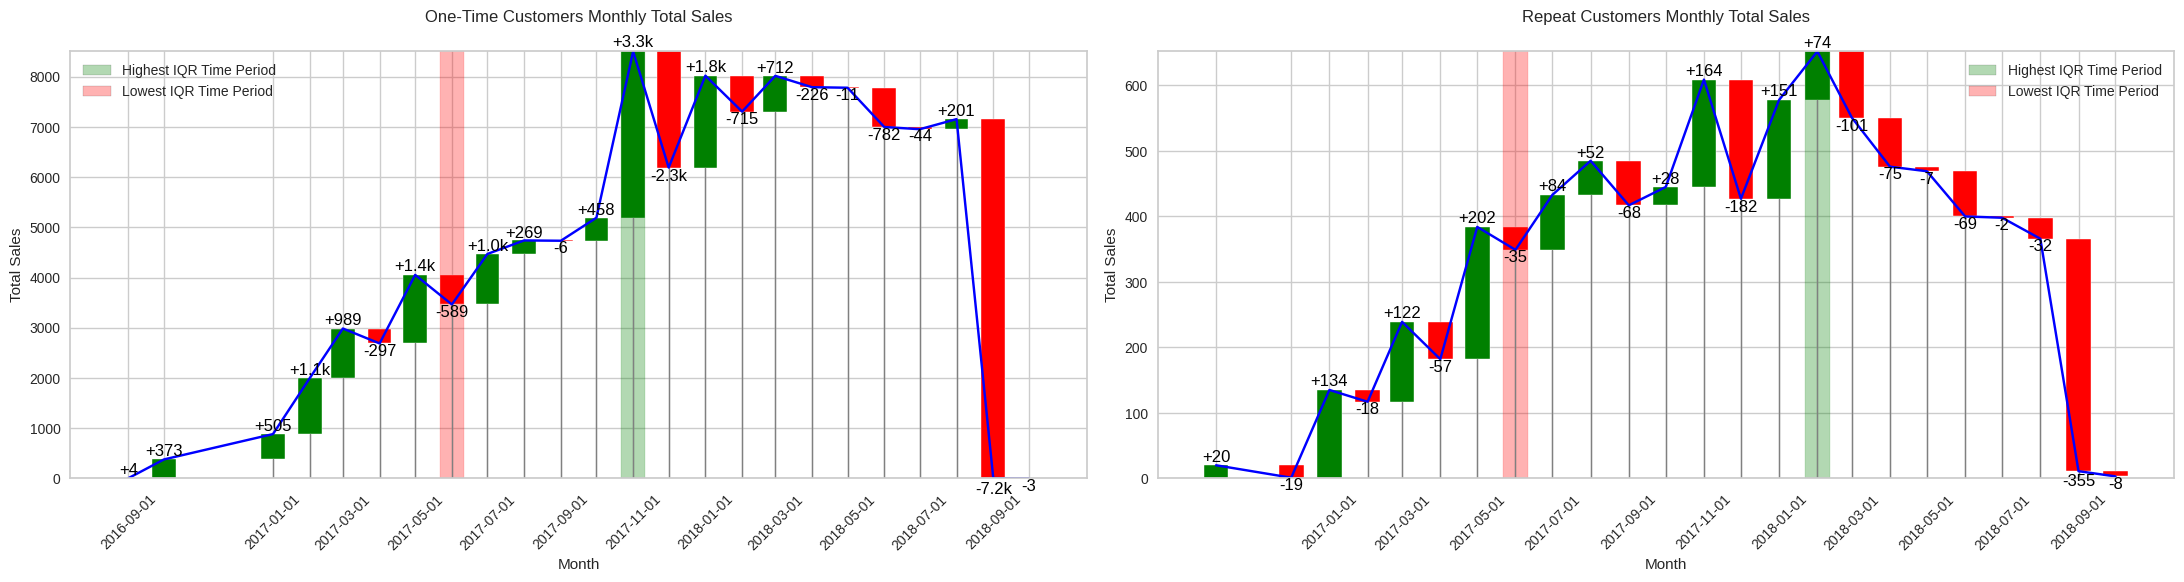

In [93]:
# Create the first waterfall chart for all customers (not in a subplot)
create_waterfall_chart(
    ac_orders_df.groupby(
        ac_orders_df['order_purchase_timestamp'].dt.to_period('M')
    ).size(),  # Count the number of orders per month
    title='All Customers Monthly Total Sales',
    xlabel='Month',
    ylabel='Total Sales',
)

plt.tight_layout()

# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(22, 6))

# Create the second waterfall chart for one-time customers in the first subplot
create_waterfall_chart(
    otc_orders_df.groupby(
        otc_orders_df['order_purchase_timestamp'].dt.to_period('M')
    ).size(),
    title='One-Time Customers Monthly Total Sales',
    xlabel='Month',
    ylabel='Total Sales',
    ax=axes[0]
)

# Create the third waterfall chart for repeat customers in the second subplot
create_waterfall_chart(
    rc_orders_df.groupby(
        rc_orders_df['order_purchase_timestamp'].dt.to_period('M')
    ).size(),
    title='Repeat Customers Monthly Total Sales',
    xlabel='Month',
    ylabel='Total Sales',
    ax=axes[1]
)

plt.tight_layout()
plt.show()


- From the waterfall chart above, it is evident that the three datasets have a relatively similar sales pattern, with the highest total sales occurring in November 2017 for both all customers and one-time purchase customers, while the peak for repeat purchase customers was in February 2018.
- Overall, from September 2016 to November 2017, there was a consistent increase in sales, despite occasional declines. After this period, there was a significant decrease in sales, either gradually or sharply.- **Text**

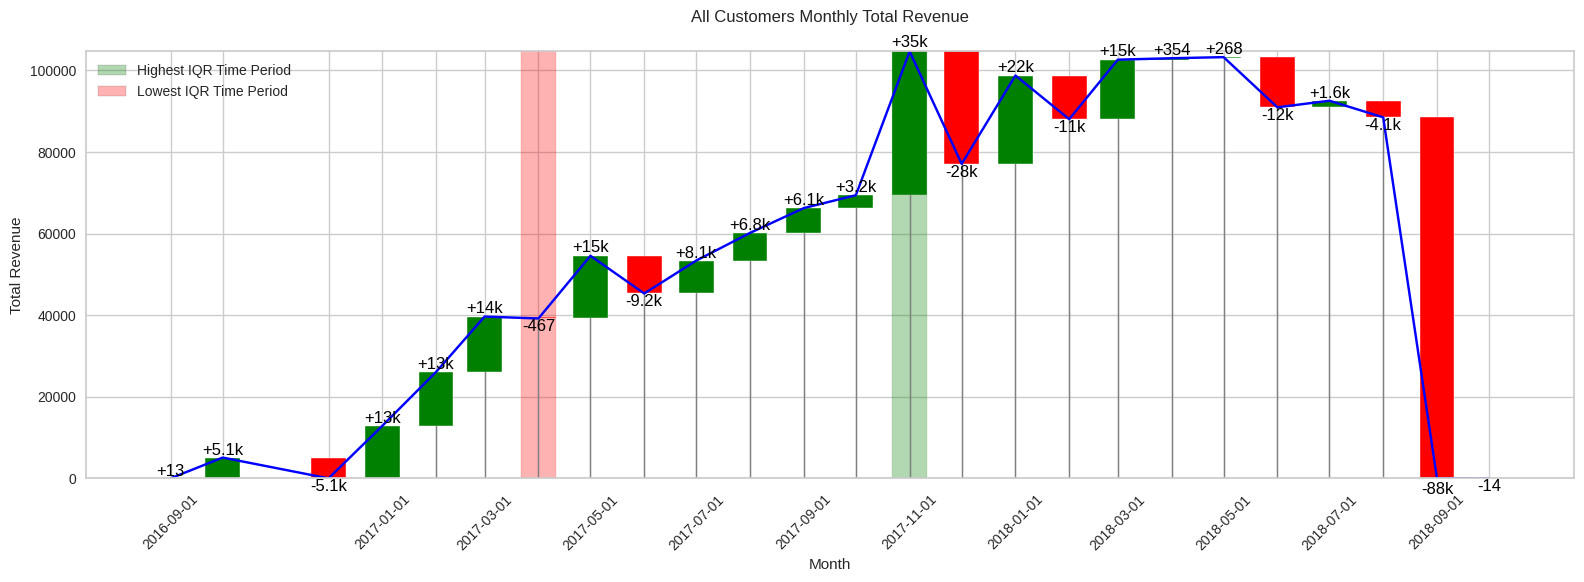

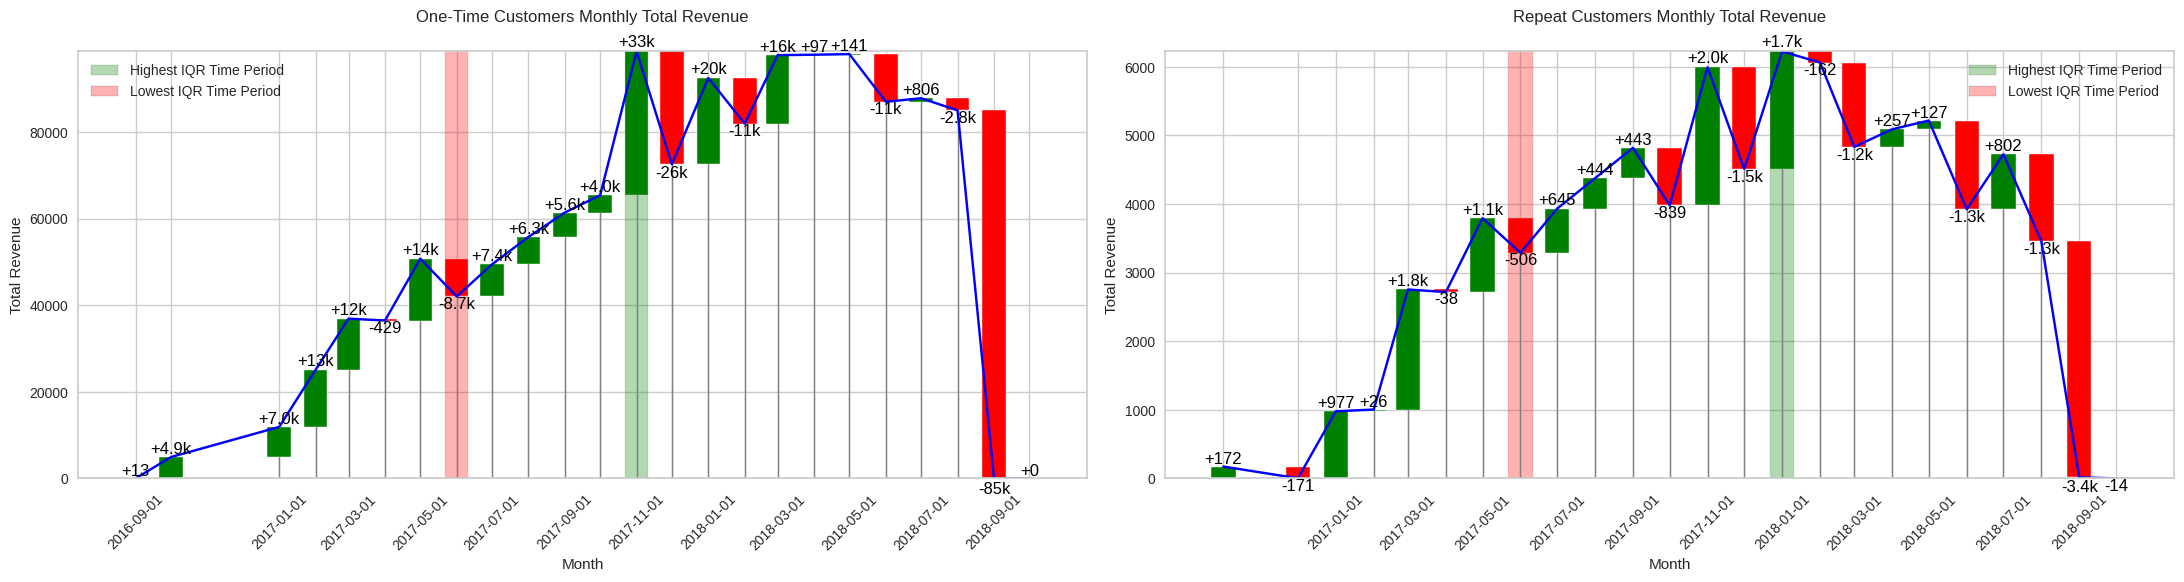

In [94]:
#
create_waterfall_chart(
    ac_orders_df.groupby(
        ac_orders_df['order_purchase_timestamp'].dt.to_period('M')
    )['price'].sum() * 0.1,
    title='All Customers Monthly Total Revenue',
    xlabel='Month',
    ylabel='Total Revenue',
)

#
plt.tight_layout()

#
fig, axes = plt.subplots(1, 2, figsize=(22, 6))

#
create_waterfall_chart(
    otc_orders_df.groupby(
        otc_orders_df['order_purchase_timestamp'].dt.to_period('M')
    )['price'].sum() * 0.1,
    title='One-Time Customers Monthly Total Revenue',
    xlabel='Month',
    ylabel='Total Revenue',
    ax=axes[0]
)

#
create_waterfall_chart(
    rc_orders_df.groupby(
        rc_orders_df['order_purchase_timestamp'].dt.to_period('M')
    )['price'].sum() * 0.1,
    title='Repeat Customers Monthly Total Revenue',
    xlabel='Month',
    ylabel='Total Revenue',
    ax=axes[1]
)

#
plt.tight_layout()



- The revenue pattern we get is in line with the total sales trend.

- Both customer categories exhibited significant revenue growth until late 2017, followed by a period of fluctuating sales and steep declines leading into 2018, with a marked reduction in revenue by September 2018. The charts indicate that while One-Time Customers generated higher overall revenue, both groups experienced similar downturns towards the end of the observed period.

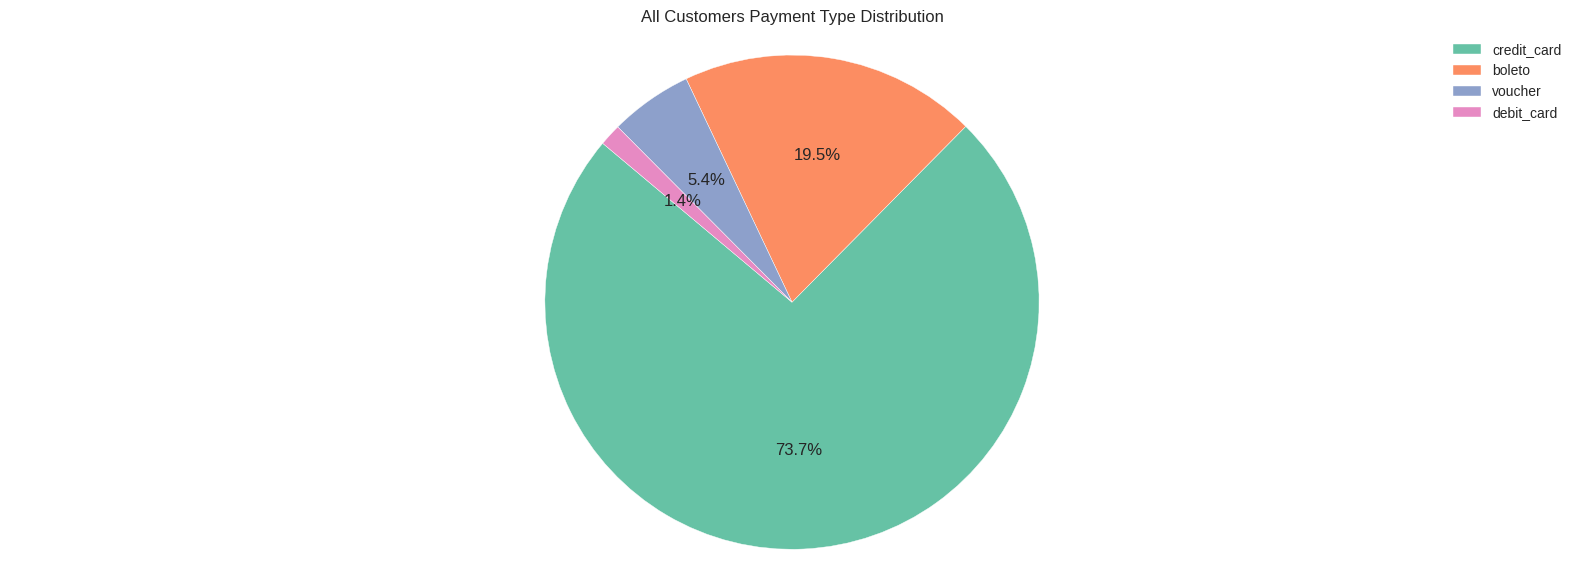

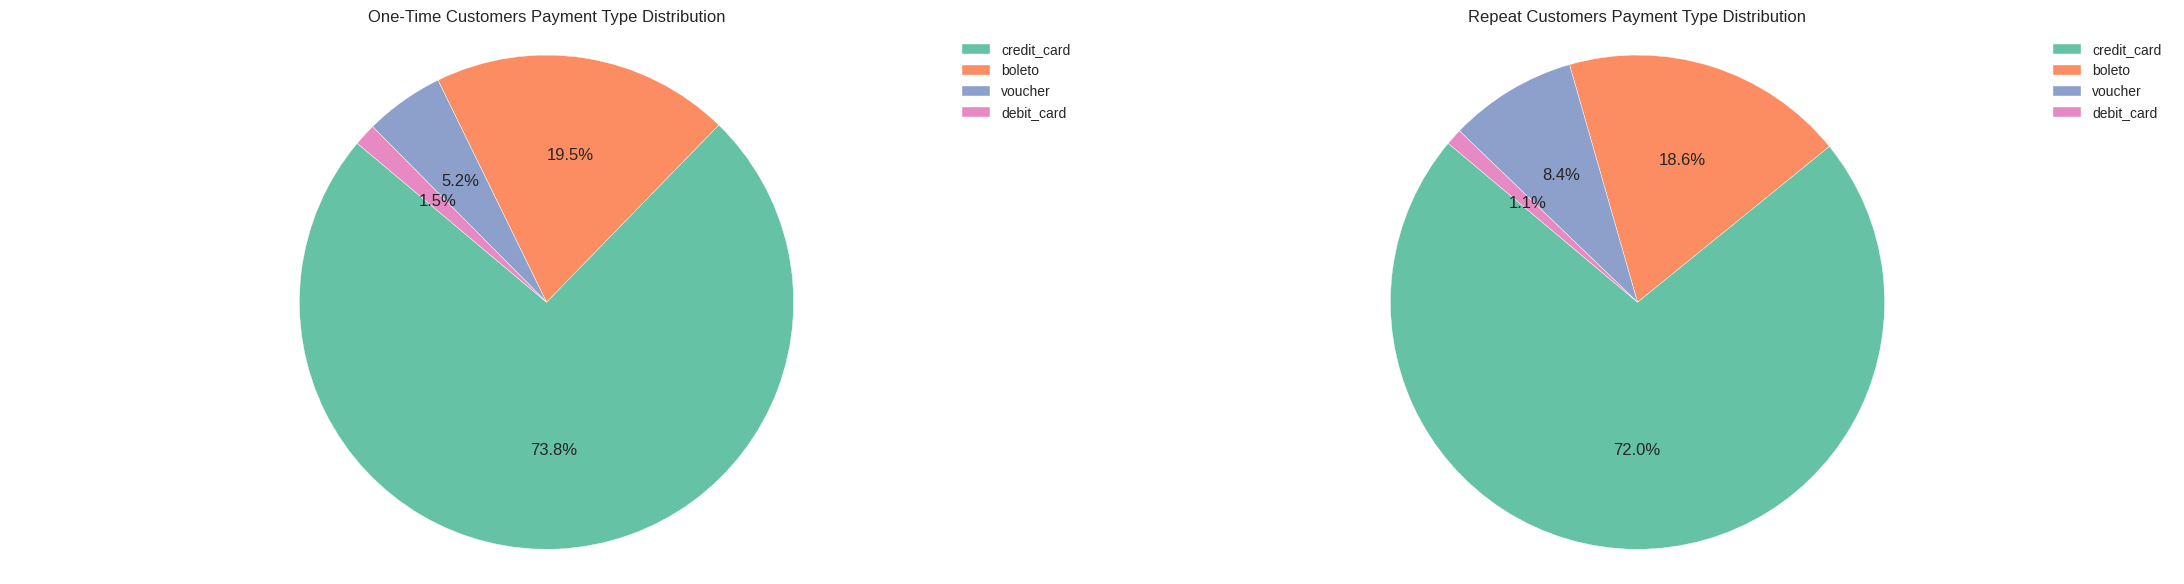

In [95]:
#
create_pie_chart(
    ac_orders_df['payment_type'].value_counts(),
    'All Customers Payment Type Distribution'
)

#
plt.tight_layout()

#
fig, axes = plt.subplots(1, 2, figsize=(22, 6))

#
create_pie_chart(
    otc_orders_df['payment_type'].value_counts(),
    'One-Time Customers Payment Type Distribution',
    ax=axes[0]
)

#
create_pie_chart(
    rc_orders_df['payment_type'].value_counts(),
    'Repeat Customers Payment Type Distribution',
    ax=axes[1]
)

#
plt.tight_layout()


From the pie chart above, for the three types of data subsets that we have, credit cards are the most frequently used payment type, followed by boleto, vouchers, debit cards with a proportion of more than 70%.

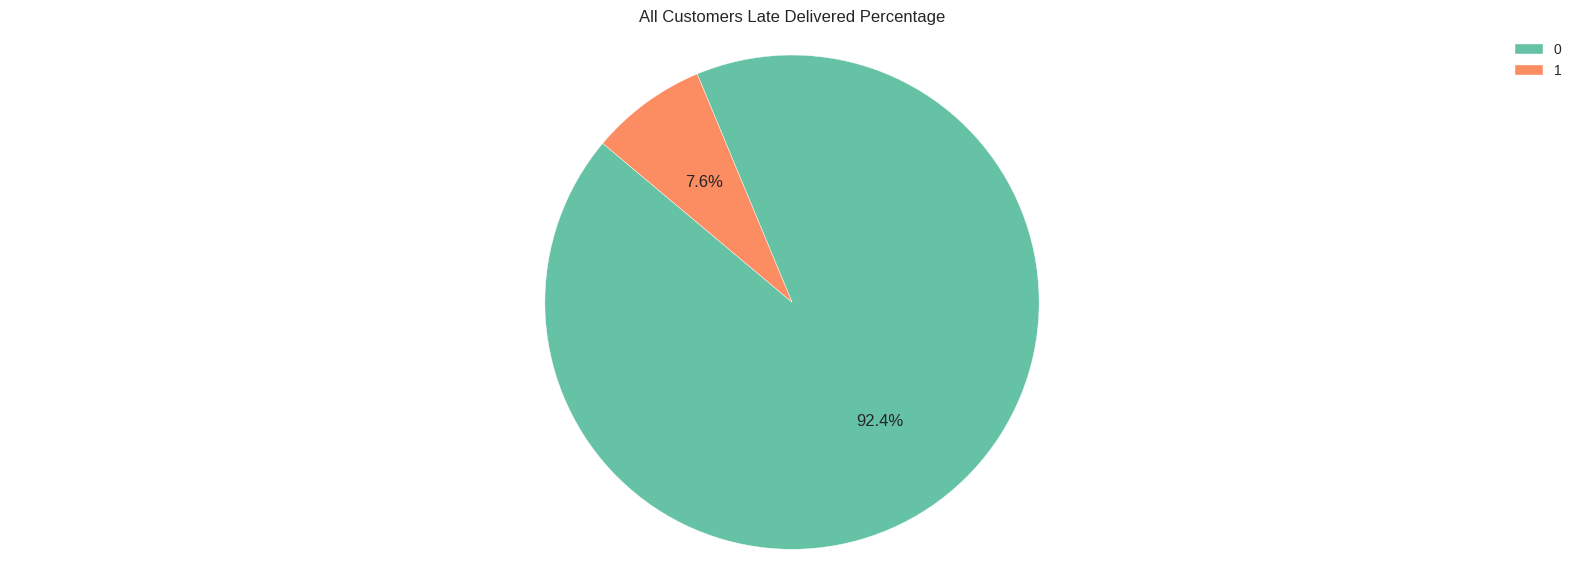

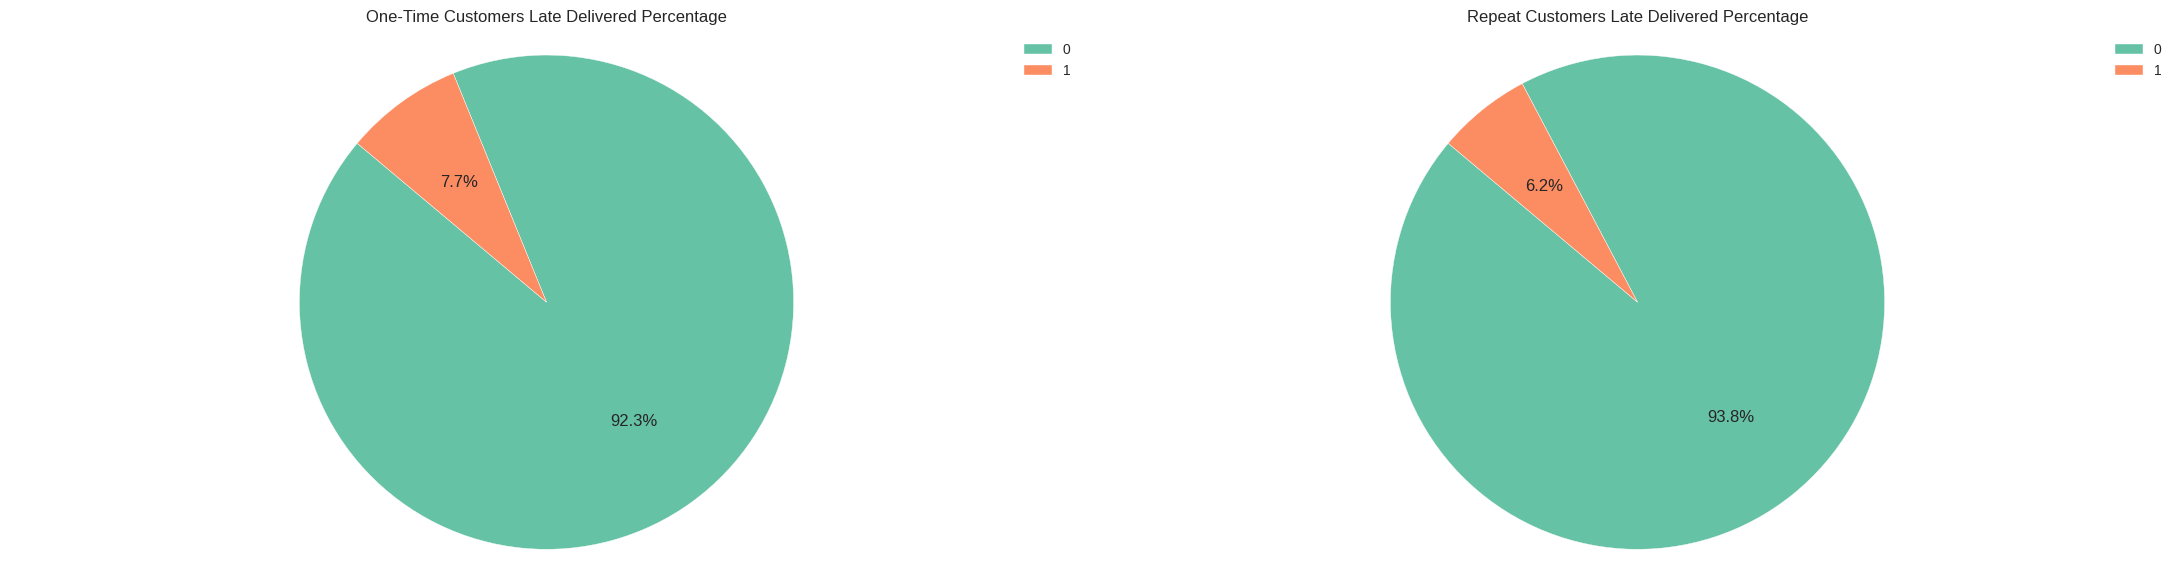

In [96]:
#
create_pie_chart(
    ac_orders_df['is_late_delivered'].value_counts(),
    'All Customers Late Delivered Percentage'
)

#
plt.tight_layout()

#
fig, axes = plt.subplots(1, 2, figsize=(22, 6))

#
create_pie_chart(
    otc_orders_df['is_late_delivered'].value_counts(),
    'One-Time Customers Late Delivered Percentage',
    ax=axes[0]
)

#
create_pie_chart(
    rc_orders_df['is_late_delivered'].value_counts(),
    'Repeat Customers Late Delivered Percentage',
    ax=axes[1]
)

#
plt.tight_layout()


The bar chart above shows a comparison of the number of on-time and late deliveries in a marketplace based on the analyzed data. With this data, companies can re-evaluate their delivery processes and look for solutions to reduce delays, such as improving logistics efficiency, working with more couriers, or improving estimated delivery times.

## **4.3. Products**

In this section, we will see the data distribution to analyze the total sales and revenue across different product categories. This will help us visualize how each category contributes to the overall sales, allowing us to identify the most and least impactful categories.

In [97]:
#
print(f'Number of all products: {products_df["product_id"].nunique()}')
print(f'Number of all categories: {products_df["product_category_name"].nunique()}')


Number of all products: 32951
Number of all categories: 74


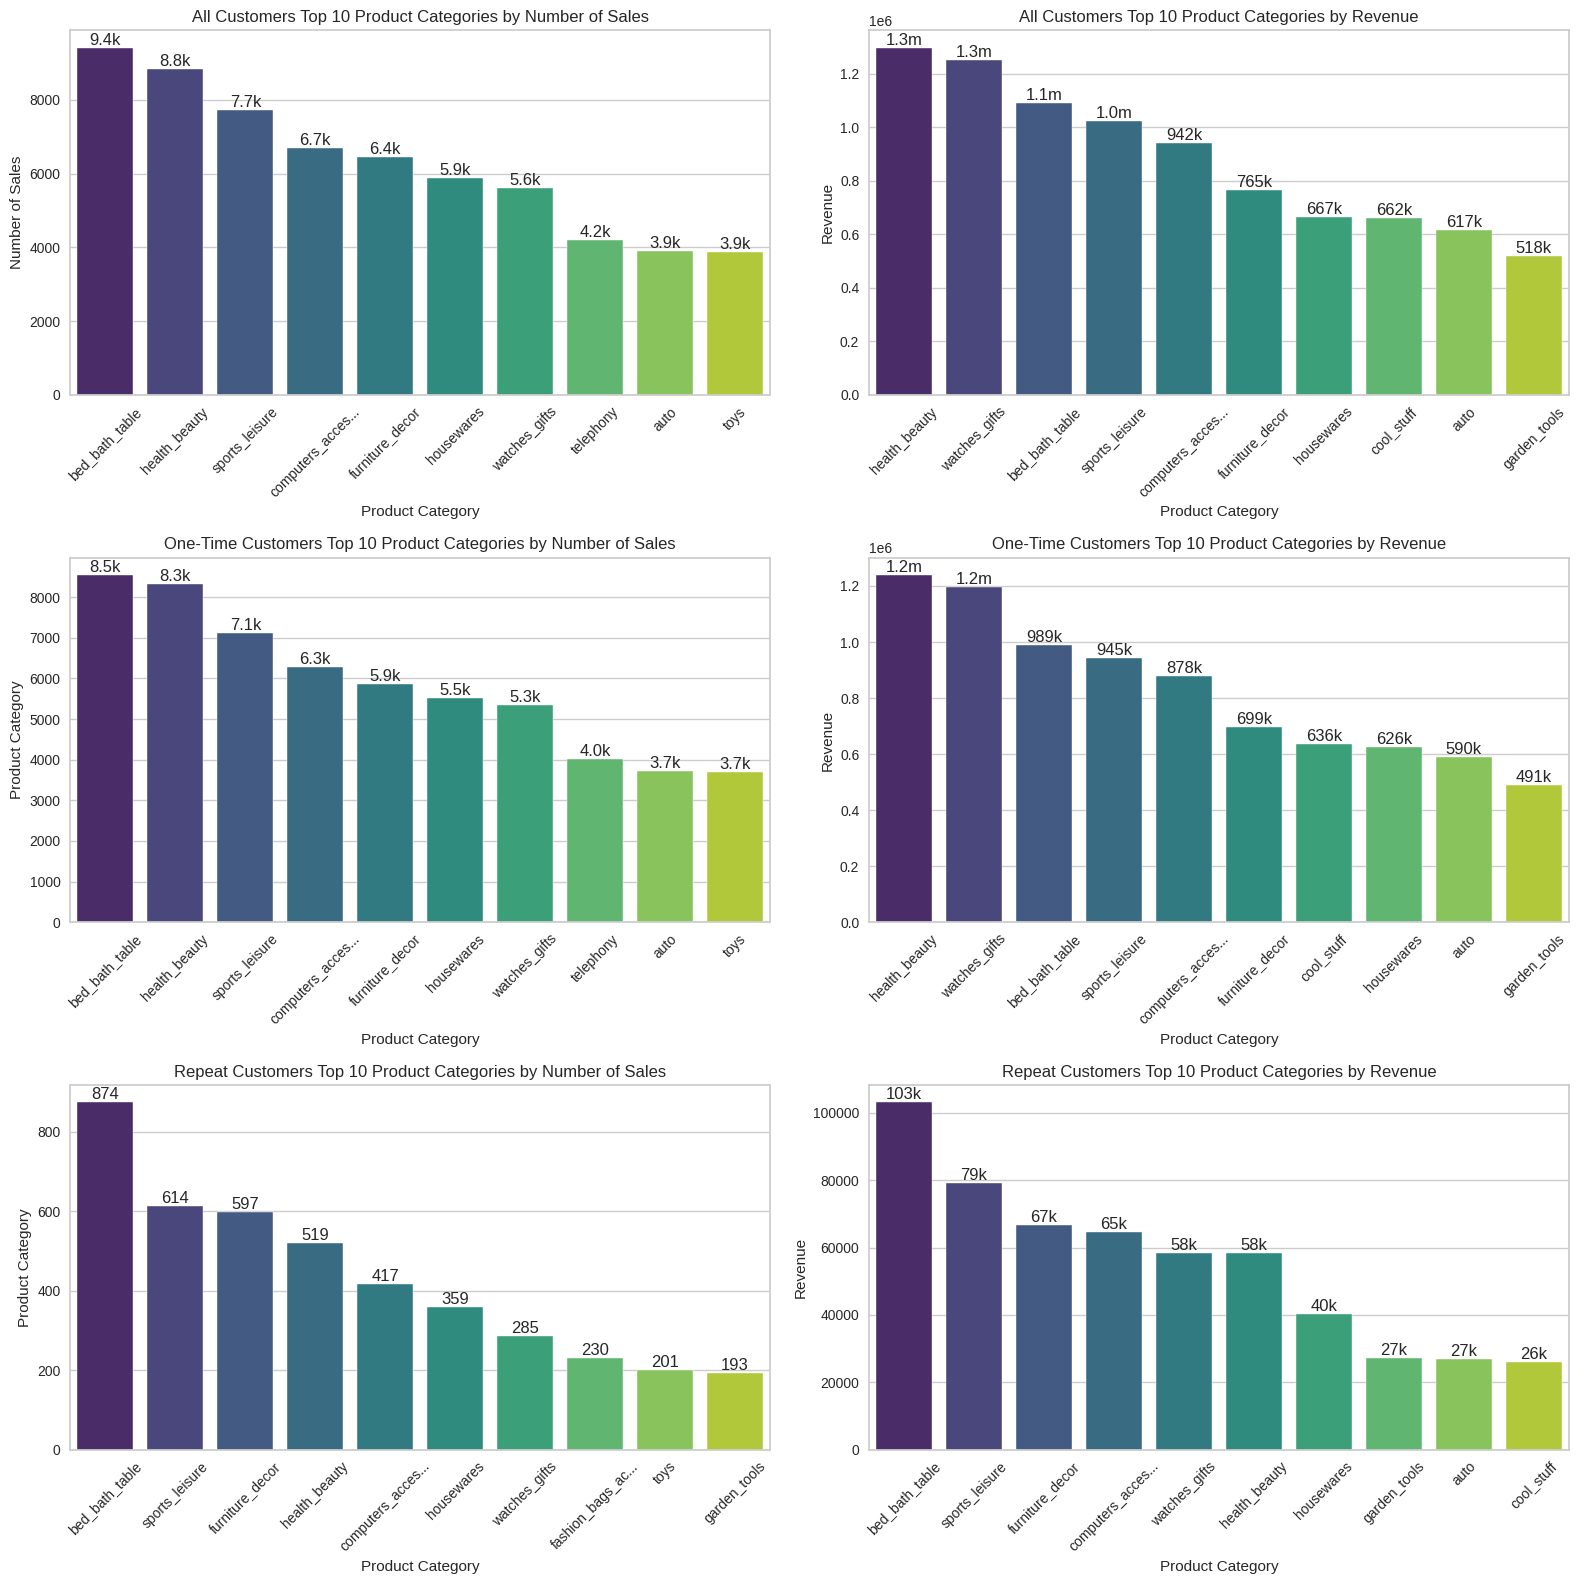

In [98]:
# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 16))

#
create_bar_chart(
    ac_orders_df.groupby('product_category_name')['order_id'].nunique(),
    'x',
    'All Customers Top 10 Product Categories by Number of Sales',
    'Product Category',
    'Number of Sales',
    limit=10,
    ax=axes[0, 0]
)

#
create_bar_chart(
    ac_orders_df.groupby('product_category_name')['price'].sum(),
    'x',
    'All Customers Top 10 Product Categories by Revenue',
    'Product Category',
    'Revenue',
    limit=10,
    ax=axes[0, 1]
)

#
create_bar_chart(
    otc_orders_df.groupby('product_category_name')['order_id'].nunique(),
    'x',
    'One-Time Customers Top 10 Product Categories by Number of Sales',
    'Product Category',
    'Product Category',
    limit=10,
    ax=axes[1, 0]
)

#
create_bar_chart(
    otc_orders_df.groupby('product_category_name')['price'].sum(),
    'x',
    'One-Time Customers Top 10 Product Categories by Revenue',
    'Product Category',
    'Revenue',
    limit=10,
    ax=axes[1, 1]
)

#
create_bar_chart(
    rc_orders_df.groupby('product_category_name')['order_id'].nunique(),
    'x',
    'Repeat Customers Top 10 Product Categories by Number of Sales',
    'Product Category',
    'Product Category',
    limit=10,
    ax=axes[2, 0]
)

#
create_bar_chart(
    rc_orders_df.groupby('product_category_name')['price'].sum(),
    'x',
    'Repeat Customers Top 10 Product Categories by Revenue',
    'Product Category',
    'Revenue',
    limit=10,
    ax=axes[2, 1]
)

plt.tight_layout()


- Since the data is dominated by one-time purchase customers, the order of the top products from the most sold is the same when compared to all customers, namely bed bath table, health beauty, and sports leisure, and so on with total sales of 8500++ and total revenue of 1.2M++.

- For repeat purchase customers, the top 3 product categories with the highest total sales are bed bath table, sports leisure, and furniture decor.

## **4.4. Sellers**

In [99]:
#
print(f'Number of all sellers: {sellers_df["seller_id"].nunique()}')

Number of all sellers: 3095


This visualization will depict the trend of monthly active sellers, showcasing how their numbers fluctuate over time. This can reveal insights into seller engagement and growth patterns on the platform.



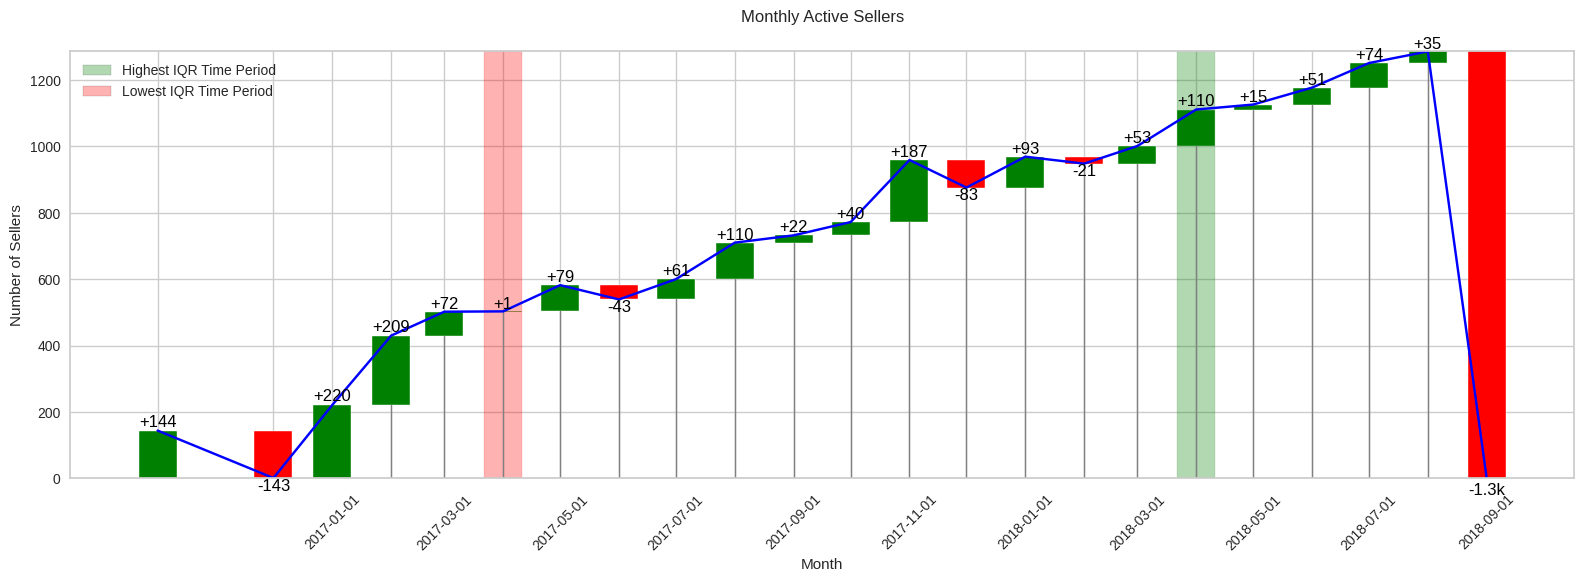

In [100]:
#
create_waterfall_chart(
    ac_orders_df.groupby(
        ac_orders_df['order_approved_at'].dt.to_period('M')
    )['seller_id'].nunique(),
    title='Monthly Active Sellers',
    xlabel='Month',
    ylabel='Number of Sellers'
)

#
plt.tight_layout()


The image displays the fluctuation in the number of active sellers on a platform (likely Olist based on previous context) over a period spanning from early 2017 to late 2018. The primary trend is one of growth, with the number of sellers generally increasing over time. However, this growth isn't linear, and there are periods of stagnation and even decline.



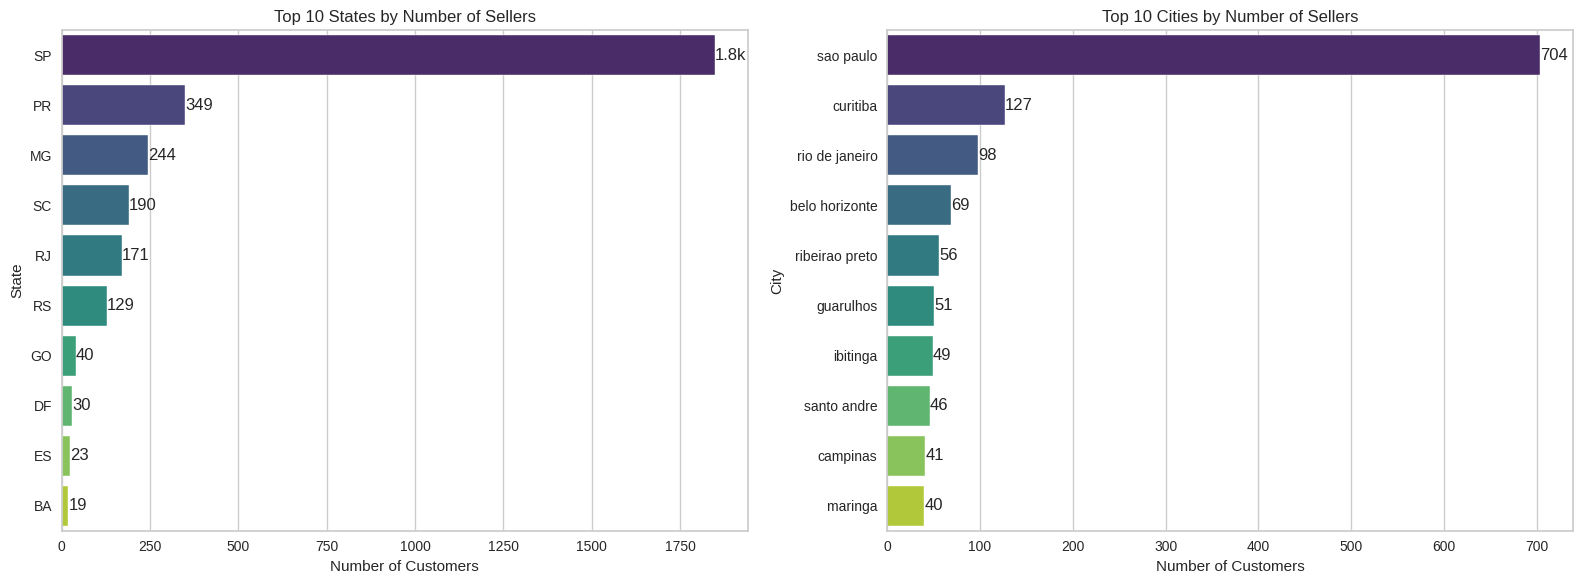

In [101]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#
create_bar_chart(
    sellers_df.groupby('seller_state')['seller_id'].nunique(),
    'y',
    'Top 10 States by Number of Sellers',
    'Number of Customers',
    'State',
    limit=10,
    ax=axes[0]
)

#
create_bar_chart(
    sellers_df.groupby('seller_city')['seller_id'].nunique(),
    'y',
    'Top 10 Cities by Number of Sellers',
    'Number of Customers',
    'City',
    limit=10,
    ax=axes[1]
)

plt.tight_layout()


From the customer data we previously reviewed, where we analyzed customer distribution by state and city, São Paulo is also the state and city with the highest sales. It is followed by Paraná and Minas Gerais as the second and third top sellers.

The ranking of top-selling states and cities closely mirrors the customer distribution order. This may indicate a correlation with population density or specific economic levels in these states and cities.

## **Summary**

The Exploratory Data Analysis (EDA) process provided valuable insights into various aspects of the Olist e-commerce dataset, including customer behavior, order patterns, product performance, and seller activity. The analysis revealed the following key findings:

* **Customer Behavior:** The majority of customers are one-time buyers, emphasizing the need to focus on strategies to encourage repeat purchases. Repeat customers tend to have longer relationships with the business, make more recent purchases, and contribute more in terms of monetary value. The LRFM analysis highlighted distinct customer segments with varying levels of engagement and spending behavior, which can be leveraged for targeted marketing and customer retention initiatives.

* **Order Patterns:** The analysis of orders revealed trends in total sales and revenue over time. The peak sales period was observed in late 2017, followed by a decline in 2018. Credit cards were identified as the most frequently used payment method, and the analysis also shed light on the proportion of late deliveries, which can inform improvements in logistics and delivery processes.

* **Product Performance:** The EDA explored the distribution of sales and revenue across different product categories. The analysis identified the top-performing categories in terms of sales and revenue for all customers, one-time customers, and repeat customers, providing valuable information for inventory management and product promotion strategies.

* **Seller Activity:** The analysis tracked the trend of monthly active sellers, revealing a general pattern of growth with periods of stagnation and decline. The distribution of sellers across different states was also visualized, highlighting the concentration of sellers in specific regions.

Overall, the EDA process offered a comprehensive understanding of the Olist e-commerce dataset, uncovering valuable insights that can inform strategic decision-making in areas such as marketing, customer relationship management, product assortment, and seller engagement. The findings can be used to develop data-driven strategies to enhance customer lifetime value, optimize sales and revenue, and improve overall business performance.

# **5. Modeling**

The primary objective of this section is to apply clustering techniques to three distinct dataframes, each representing a different customer segment: all customers, one-time customers, and repeat customers. The goal is to uncover underlying patterns or groupings within these segments using unsupervised learning approaches like K-Means and Gaussian Mixture Models (GMMs).


In [102]:
#
for i, df in enumerate(dfs):
  print(f"Dataframe {i+1}: {labels[i]}")
  print(f"Total: {df.shape[0]}")
  print()



Dataframe 1: All Customers
Total: 96093

Dataframe 2: One-Time Customers
Total: 93097

Dataframe 3: Repeat Customers
Total: 2996



In this section, we will apply clustering techniques to three distinct dataframes, each representing different customer segments: all customers, one-time customers, and repeat customers. The goal is to uncover underlying patterns or groupings within these segments using unsupervised learning approaches like K-Means and Gaussian Mixture Models (GMMs).



## **5.1. Scale Features**

In [103]:
#
km_dfs = copy.deepcopy(dfs)
gm_dfs = copy.deepcopy(dfs)

#
scaled_dfs = []
scaler = RobustScaler()

#
for df in dfs:
  scaled_df = pd.DataFrame(scaler.fit_transform(df.drop('customer_unique_id', axis=1)), columns=df.columns[1:])
  scaled_dfs.append(scaled_df)



* Create deep copies of the original DataFrames (`km_dfs`, `gm_dfs`) to ensure we don't modify the original data during scaling.
* `RobustScaler` is employed for feature scaling to mitigate the impact of potential outliers in the data.
* The `customer_unique_id` column is excluded from scaling as it's an identifier, not a feature relevant to clustering.
* The scaled DataFrames are stored in the `scaled_dfs` list for subsequent use in clustering algorithms.

## **5.2 K-Means**

K-Means is an unsupervised machine learning algorithm used for partitioning data into 'K' distinct, non-overlapping clusters. The goal is to group similar data points together and identify underlying patterns or structures in the data. The algorithm achieves this by minimizing the sum of squared distances between each data point and the **centroid (center)** of its assigned cluster.

Centroid represents the "center" or average point of a cluster. It is calculated as the mean of all the data points within that cluster. Each cluster has its own centroid, and the algorithm iteratively updates the centroids and reassigns data points to clusters until convergence (i.e., the centroids stabilize). The goal is to minimize the distortion score, which means finding centroids that are as close as possible to the data points within their respective clusters.

**1. Determining the Optimal Number of Clusters (K)**

In K-means, the number of clusters 'K' is a hyperparameter that needs to be specified beforehand. The K-Elbow Visualizer, employing the elbow method, will be utilized to determine the optimal K value for our customer segmentation task.

* **Elbow Method:** The elbow method evaluates a range of K values (e.g., 1-10) and calculates the average distortion score for each. The distortion score measures the sum of squared distances between each data point and its assigned cluster centroid:

**Distortion Score**

```
Distortion = ∑ ∑ ||xᵢⱼ - cⱼ||²
```

where:

* xᵢⱼ is the i-th data point in the j-th cluster
* cⱼ is the centroid of the j-th cluster

The optimal K is typically identified at the "elbow" point in the plot of distortion scores versus K values. This point signifies where the decrease in distortion starts to slow down, indicating diminishing returns in adding more clusters.

**2. Applying K-Means to LRFM Data**

Once the optimal K is determined, K-means clustering will be applied to segment customers based on their LRFM attributes (Length, Recency, Frequency, Monetary Value). Each resulting segment will represent a group of customers exhibiting similar purchasing behaviors and potentially similar customer lifecycles (based on the Length metric).

**3. Analyzing and Utilizing Customer Segments**

These segments can then be further analyzed to understand their characteristics and develop targeted marketing strategies. For example:

* A segment with high Recency, Frequency, and Monetary Value, and long Length might represent "high-value loyal customers" who could be targeted with exclusive offers or loyalty programs.
* A segment with low Recency and Frequency, and short Length might represent "new customers who haven't engaged much" who could be targeted with onboarding or introductory offers to encourage repeat purchases.
* A segment with low Recency but high Frequency and Monetary Value, and long Length, might represent "lapsed high-value customers" who could be targeted with reactivation campaigns or special offers to win back their business

**4. Evaluating Clustering Quality**

Besides the elbow method, silhouette scores or calinski-harabasz scores can be employed as alternative metrics to assess the quality of the clustering solutions for different K values, ensuring the robustness of the segmentation process.

* **Silhouette Score:** Measures how similar a data point is to its own cluster compared to other clusters. Higher scores indicate better-defined clusters.

```
s(i) = (b(i) - a(i)) / max(a(i), b(i))
```

* **Calinski-Harabasz Score:** Evaluates the ratio of between-cluster dispersion to within-cluster dispersion. Higher scores suggest denser and well-separated clusters.

```
CH = [B(k) / (k - 1)] / [W(k) / (n - k)]
```

**Overall Aim**

The K-means clustering approach aims to uncover meaningful customer segments within the Olist e-commerce dataset, enabling more personalized and effective marketing strategies that cater to the unique needs and behaviors of each customer group, considering both their purchasing patterns and their lifecycle stage with the company.


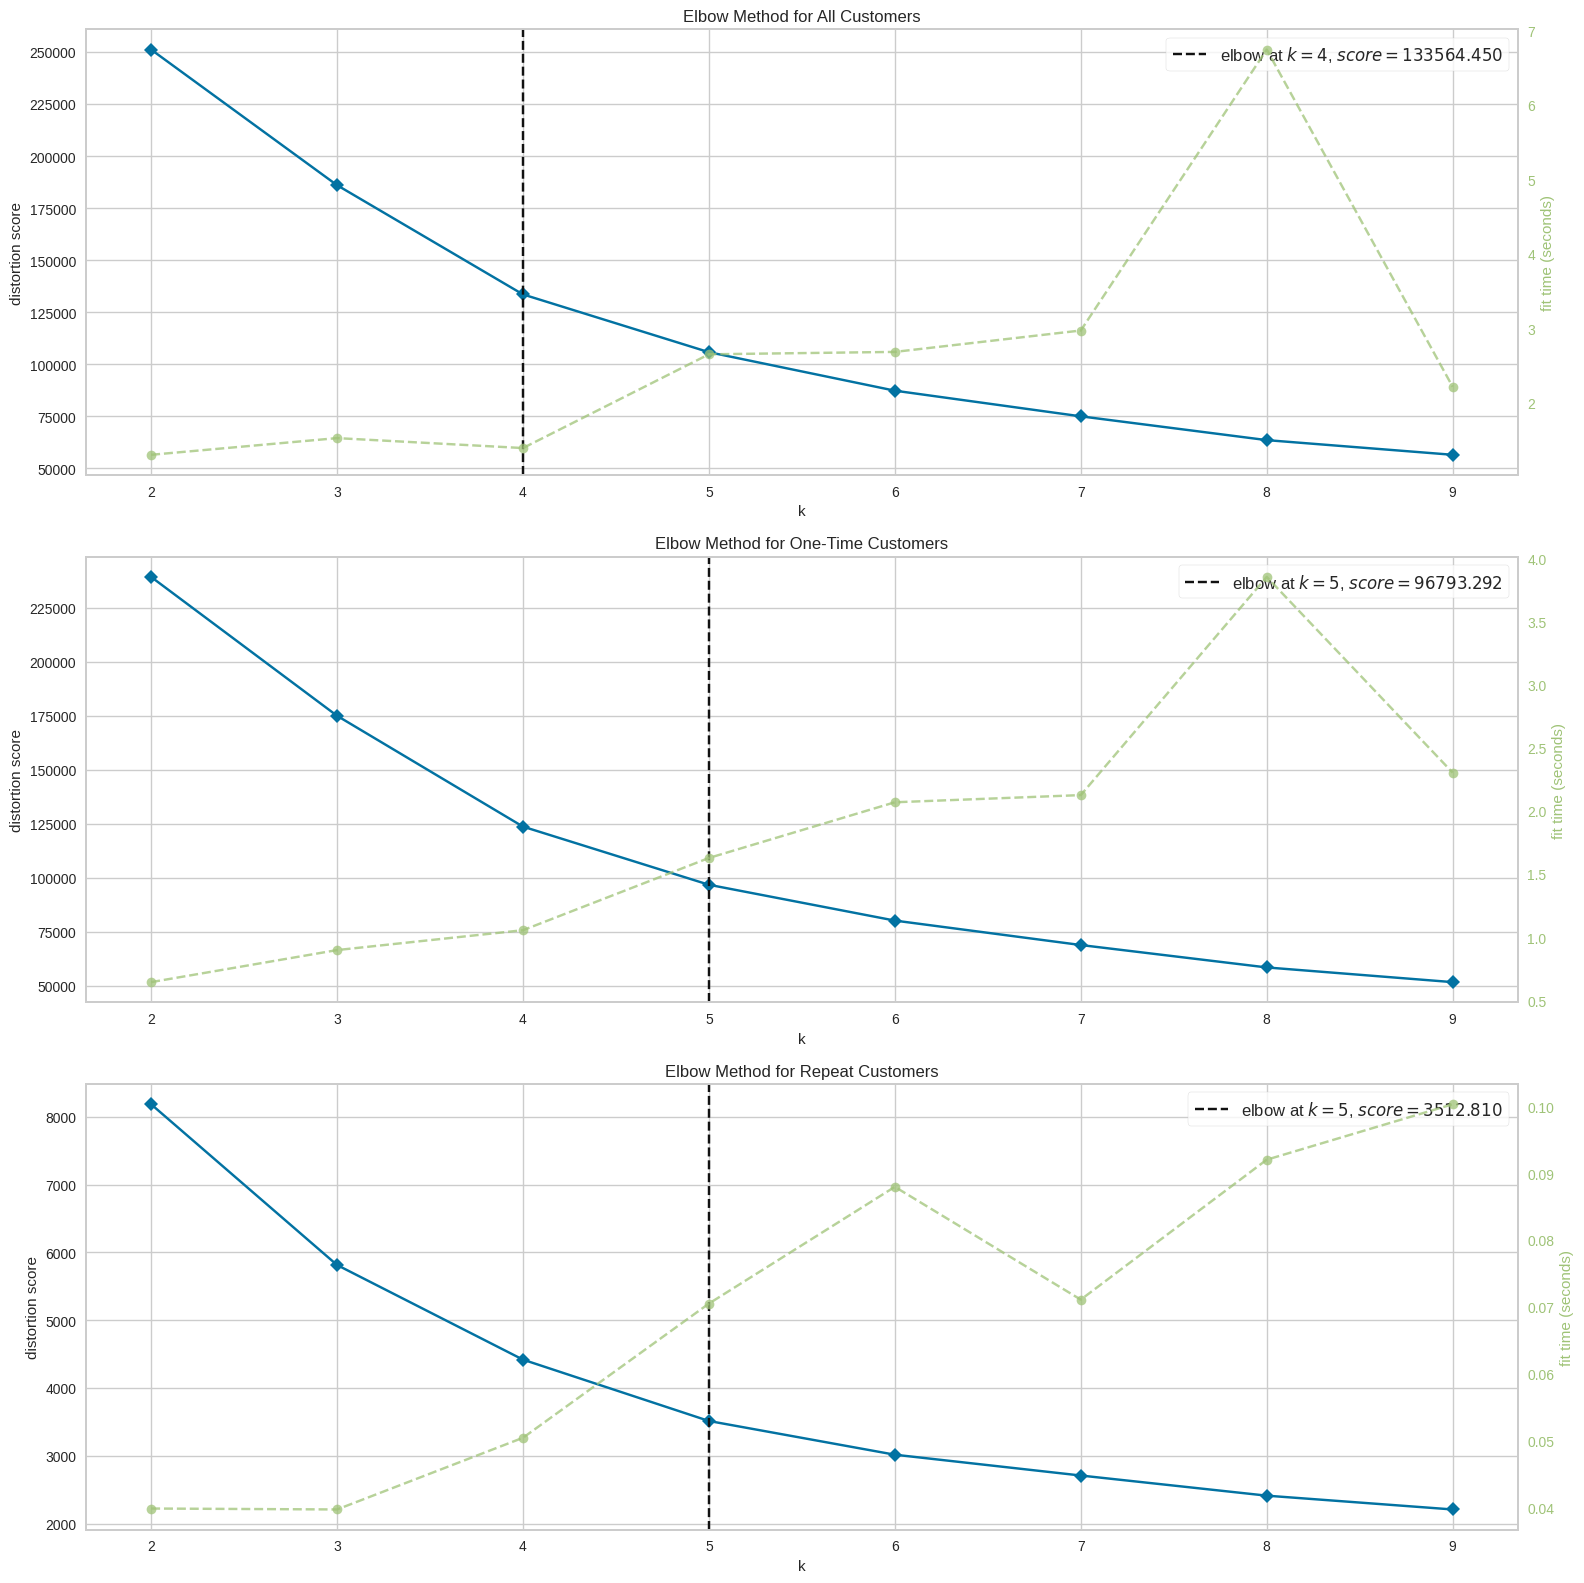

In [104]:
#
fig, axes = plt.subplots(3, 1, figsize=(16, 16))

#
for i, df in enumerate(scaled_dfs):
    elbow = KElbowVisualizer(KMeans(random_state=0), k=(2, 10), ax=axes[i])
    elbow.fit(df)
    elbow.finalize()
    axes[i].set_title(f'Elbow Method for {labels[i]}')

plt.tight_layout()
plt.show()

The chart above shows the distribution of customers across the identified clusters for each of the three dataframes. This information provides insights into the relative sizes of the segments and their prevalence among different customer types (all customers, one-time customers, repeat customers).



In [105]:
#
km_dfs[0]['Cluster'] = KMeans(n_clusters=4, random_state=0).fit_predict(scaled_dfs[0])
km_dfs[1]['Cluster'] = KMeans(n_clusters=5, random_state=0).fit_predict(scaled_dfs[1])
km_dfs[2]['Cluster'] = KMeans(n_clusters=5, random_state=0).fit_predict(scaled_dfs[2])


Fits the K-Means model and predicts cluster labels for the three dataframes (All Customers, One-Time Customers, Repeat Customers).


In [106]:
#
cluster_counts = []

#
for i, df in enumerate(km_dfs):
  counts = df['Cluster'].value_counts().sort_index()
  cluster_counts.append(counts)

#
pd.DataFrame(cluster_counts, index=labels).T


All Customers  One-Time Customers  Repeat Customers
Cluster                                                     
0              50523.0             46581.0            1139.0
1              37483.0              1993.0              40.0
2                849.0             34091.0             343.0
3               7238.0               324.0            1472.0
4                  NaN             10108.0               2.0

The table presents the number of customers belonging to each cluster for the three dataframes. It offers a concise summary of the cluster distribution and facilitates comparison across the different customer types.



## **5.3 Gaussian Mixture Models**

Gaussian Mixture Models (GMMs) offer a probabilistic approach to clustering, assuming that the data is generated from a mixture of multiple Gaussian distributions. Each Gaussian component represents a cluster, characterized by its mean (center), covariance (shape and orientation), and mixing coefficient (proportion of data points belonging to that cluster). GMMs provide a more flexible and nuanced representation of clusters compared to K-means, allowing for overlapping clusters and varying cluster shapes.

Mathematically, a GMM is represented as:

```
p(x) = ∑ πₖ * N(x | μₖ, Σₖ)
```

where:

* p(x) is the probability density function of the data
* πₖ is the mixing coefficient for the k-th Gaussian component (0 ≤ πₖ ≤ 1 and ∑ πₖ = 1)
* N(x | μₖ, Σₖ) is the probability density function of a multivariate Gaussian distribution with mean μₖ and covariance matrix Σₖ

**1. Determining the Optimal Number of Components**

Similar to K-means, the number of components (analogous to clusters) in a GMM is a hyperparameter that needs to be determined. The Bayesian Information Criterion (BIC) or Akaike Information Criterion (AIC) will be employed to evaluate different numbers of components and select the optimal one that balances model complexity and goodness of fit.

* **BIC/AIC:** These information criteria penalize models with more parameters (i.e., more complex models) to prevent overfitting.

* BIC:

```
BIC = -2 * ln(L) + k * ln(n)
```

where:

* L is the maximized value of the likelihood function for the model
* k is the number of parameters in the model
* n is the number of data points

* AIC:

```
AIC = -2 * ln(L) + 2 * k
```

Lower BIC/AIC values indicate a better model.

**2. Applying GMM to LRFM Data**

Once the optimal number of components is determined, GMM will be applied to segment customers based on their LRFM attributes (Length, Recency, Frequency, Monetary Value). Each component will represent a probabilistic cluster, and each customer will have a probability of belonging to each cluster. This probability is calculated using the posterior probability formula:

```
p(k | x) = (πₖ * N(x | μₖ, Σₖ)) / p(x)
```

where

* p(k | x) is the posterior probability of data point x belonging to cluster k

**3. Analyzing and Utilizing Customer Segments**

The probabilistic nature of GMM allows for a more nuanced understanding of customer segments. Customers can be assigned to the cluster with the highest probability of membership or analyzed based on their probabilities across multiple clusters. This enables more targeted and personalized marketing strategies.

For instance:

* Customers with high probabilities in a cluster characterized by high Recency, Frequency, and Monetary Value, and long Length, can be considered "high-value loyal customers" and targeted with exclusive offers or loyalty programs
* Customers with significant probabilities in multiple clusters can be targeted with marketing campaigns that cater to the characteristics of those clusters.

**4. Evaluating Clustering Quality**

Besides BIC/AIC, other metrics like the log-likelihood of the data given the model can be used to assess the quality of the GMM clustering solution.

```
log-likelihood = ∑ log(p(xᵢ))
```

where

* p(xᵢ) is the probability density of data point xᵢ under the GMM model

**5. Overall Aim**

The GMM approach aims to uncover nuanced and potentially overlapping customer segments within the Olist e-commerce dataset, enabling even more personalized and effective marketing strategies that leverage the probabilistic nature of customer memberships in different segments. This approach recognizes that customers may exhibit behaviors associated with multiple segments, allowing for more targeted and relevant marketing interventions.


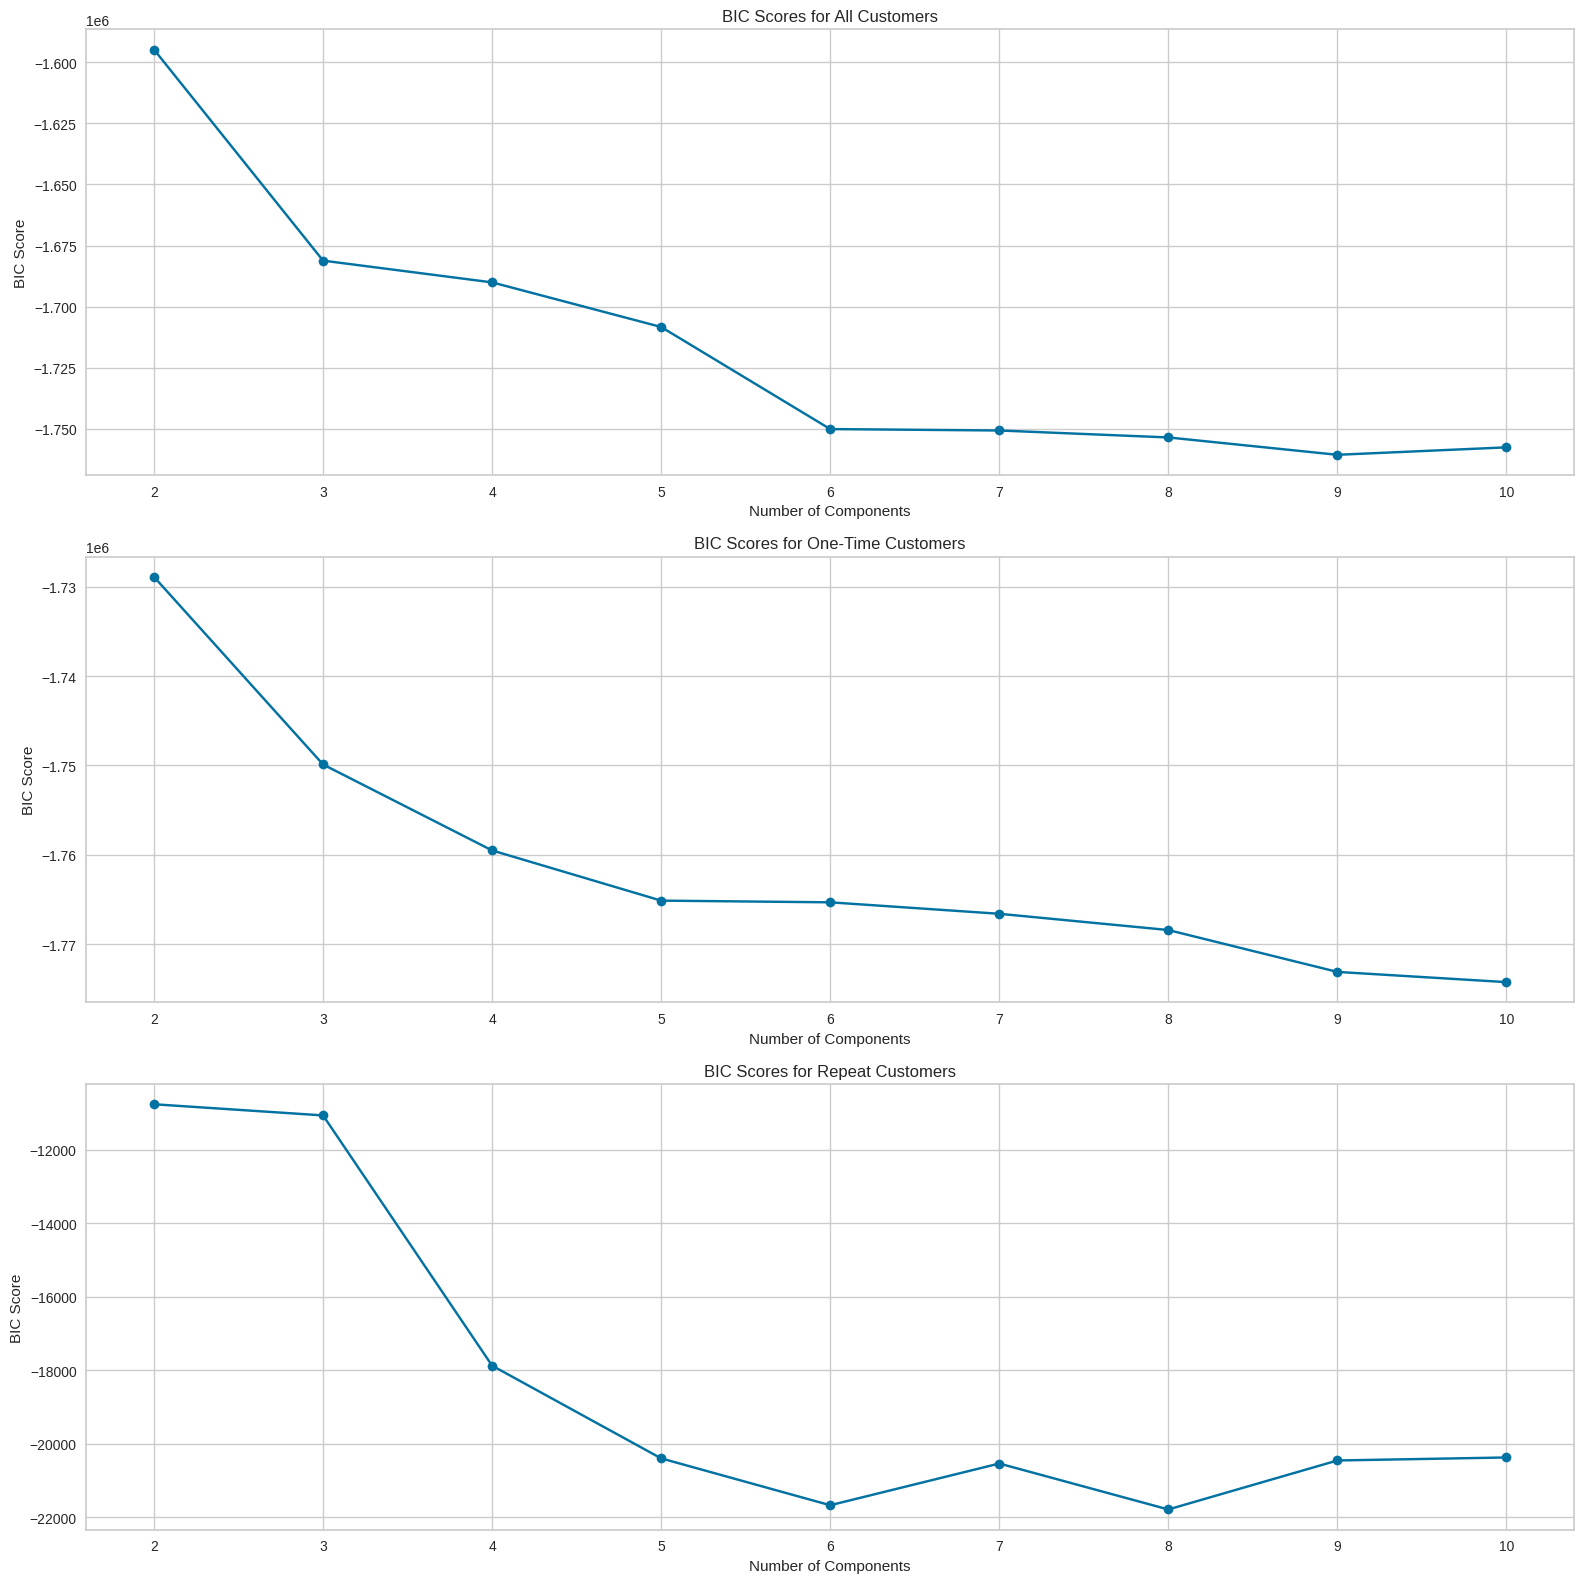

In [107]:
fig, axes = plt.subplots(3, 1, figsize=(16, 16))

#
for i in range(len(scaled_dfs)):
    bic_scores = []
    for n in range(2, 11):
        gm = GaussianMixture(n_components=n, random_state=0)
        gm.fit(scaled_dfs[i])
        bic_scores.append(gm.bic(scaled_dfs[i]))

    # Plot on the corresponding axes
    axes[i].plot(range(2, 11), bic_scores, marker='o')
    axes[i].set_xlabel('Number of Components')
    axes[i].set_ylabel('BIC Score')
    axes[i].set_title(f'BIC Scores for {labels[i]}')

plt.tight_layout()
plt.show()

#
for i in range(len(scaled_dfs)):
    optimal_n = np.argmin(bic_scores) + 2
    gm_optimal = GaussianMixture(n_components=optimal_n, random_state=0)
    gm_dfs[i]['Cluster'] = gm_optimal.fit_predict(scaled_dfs[i])


The plots above depict the Bayesian Information Criterion (BIC) scores for varying numbers of components in the Gaussian Mixture Model (GMM) for each of the three dataframes. The optimal number of components is typically indicated by the lowest BIC score, representing a balance between model complexity and goodness of fit.



In [108]:
#
cluster_counts = []

#
for i, df in enumerate(gm_dfs):
  counts = df['Cluster'].value_counts().sort_index()
  cluster_counts.append(counts)

#
pd.DataFrame(cluster_counts, index=labels).T


All Customers  One-Time Customers  Repeat Customers
Cluster                                                     
0                48720               22878              1049
1                 4302                 914                19
2                 1375               22517                 2
3                17789                  29                19
4                   75               10882               843
5                  223                 361               199
6                22262               32245                32
7                 1347                3271               833

Summarizes the number of customers assigned to each cluster based on the GMM for the three dataframes. It offers a concise overview of the cluster distribution and enables comparison across different customer types, highlighting potential differences in segmentation patterns between K-Means and GMM.



## **5.4. Principal Component Analysis**

Principal Component Analysis (PCA) is applied to reduce the dimensionality of the scaled dataframes while preserving the most significant variance. This facilitates visualization and potentially improves the performance of clustering algorithms by focusing on the most informative features. The code performs PCA on the scaled dataframes, transforming them into two-dimensional representations ('PC 1' and 'PC 2') for subsequent visualization and clustering.



In [109]:
#
km_pca_dfs = []
gm_pca_dfs = []

pca = PCA(n_components=2)

for df in scaled_dfs:
  pca.fit(df)
  pcs = pca.transform(df)
  df_pca = pd.DataFrame(data=pcs, columns=['PC 1', 'PC 2'])
  km_pca_dfs.append(df_pca)

for df in scaled_dfs:
  pca.fit(df)
  pcs = pca.transform(df)
  df_pca = pd.DataFrame(data=pcs, columns=['PC 1', 'PC 2'])
  gm_pca_dfs.append(df_pca)


Applies K-Means and GMM clustering to the PCA-transformed data and creates scatter plots to visualize the clusters.


In [110]:
#
km_pca_dfs[0]['Cluster'] = KMeans(n_clusters=4, random_state=0).fit_predict(scaled_dfs[0])
km_pca_dfs[1]['Cluster'] = KMeans(n_clusters=5, random_state=0).fit_predict(scaled_dfs[1])
km_pca_dfs[2]['Cluster'] = KMeans(n_clusters=5, random_state=0).fit_predict(scaled_dfs[2])

#
gm_pca_dfs[0]['Cluster'] = GaussianMixture(n_components=7, random_state=0).fit_predict(scaled_dfs[0])
gm_pca_dfs[1]['Cluster'] = GaussianMixture(n_components=7, random_state=0).fit_predict(scaled_dfs[1])
gm_pca_dfs[2]['Cluster'] = GaussianMixture(n_components=7, random_state=0).fit_predict(scaled_dfs[2])


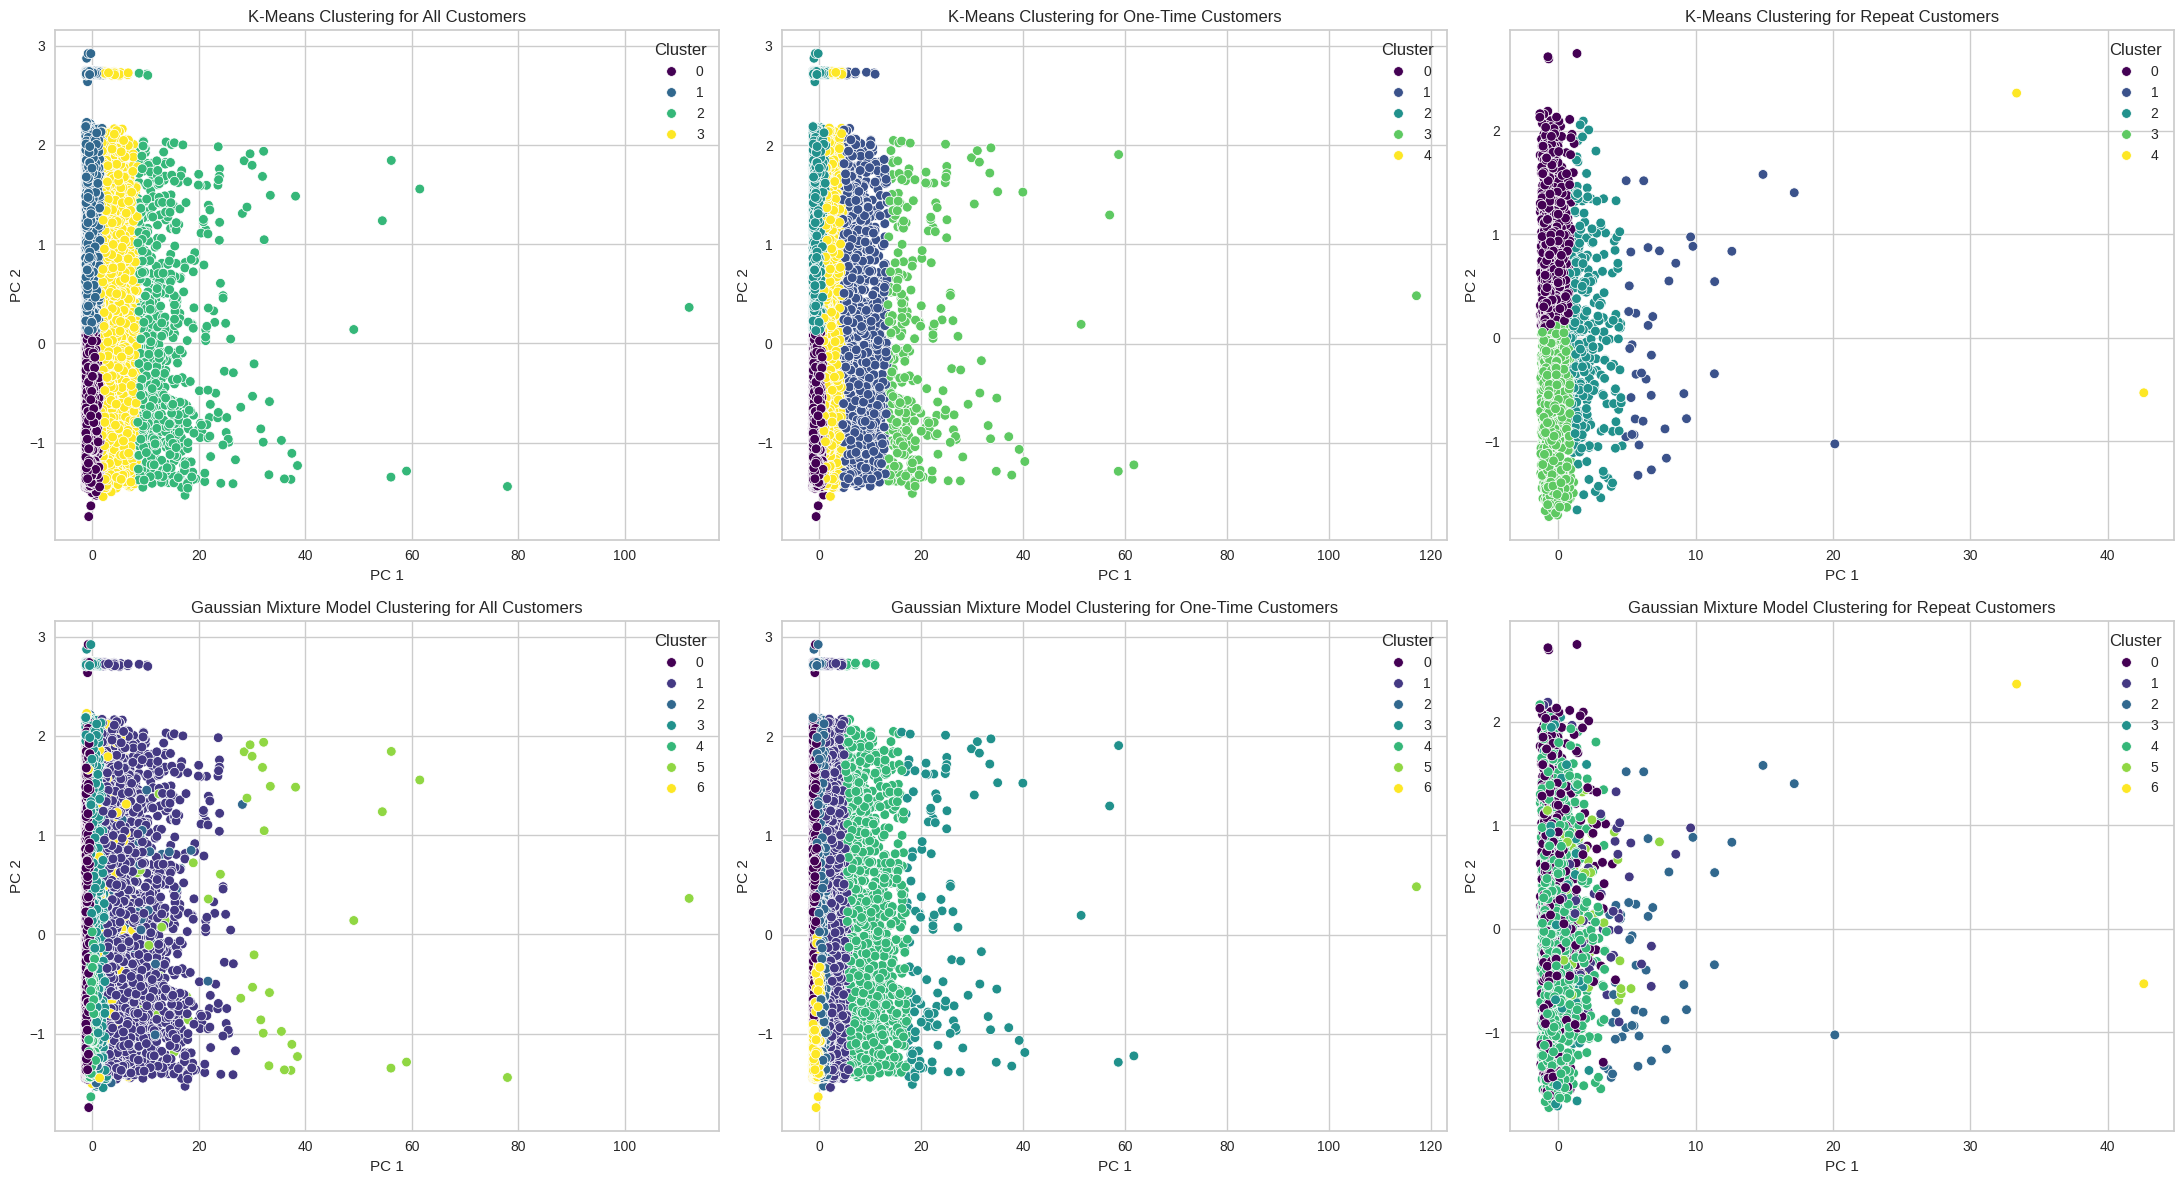

In [111]:
fig, axes = plt.subplots(2, 3, figsize=(22, 12))

#
for i in range(3):
    sns.scatterplot(x='PC 1', y='PC 2', hue='Cluster', data=km_pca_dfs[i], palette='viridis', ax=axes[0, i])
    axes[0, i].set_title(f'K-Means Clustering for {labels[i]}')

#
for i in range(3):
    sns.scatterplot(x='PC 1', y='PC 2', hue='Cluster', data=gm_pca_dfs[i], palette='viridis', ax=axes[1, i])
    axes[1, i].set_title(f'Gaussian Mixture Model Clustering for {labels[i]}')

plt.tight_layout()
plt.show()


Visualize the K-Means and Gaussian Mixture Model (GMM) clustering results on the two-dimensional PCA-transformed data for each of the three dataframes. The plots provide a visual representation of the identified clusters and their separation in the reduced feature space, aiding in understanding the underlying patterns and relationships within the data.



## **5.5. Evaluation**

Evaluates the quality of the clustering results obtained using K-Means and GMM on the original scaled data. The Calinski-Harabasz Index, Davies-Bouldin Index, and Silhouette Score are calculated to assess the compactness, separation, and overall coherence of the clusters. The results indicate that K-Means outperforms GMM in terms of cluster compactness and separation, while GMM may offer a better fit to the underlying data structure based on the Silhouette Score.



In [112]:
# calculate Calinski-Harabasz Index
ch_score = calinski_harabasz_score(scaled_dfs[0], km_dfs[0]['Cluster'])

# calculate Davies-Bouldin Index
db_score = davies_bouldin_score(scaled_dfs[0], km_dfs[0]['Cluster'])

# calculate Silhouette Score
sil_score = silhouette_score(scaled_dfs[0], km_dfs[0]['Cluster'])

#
print(f"Calinski-Harabasz Index: {ch_score.round(2)}")
print(f"Davies-Bouldin Index: {db_score.round(2)}")
print(f"Silhouette Score: {sil_score.round(2)}")


Calinski-Harabasz Index: 74040.26
Davies-Bouldin Index: 0.78
Silhouette Score: 0.41


In [113]:
# calculate Calinski-Harabasz Index
ch_score = calinski_harabasz_score(scaled_dfs[0], gm_dfs[0]['Cluster'])

# calculate Davies-Bouldin Index
db_score = davies_bouldin_score(scaled_dfs[0], gm_dfs[0]['Cluster'])

# calculate Silhouette Score
sil_score = silhouette_score(scaled_dfs[0], gm_dfs[0]['Cluster'])

#
print(f"Calinski-Harabasz Index: {ch_score.round(2)}")
print(f"Davies-Bouldin Index: {db_score.round(2)}")
print(f"Silhouette Score: {sil_score.round(2)}")


Calinski-Harabasz Index: 18039.3
Davies-Bouldin Index: 1.82
Silhouette Score: 0.21


Calculates centroids for the K-Means clusters on the PCA-transformed data and visualizes the clusters with centroids.


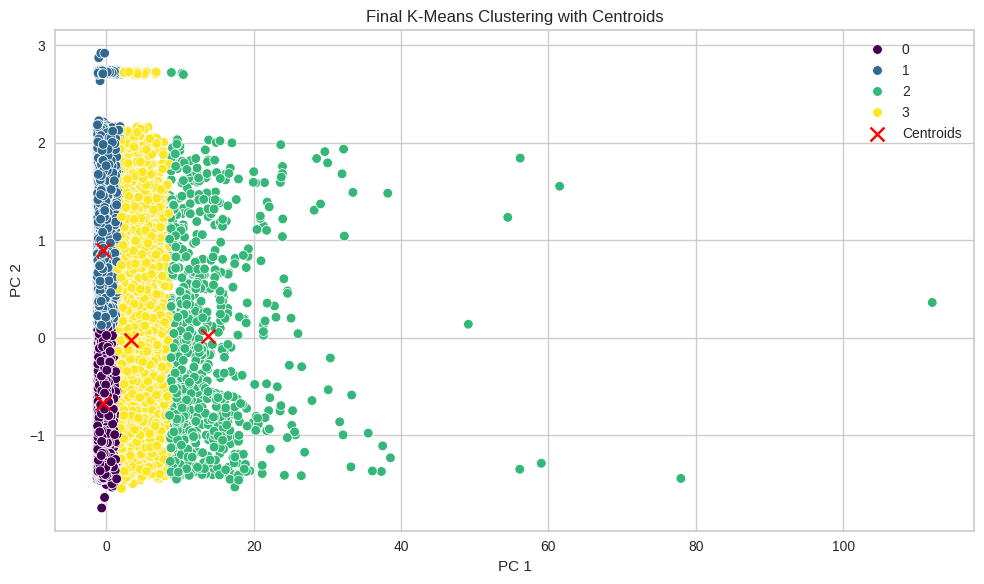

In [114]:
# Calculate centroids
centroids = km_pca_dfs[0].groupby('Cluster')[['PC 1', 'PC 2']].mean()

# Visualize clusters and centroids
plt.figure(figsize=(10, 6))

sns.scatterplot(x='PC 1', y='PC 2', hue='Cluster', data=km_pca_dfs[0], palette='viridis')
plt.scatter(centroids['PC 1'], centroids['PC 2'], marker='x', s=100, c='red', label='Centroids')
plt.title('Final K-Means Clustering with Centroids')
plt.legend()

plt.tight_layout()
plt.show()


Final K-Means clustering results on the two-dimensional PCA-transformed data, along with the centroids of each cluster. The centroids represent the "center" or average point of each cluster and provide a reference point for understanding the characteristics and distribution of the clusters in the reduced feature space.



In [115]:
# Calculate centroids
centroids = km_dfs[0].groupby('Cluster')[['Length', 'Recency', 'Frequency', 'Monetary']].mean().round(2)
centroids


Length  Recency  Frequency  Monetary
Cluster                                      
0        179.18   177.51       1.02    117.59
1        439.94   437.41       1.03    117.87
2        298.61   293.09       1.10   1824.65
3        292.12   281.39       1.13    566.55

Centroids of the four K-Means clusters based on the original scaled features (Length, Recency, Frequency, Monetary). The centroids provide insights into the typical characteristics of customers within each cluster, facilitating interpretation and understanding of the segmentation results.



In [116]:
#
cluster0_df = km_dfs[0][km_dfs[0]['Cluster'] == 0]
cluster1_df = km_dfs[0][km_dfs[0]['Cluster'] == 1]
cluster2_df = km_dfs[0][km_dfs[0]['Cluster'] == 2]
cluster3_df = km_dfs[0][km_dfs[0]['Cluster'] == 3]

#
dfs = [cluster0_df, cluster1_df, cluster2_df, cluster3_df]
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']


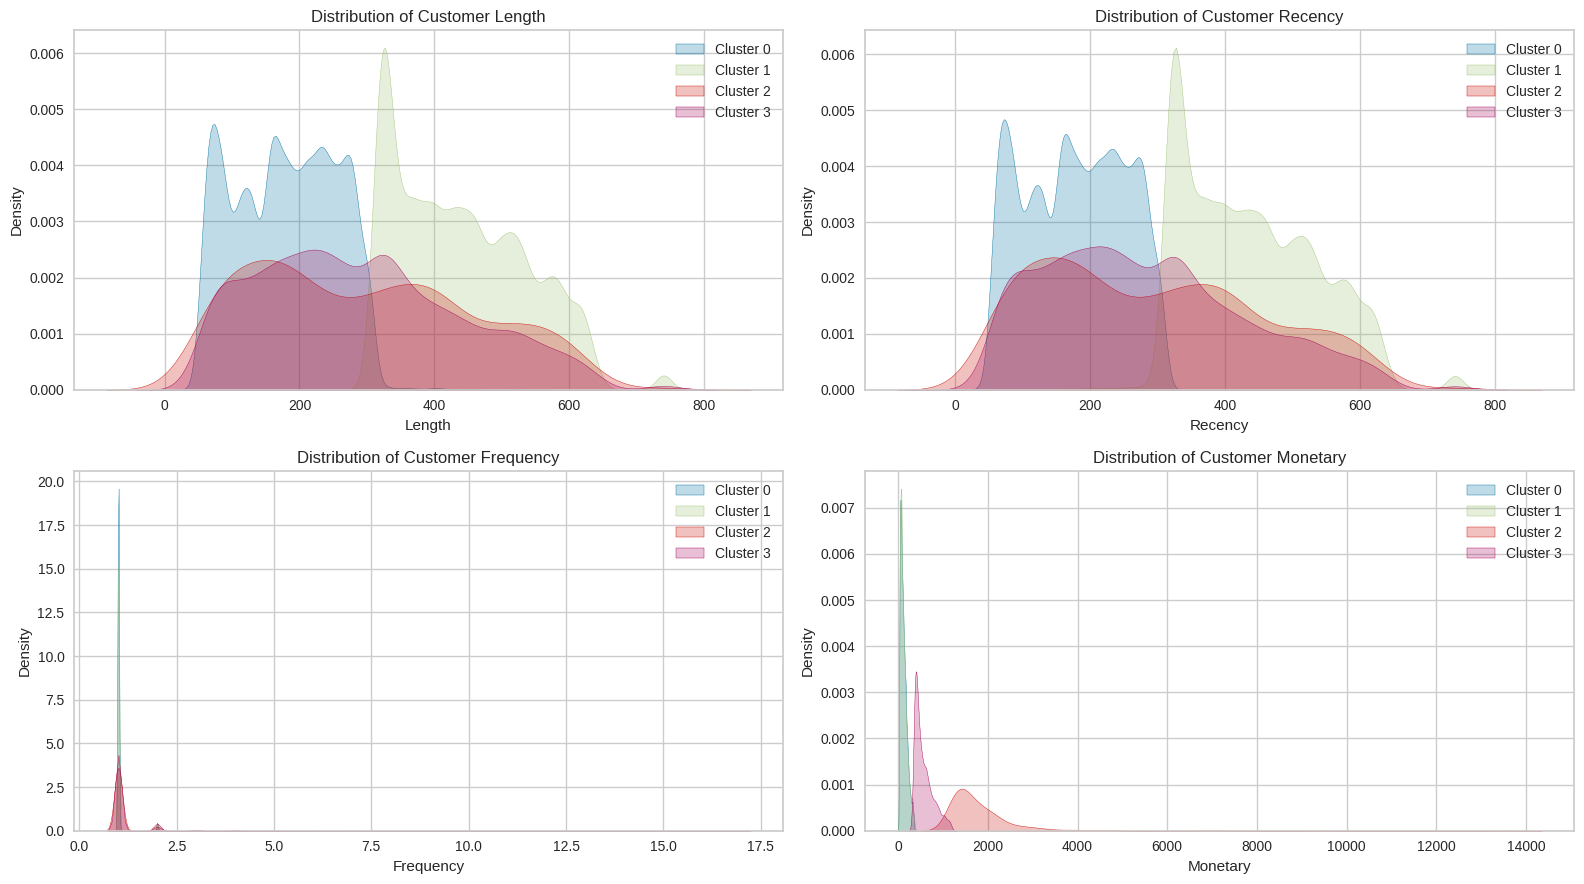

In [117]:
#
fig, axes = plt.subplots(2, 2, figsize=(16, 9))

#
create_density_chart(
    dfs,
    'Length',
    labels,
    'Distribution of Customer Length',
    ax=axes[0, 0]
)

#
create_density_chart(
    dfs,
    'Recency',
    labels,
    'Distribution of Customer Recency',
    ax=axes[0, 1]
)

#
create_density_chart(
    dfs,
    'Frequency',
    labels,
    'Distribution of Customer Frequency',
    ax=axes[1, 0]
)

#
create_density_chart(
    dfs,
    'Monetary',
    labels,
    'Distribution of Customer Monetary',
    ax=axes[1, 1]
)

plt.tight_layout()


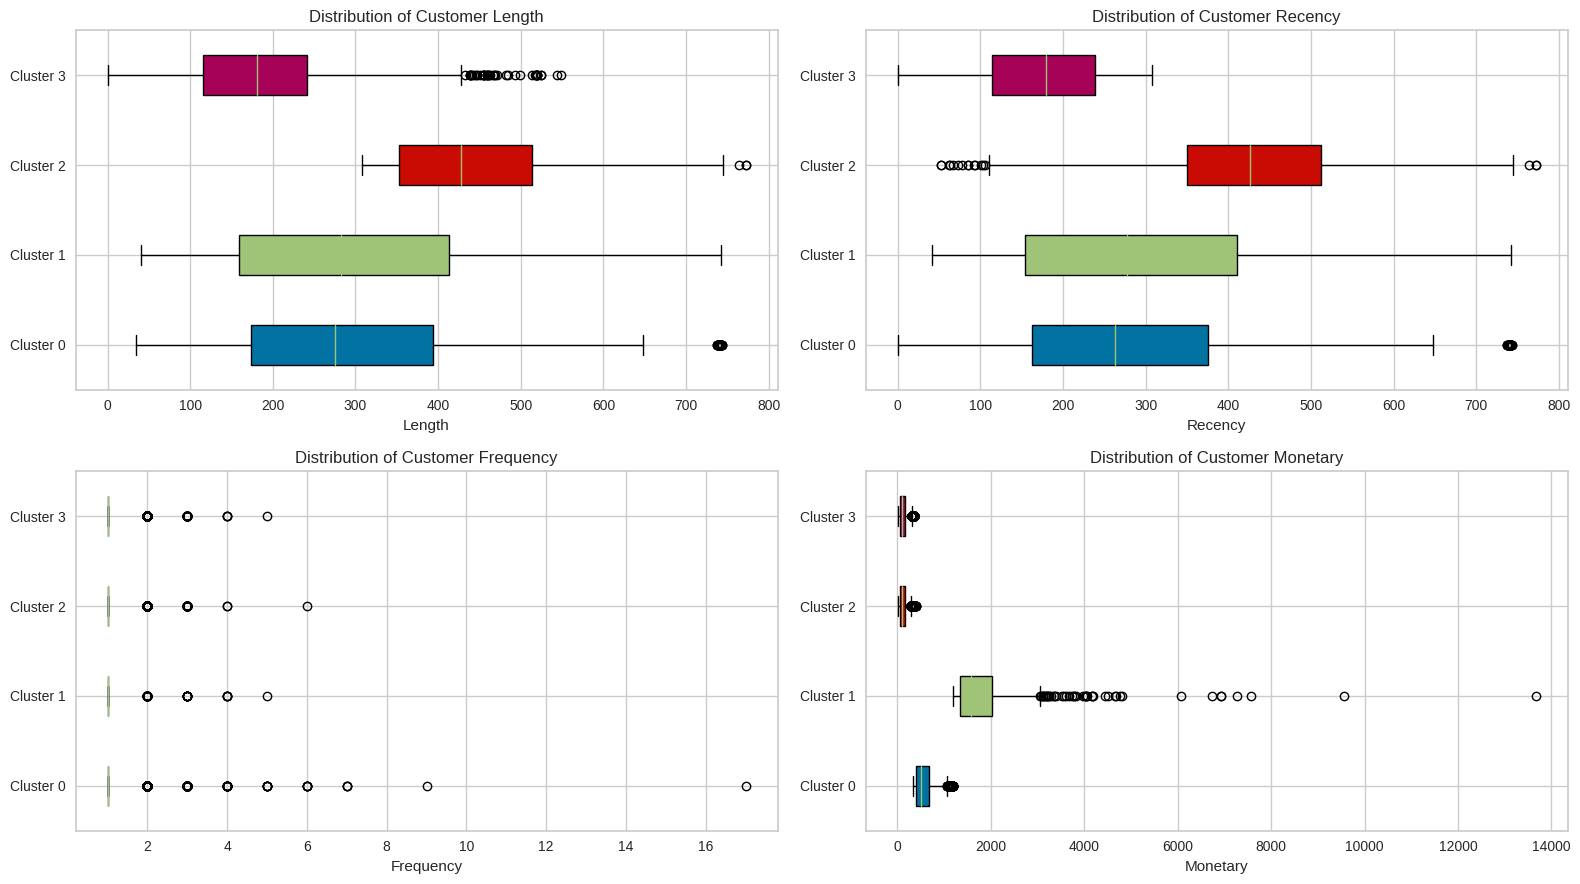

In [118]:
#
fig, axes = plt.subplots(2, 2, figsize=(16, 9))

#
create_boxplot_chart(
    dfs,
    'Length',
    labels,
    'Distribution of Customer Length',
    ax=axes[0, 0]
)

#
create_boxplot_chart(
    dfs,
    'Recency',
    labels,
    'Distribution of Customer Recency',
    ax=axes[0, 1]
)

#
create_boxplot_chart(
    dfs,
    'Frequency',
    labels,
    'Distribution of Customer Frequency',
    ax=axes[1, 0]
)

#
create_boxplot_chart(
    dfs,
    'Monetary',
    labels,
    'Distribution of Customer Monetary',
    ax=axes[1, 1]
)

plt.tight_layout()


In [119]:
# Calculate customer number and range of LRFM per cluster
cluster_summary = km_dfs[0].groupby('Cluster').agg(
    Customer_Total=('customer_unique_id', 'nunique'),
    Length_Range=('Length', lambda x: f"{x.min()} - {x.max()}"),
    Recency_Range=('Recency', lambda x: f"{x.min()} - {x.max()}"),
    Frequency_Range=('Frequency', lambda x: f"{x.min()} - {x.max()}"),
    Monetary_Range=('Monetary', lambda x: f"{x.min()} - {x.max()}")
)

cluster_summary


Customer_Total Length_Range Recency_Range Frequency_Range  \
Cluster                                                              
0                 50523      0 - 549       0 - 308           1 - 5   
1                 37483    308 - 772      53 - 772           1 - 6   
2                   849     41 - 742      41 - 742           1 - 5   
3                  7238     34 - 743       0 - 743          1 - 17   

             Monetary_Range  
Cluster                      
0             9.59 - 365.38  
1            10.07 - 406.92  
2        1196.78 - 13664.08  
3          327.39 - 1195.23

**Others Clustering Methods**

DBSCAN and Agglomerative Hierarchical Clustering have issues for the current dataset:

- **DBSCAN**: Not suitable for high-dimensional data (the data has 4 dimensions), thus not optimal for segmentation.
- **Agglomerative Hierarchical Clustering**: Disadvantageous due to high storage resource usage and long training time, making it inefficient for this data.

**Reasoning for Choosing KMeans and Gaussian Mixture**

- **KMeans**: Excels in the Calinski-Harabasz Index and Davies-Bouldin Index, indicating that KMeans tends to produce more compact and separated clusters.
- **Gaussian Mixture**: Outperforms in the Silhouette Score, suggesting that the clustering from Gaussian Mixture may better fit the data structure.

**Decision**

KMeans decided to use for the clustering because:

- KMeans produces 4 clusters, which allows for exploring and understanding differences between more specific segments in the data.
- This approach aids in making more informed decisions and designing more effective strategies based on a more detailed analysis.


## **5.6. Analysis**

In [120]:
# Merge customer data with geolocation data based on zip code prefix.
df = pd.merge(customers_df, geolocation_df, on='zip_code_prefix', how='inner')

# # Rename columns to specify they belong to customers.
df.rename(columns={'zip_code_prefix': 'customers_zip_code_prefix'}, inplace=True)
df.rename(columns={'geolocation_lat': 'customers_geolocation_lat'}, inplace=True)
df.rename(columns={'geolocation_lng': 'customers_geolocation_lng'}, inplace=True)

# Merge with order data.
df = pd.merge(df, orders_df, on='customer_id', how='inner')

# Merge with order items data.
df = pd.merge(df, order_items_df, on='order_id', how='inner')

# Merge with order payments data.
df = pd.merge(df, order_payments_df, on='order_id', how='inner')

# Merge with order reviews data.
df = pd.merge(df, order_reviews_df, on='order_id', how='inner')

# Merge with product data.
df = pd.merge(df, products_df, on='product_id', how='inner')

# Merge with seller data.
df = pd.merge(df, sellers_df, on='seller_id', how='inner')

# Merge seller data with geolocation data based on zip code prefix.
df = pd.merge(df, geolocation_df, on='zip_code_prefix', how='inner')

# Rename columns to specify they belong to sellers.
df.rename(columns={'zip_code_prefix': 'sellers_zip_code_prefix'}, inplace=True)
df.rename(columns={'geolocation_lat': 'sellers_geolocation_lat'}, inplace=True)
df.rename(columns={'geolocation_lng': 'sellers_geolocation_lng'}, inplace=True)


In [121]:
#
ac_lrfm_df['Cluster'] = KMeans(n_clusters=4, random_state=0).fit_predict(scaled_dfs[0])

#
clustered_df = df.merge(ac_lrfm_df, on='customer_unique_id', how='inner')


Merges multiple datasets to create a consolidated dataframe that includes customer information, order details, product attributes, seller information, and geolocation data. Additionally, it incorporates the cluster labels obtained from the K-Means clustering on the 'All Customers' dataframe, enabling further analysis and profiling of the identified customer segments.



In [122]:
# data cluster 0 (New Customers)
new_customers_df = clustered_df[clustered_df['Cluster'] == 0]

# data cluster 1 (Hibernating Customers)
hibernating_customers_df = clustered_df[clustered_df['Cluster'] == 1]

# data cluster 2 (Champions)
champions_df = clustered_df[clustered_df['Cluster'] == 2]

# data cluster 3 (Potential Loyalitas)
potential_loyalists_df = clustered_df[clustered_df['Cluster'] == 3]


### **5.7.1. Cluster 0: "New Customers"**

## Cluster 0:

- **Customer Total**: 50,523
- **Length Range**: 0 - 549
- **Recency Range**: 0 - 308
- **Frequency Range**: 1 - 5
- **Monetary Range**: 9,59 - 365,38

### Profiling:

- **Segment**:  New Customers

- **Characteristics**:
  - Many of them have just started transacting with the company or have transacted only once.
  - They have a low monetary value, indicating purchases of little value or a lack of repeat purchases.
  - This cluster can also include customers who have been inactive for some time but are still within the timeframe that can be reactivated.

### **5.7.2. Cluster 1: "Hibernating Customers"**


- **Customer Total**: 37,483
- **Length Range**: 308 - 772
- **Recency Range**: 53 - 772
- **Frequency Range**: 1 - 6 transactions
- **Monetary Range**: 10,07 - 406,92

### Profiling:

- **Segmen**: Hibernating Customers

- **Characteristics**:
  - Customers in this cluster have a long relationship with the company, but they have not made any recent purchases.
  - Their transaction frequency is not high, indicating they are not very active customers.
  - Their monetary value is also quite low to medium, which suggests that they may be buying products of modest value.



### **5.7.3. Cluster 2: "Champions"**

## Cluster 2:

- **Customer Total**: 849
- **Length Range**: 41 - 742
- **Recency Range**: 41 - 742
- **Frequency Range**: 1 - 5
- **Monetary Range**: 1.196,78 - 13.664,08

### Profiling:

- **Segment**: Champions

- **Characteristics**:
  - Customers in this cluster have a very high monetary value, indicating that they are highly valuable buyers.
  - Although their frequency is not very high, they make purchases of great value.
  - They are very important customers and may be responsible for a large portion of the company's revenue.


### **5.7.4. Cluster 3: "Potential Loyalists"**

## Cluster 3:

- **Customer Total**: 7,238
- **Length Range**: 34 - 743
- **Recency Range**: 0 - 743
- **Frequency Range**: 1 - 17
- **Monetary Range**: 327,39 - 1.195,23

### Profiling:

- **Segment**: Potential Loyalists

- **Characteristics**:
  - Customers in this cluster have a higher transaction frequency than other clusters, indicating they are quite active.
  - Their monetary value is in the medium to high range, indicating they have good value potential for the company.
  - They have made multiple purchases, making them an important customer to retain.





Knowing the most popular products in each segment (cluster) provides useful insights for various business strategies and decisions. By utilizing data on the most popular products in each segment, you can make more informed decisions and more effective strategies to improve customer satisfaction and business results.

# **6. Business Recommendation**

### **1. Cluster 0: "New Customers"**
**Business Recommendations:**  
- **Action**:
  - Send a personalized welcome email with a special discount or introductory offer to encourage them to make their next purchase.

- **Product Recommendation**:
  - Based on their initial purchase, provide tailored product recommendations that complement their previous order.

**Reason:**

New customers in this cluster are at the beginning of their relationship with the brand. It’s crucial to engage them early by making them feel valued and providing incentives that encourage repeat purchases. Tailored recommendations and a strong follow-up can help convert these first-time buyers into loyal customers, thereby increasing their lifetime value to the company.

---

### **2. Cluster 1: "Hibernating Customers"**
**Business Recommendations:**  
- **Retention Campaign**:
  - Launch a targeted retention campaign offering limited-time discounts or special promotions to encourage repeat purchases.

- **Re-engagement Emails**:
  - Send personalized emails reminding them of their past purchases and suggesting similar products they might be interested in.

- **Customer Feedback Request**:
  - Ask for feedback on their previous shopping experience to understand any potential issues and improve their satisfaction.

**Reason:**  
Customers in this cluster have not made recent purchases and are at risk of becoming inactive. They have some history with the brand, so re-engaging them with targeted offers and personalized communication can reignite their interest. By addressing any concerns or preferences they might have, the company can increase the likelihood of retaining them as active customers.


### **3. Cluster 2: "Champions"**


**Business Recommendations:**  
- **Upselling Premium Products**:
  - Offer high-end, premium products or exclusive items that align with their high spending behavior. Emphasize the superior quality and unique benefits of these products to appeal to their preference for high-value purchases.

- **Cross-Selling Complementary Items**:
  - Suggest complementary products that pair well with their previous high-value purchases. Provide personalized recommendations based on their past purchases to enhance their shopping experience.

- **Exclusive Offers**:
  - Provide access to special promotions or early access to new product lines to make them feel valued and encourage further spending.

**Reason:**  

Customers in Cluster 2 have demonstrated a high purchasing value and significant spending potential. By targeting them with premium or complementary products, you leverage their propensity to make high-value purchases, enhancing their overall satisfaction and loyalty. This approach ensures that their high potential is maximized and helps maintain their engagement with the brand, fostering long-term customer relationships.

---

### **4. Cluster 3: "Potential Loyalists"**
**Business Recommendations:**  
- **Upselling and Cross-selling:** Offer relevant additional products or upgrades based on their purchase history.
- **Exclusive Promotion:** Provide limited offers that encourage them to increase the frequency or value of purchases.

**Reason:**  
These customers are already showing signs of loyalty, but there is still room to increase their value. Upselling or cross-selling strategies, as well as providing more attractive offers, can increase the frequency and value of their purchases, encouraging them to become more valuable customers in the long run.

## **Potential Product For Upselling and Cross Selling**  

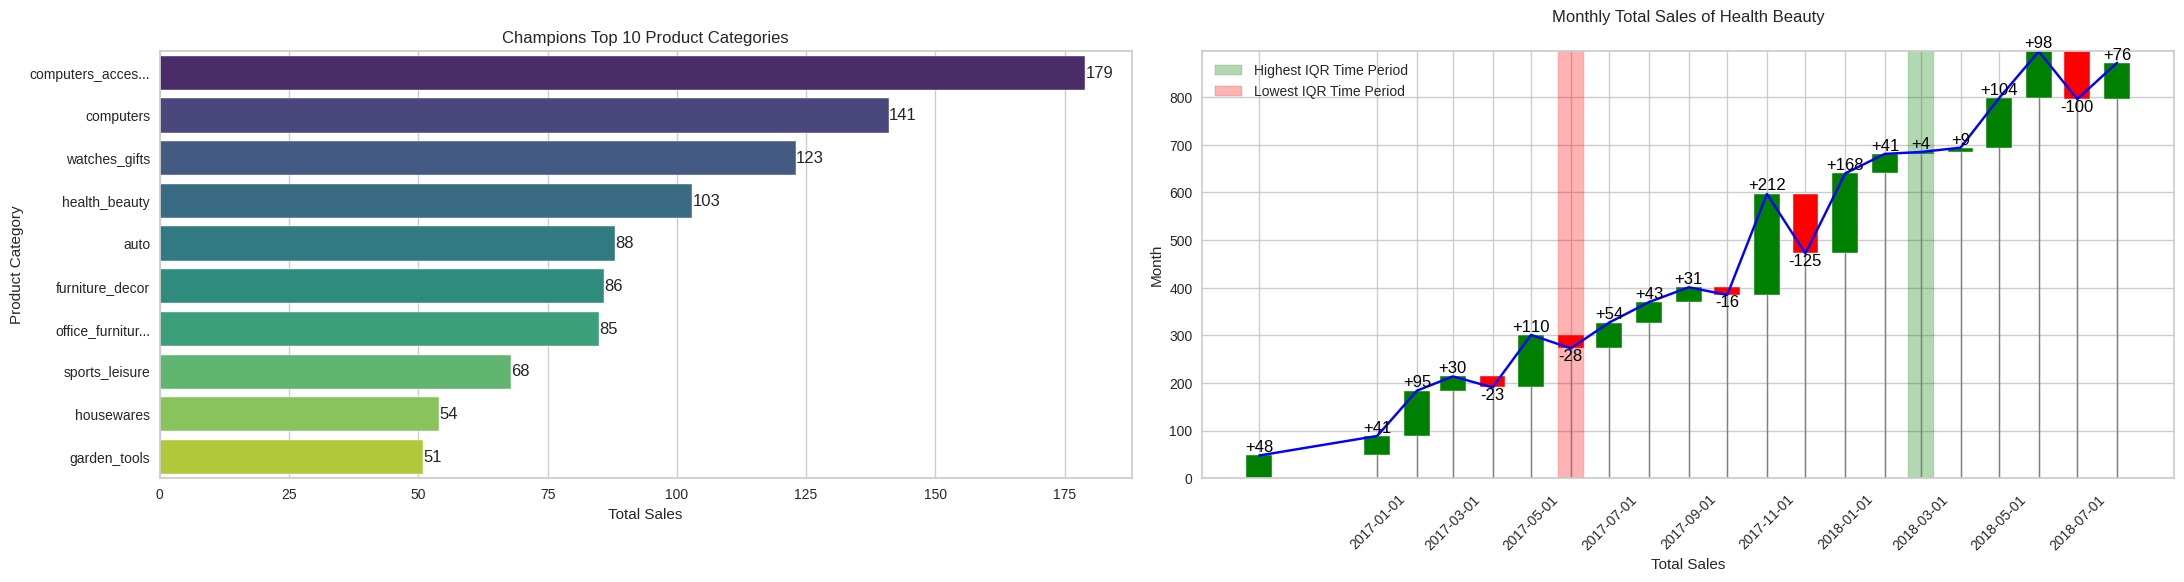

In [123]:
fig, ax = plt.subplots(1, 2, figsize=(22, 6))

#
create_bar_chart(
    champions_df['product_category_name'].value_counts(),
    'y',
    'Champions Top 10 Product Categories',
    'Total Sales',
    'Product Category',
    ax=ax[0]
)

#
create_waterfall_chart(
    clustered_df[clustered_df['product_category_name'] == 'health_beauty']
    .groupby(clustered_df['order_purchase_timestamp'].dt.to_period('M')).size(),
    'Monthly Total Sales of Health Beauty',
    'Total Sales',
    'Month',
    ax=ax[1]
    )

plt.tight_layout()


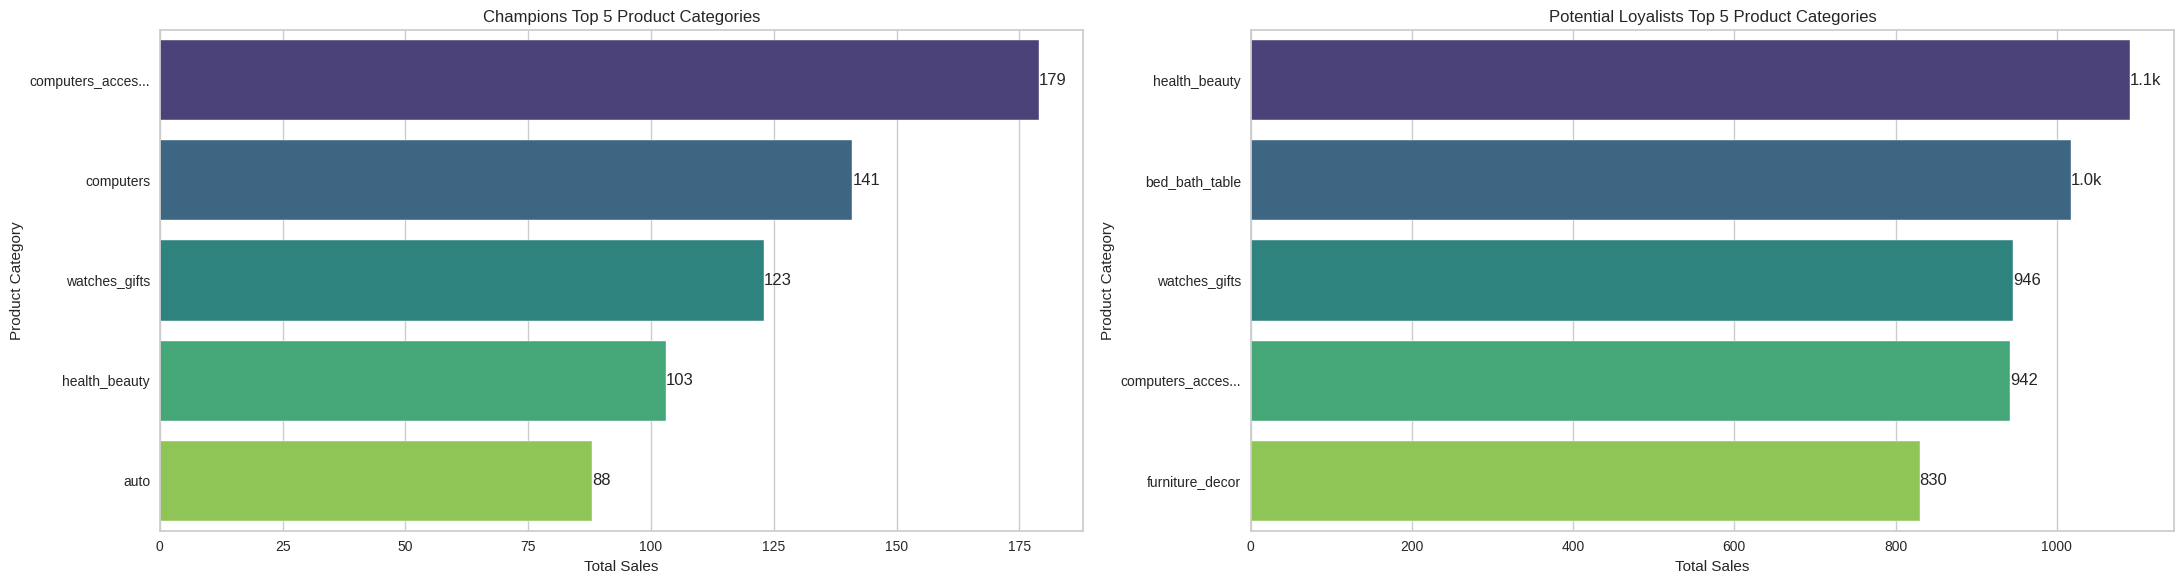

In [124]:
fig, ax = plt.subplots(1, 2, figsize=(22, 6))

#
create_bar_chart(
    champions_df['product_category_name'].value_counts(),
    'y',
    'Champions Top 5 Product Categories',
    'Total Sales',
    'Product Category',
    5,
    ax=ax[0]
)

#
create_bar_chart(
    potential_loyalists_df['product_category_name'].value_counts(),
    'y',
    'Potential Loyalists Top 5 Product Categories',
    'Total Sales',
    'Product Category',
    5,
    ax=ax[1]
)

plt.tight_layout()


## **Upselling**

- **Sales Consistency**:
  - The 'health_beauty' category products have shown a consistent increase in sales over time. This indicates a steady and sustained demand for products in this category, indicating that customers are likely to be satisfied and continue to purchase the products.

- **Proven Preferences**:
  - Customers in cluster 2, who have high value purchases, have shown strong interest in products in the 'health_beauty' category. By offering premium products or more expensive variants from this category, you can capitalize on their proven preferences and encourage them to increase their purchase value.

- **High Purchase Potential**:
  - Given that customers in this segment have high value spending habits, they are more likely to consider upselling products that offer higher quality and benefits, increasing their likelihood of making additional purchases.


## **Cross-Selling**

- **Best Selling Categories**:
  - Since products in the 'health_beauty' category are the most purchased, this indicates that customers in this segment have a strong interest in the category. Offering complementary products that are relevant to the products they have previously purchased can increase their chances of making additional purchases.

- **Product Linkage**:
  - Complementary products in the 'health_beauty' category often have a direct relationship with products already purchased, such as skincare products that can be used together or health supplements that complement existing products. This makes cross-selling more natural and relevant to customers.

- **Enhanced Customer Experience**:
  - By offering additional products related to the 'health_beauty' category, you enhance the customer experience by providing a complete solution that meets their needs more comprehensively. This can increase their satisfaction and likelihood to continue shopping in the future.

By utilizing existing sales data and customer preferences, upselling and cross-selling strategies in the 'health_beauty' category can effectively increase revenue and strengthen relationships with customers in cluster 2.
